In [1]:
import pandas as pd
import numpy as np
import warnings
from maths import helper
warnings.filterwarnings("ignore")

c:\users\awesome\appdata\local\programs\python\python35\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
environment_data = pd.read_csv("../trans/backup/environment_data_transpose_intr_sorted.csv").as_matrix()
health_data = pd.read_csv("../trans/backup/health_data_transpose_intr_sorted.csv").as_matrix()
infra_data = pd.read_csv("../trans/backup/infra_data_transpose_intr_sorted.csv").as_matrix()
econ_data = pd.read_csv("../trans/backup/economic_data_transpose_intr_sorted.csv").as_matrix()
sector_data = pd.read_csv("../trans/backup/sector_data_transpose_intr_sorted.csv").as_matrix()

In [3]:
environment_data.shape
# health_data

(62, 254)

In [4]:
year_row_min = 39
year_row_max = 59
environment_data_ra = environment_data[year_row_min:year_row_max]
environment_data.shape
health_data_ra = health_data[year_row_min:year_row_max]
econ_data_ra = econ_data[year_row_min:year_row_max]
infra_data_ra = infra_data[year_row_min:year_row_max]
sector_data_ra = sector_data[year_row_min:year_row_max]
# health_data_ra[0]

In [5]:
base_year = 3
countries = ['Bangladesh', 'Brazil', 'Canada', 'Denmark', 'France', 'Tunisia', 'India'
 , 'Indonesia', 'Italy', 'Kenya', 'Korea, Rep.', 'Malaysia', 'Netherlands'
 , 'Nigeria', 'Pakistan', 'Philippines', 'Singapore', 'Sudan', 'Thailand', 'United Kingdom', 'United States']


In [6]:
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
import pandas as pd
from sklearn import preprocessing
import math

class K_Means:
    def __init__(self, k=5, tol=0.001, max_iter=300):
        self.k = k
        self.tol = tol
        self.max_iter = max_iter

    def fit(self,data):        
        self.centroids = {}
        
        for i in range(self.k):
            self.centroids[i] = data[i]
        
        for i in range(self.max_iter):
            self.classifications = {}

            for i in range(self.k):
                self.classifications[i] = []
            try:
                for featureset in data:
                    #distances represent distance from centroid.
                    #distance[k] = distance from kth centroid, so minimum value in distance would actually be
                    #the value closest to a cluster centered at the index of that value
                    """ A   B (distances)
                    A
                    B
                    C
                    D
                    E
                    """
                    distances = [np.linalg.norm(featureset-self.centroids[centroid]) for centroid in self.centroids]
                    classification = distances.index(min(distances))
                    self.classifications[classification].append(featureset)
            except Exception as e:
                pass

            prev_centroids = dict(self.centroids)

            for classification in self.classifications:
                self.centroids[classification] = np.average(self.classifications[classification],axis=0)

            optimized = True
            
            for c in self.centroids:
                original_centroid = prev_centroids[c]
                current_centroid = self.centroids[c]
                if np.sum((current_centroid-original_centroid)/original_centroid*100.0) > self.tol:
                    optimized = False

            if optimized:
                break
                
                
        return helper.cal(self.k,data,countries)
    
    def predict(self,data):
        distances = [np.linalg.norm(data-self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classification


class NormalizeData:
    def transform(self,data):
        data = preprocessing.scale(data)
        for i in range(len(data)):
            data[i] = np.asarray(data[i])
            data[i] = (data[i] - np.mean(data[i])) / np.std(data[i])
            #np_minmax = (x_np - x_np.min()) / (x_np.max() - x_np.min())
        return data

def clusterOwn(CLUSTERS,data):

    nor = NormalizeData()
    data = nor.transform(data)
    clf = K_Means(k=CLUSTERS,max_iter=100)
    return clf.fit(data)

def clusterOwn2(CLUSTERS,data):

    nor = NormalizeData()
    data = nor.transform(data)
    clf = K_Means(k=CLUSTERS,max_iter=300)
    clf.fit(data)
    correct = 0
    clust = {}
    for i in range(CLUSTERS):
        clust[i] = []
    for i in range(len(data)):

        predict_me = np.array(data[i].astype(float))
        predict_me = predict_me.reshape(-1, len(predict_me))
        prediction = clf.predict(predict_me)
        clust[prediction].append(countries[i])

    return clust,{},{}


In [7]:
env_cluster = {}
econ_cluster = {}
health_cluster = {}
sector_cluster = {}
infra_cluster = {}
health_data_X = {}
environment_data_X = {}
sector_data_X = {}
infra_data_X = {}
econ_data_X = {}
ECON_REPR = {}
HEALTH_REPR = {}
ENV_REPR = {}
SECTOR_REPR = {}
INFRA_REPR = {}
ECON_FAR = {}
HEALTH_FAR = {}
ENV_FAR = {}
SECTOR_FAR = {}
INFRA_FAR = {}


In [8]:
prev_p = 1998
i = 3
for p in [1998,2005,2009]:
    i = i + p - prev_p
#     print(i)
    prev_p = p
    health_data_X[p] = np.array([
 np.nan_to_num(health_data_ra[i,2:13]),
 np.nan_to_num(health_data_ra[i,13:24]),
 np.nan_to_num(health_data_ra[i,24:35]),
 np.nan_to_num(health_data_ra[i,35:46]),
 np.nan_to_num(health_data_ra[i,46:57]),
 np.nan_to_num(health_data_ra[i,57:68]),
 np.nan_to_num(health_data_ra[i,68:79]),
 np.nan_to_num(health_data_ra[i,79:90]),
 np.nan_to_num(health_data_ra[i,90:101]),
 np.nan_to_num(health_data_ra[i,101:112]),
 np.nan_to_num(health_data_ra[i,112:123]),
 np.nan_to_num(health_data_ra[i,123:134]),
 np.nan_to_num(health_data_ra[i,134:145]),
 np.nan_to_num(health_data_ra[i,145:156]),
 np.nan_to_num(health_data_ra[i,156:167]),
 np.nan_to_num(health_data_ra[i,167:178]),
 np.nan_to_num(health_data_ra[i,178:189]),
 np.nan_to_num(health_data_ra[i,189:200]),
 np.nan_to_num(health_data_ra[i,200:211]),
 np.nan_to_num(health_data_ra[i,211:222]),
 np.nan_to_num(health_data_ra[i,222:233]),
])
    econ_data_X[p] = np.array([np.nan_to_num(econ_data_ra[i,2:20]),
 np.nan_to_num(econ_data_ra[i,20:38]),
 np.nan_to_num(econ_data_ra[i,38:56]),
 np.nan_to_num(econ_data_ra[i,56:74]),
 np.nan_to_num(econ_data_ra[i,74:92]),
 np.nan_to_num(econ_data_ra[i,92:110]),
 np.nan_to_num(econ_data_ra[i,110:128]),
 np.nan_to_num(econ_data_ra[i,128:146]),
 np.nan_to_num(econ_data_ra[i,146:164]),
 np.nan_to_num(econ_data_ra[i,164:182]),
 np.nan_to_num(econ_data_ra[i,182:200]),
 np.nan_to_num(econ_data_ra[i,200:218]),
 np.nan_to_num(econ_data_ra[i,218:236]),
 np.nan_to_num(econ_data_ra[i,236:254]),
 np.nan_to_num(econ_data_ra[i,254:272]),
 np.nan_to_num(econ_data_ra[i,272:290]),
 np.nan_to_num(econ_data_ra[i,290:308]),
 np.nan_to_num(econ_data_ra[i,308:326]),
 np.nan_to_num(econ_data_ra[i,326:344]),
 np.nan_to_num(econ_data_ra[i,344:362]),
 np.nan_to_num(econ_data_ra[i,362:380]),])
    
    infra_data_X[p] = np.array([ np.nan_to_num(infra_data_ra[i,2:6]),
 np.nan_to_num(infra_data_ra[i,6:10]),
 np.nan_to_num(infra_data_ra[i,10:14]),
 np.nan_to_num(infra_data_ra[i,14:18]),
 np.nan_to_num(infra_data_ra[i,18:22]),
 np.nan_to_num(infra_data_ra[i,22:26]),
 np.nan_to_num(infra_data_ra[i,26:30]),
 np.nan_to_num(infra_data_ra[i,30:34]),
 np.nan_to_num(infra_data_ra[i,34:38]),
 np.nan_to_num(infra_data_ra[i,38:42]),
 np.nan_to_num(infra_data_ra[i,42:46]),
 np.nan_to_num(infra_data_ra[i,46:50]),
 np.nan_to_num(infra_data_ra[i,50:54]),
 np.nan_to_num(infra_data_ra[i,54:58]),
 np.nan_to_num(infra_data_ra[i,58:62]),
 np.nan_to_num(infra_data_ra[i,62:66]),
 np.nan_to_num(infra_data_ra[i,66:70]),
 np.nan_to_num(infra_data_ra[i,70:74]),
 np.nan_to_num(infra_data_ra[i,74:78]),
 np.nan_to_num(infra_data_ra[i,78:82]),
 np.nan_to_num(infra_data_ra[i,82:86]),])
    
    sector_data_X[p] = np.array([np.nan_to_num(sector_data_ra[i,2:8]),
 np.nan_to_num(sector_data_ra[i,8:14]),
 np.nan_to_num(sector_data_ra[i,14:20]),
 np.nan_to_num(sector_data_ra[i,20:26]),
 np.nan_to_num(sector_data_ra[i,26:32]),
 np.nan_to_num(sector_data_ra[i,32:38]),
 np.nan_to_num(sector_data_ra[i,38:44]),
 np.nan_to_num(sector_data_ra[i,44:50]),
 np.nan_to_num(sector_data_ra[i,50:56]),
 np.nan_to_num(sector_data_ra[i,56:62]),
 np.nan_to_num(sector_data_ra[i,62:68]),
 np.nan_to_num(sector_data_ra[i,68:74]),
 np.nan_to_num(sector_data_ra[i,74:80]),
 np.nan_to_num(sector_data_ra[i,80:86]),
 np.nan_to_num(sector_data_ra[i,86:92]),
 np.nan_to_num(sector_data_ra[i,92:98]),
 np.nan_to_num(sector_data_ra[i,98:104]),
 np.nan_to_num(sector_data_ra[i,104:110]),
 np.nan_to_num(sector_data_ra[i,110:116]),
 np.nan_to_num(sector_data_ra[i,116:122]),
 np.nan_to_num(sector_data_ra[i,122:128]),])
    
    environment_data_X[p] = np.array([
            np.nan_to_num(environment_data_ra[i,2:14]),
np.nan_to_num(environment_data_ra[i,14:26]),
np.nan_to_num(environment_data_ra[i,26:38]),
np.nan_to_num(environment_data_ra[i,38:50]),
np.nan_to_num(environment_data_ra[i,50:62]),
np.nan_to_num(environment_data_ra[i,62:74]),
np.nan_to_num(environment_data_ra[i,74:86]),
np.nan_to_num(environment_data_ra[i,86:98]),
np.nan_to_num(environment_data_ra[i,98:110]),
np.nan_to_num(environment_data_ra[i,110:122]),
np.nan_to_num(environment_data_ra[i,122:134]),
np.nan_to_num(environment_data_ra[i,134:146]),
np.nan_to_num(environment_data_ra[i,146:158]),
np.nan_to_num(environment_data_ra[i,158:170]),
np.nan_to_num(environment_data_ra[i,170:182]),
np.nan_to_num(environment_data_ra[i,182:194]),
np.nan_to_num(environment_data_ra[i,194:206]),
np.nan_to_num(environment_data_ra[i,206:218]),
np.nan_to_num(environment_data_ra[i,218:230]),
np.nan_to_num(environment_data_ra[i,230:242]),
np.nan_to_num(environment_data_ra[i,242:254]),
])
def work(i):
    try:
        econ_cluster[i],ECON_REPR[i],ECON_FAR[i] = clusterOwn(5,econ_data_X[i])
        health_cluster[i],HEALTH_REPR[i],HEALTH_FAR[i] = clusterOwn(5,health_data_X[i])
        sector_cluster[i],SECTOR_REPR[i],SECTOR_FAR[i] = clusterOwn(5,sector_data_X[i])
        infra_cluster[i],INFRA_REPR[i],INFRA_FAR[i] = clusterOwn(5,infra_data_X[i])
        env_cluster[i],ENV_REPR[i],ENV_FAR[i] = clusterOwn(5,environment_data_X[i])
        #raise "ERERER"
    except Exception as e:
        econ_cluster[i],ECON_REPR[i],ECON_FAR[i] = clusterOwn2(5,econ_data_X[i])
        health_cluster[i],HEALTH_REPR[i],HEALTH_FAR[i] = clusterOwn2(5,health_data_X[i])
        sector_cluster[i],SECTOR_REPR[i],SECTOR_FAR[i] = clusterOwn2(5,sector_data_X[i])
        infra_cluster[i],INFRA_REPR[i],INFRA_FAR[i] = clusterOwn2(5,infra_data_X[i])
        env_cluster[i],ENV_REPR[i],ENV_FAR[i] = clusterOwn2(5,environment_data_X[i])
    
    

# _CLUSTERS_

In [9]:
def printCluster(clust,repr_,far):
  
    for x in clust:
        print (x)
        cnt = 0
        for y in clust[x]:
            print (y,':',clust[x][y])
    
            try:
                print("REPRESENTATIVE:",countries[repr_[x][cnt]])
                #print("FAR:",countries[far[x][cnt]])
            except Exception as e:
                print(e)
            cnt += 1

for i in [1998,2005,2009]:
    try:
        econ_cluster[i],ECON_REPR[i],ECON_FAR[i] = clusterOwn(5,econ_data_X[i])
        health_cluster[i],HEALTH_REPR[i],HEALTH_FAR[i] = clusterOwn(5,health_data_X[i])
        sector_cluster[i],SECTOR_REPR[i],SECTOR_FAR[i] = clusterOwn(5,sector_data_X[i])
        infra_cluster[i],INFRA_REPR[i],INFRA_FAR[i] = clusterOwn(5,infra_data_X[i])
        env_cluster[i],ENV_REPR[i],ENV_FAR[i] = clusterOwn(5,environment_data_X[i])
        #raise "ERERER"
    except Exception as e:
        econ_cluster[i],ECON_REPR[i],ECON_FAR[i] = clusterOwn2(5,econ_data_X[i])
        health_cluster[i],HEALTH_REPR[i],HEALTH_FAR[i] = clusterOwn2(5,health_data_X[i])
        sector_cluster[i],SECTOR_REPR[i],SECTOR_FAR[i] = clusterOwn2(5,sector_data_X[i])
        infra_cluster[i],INFRA_REPR[i],INFRA_FAR[i] = clusterOwn2(5,infra_data_X[i])
        env_cluster[i],ENV_REPR[i],ENV_FAR[i] = clusterOwn2(5,environment_data_X[i])

print("\n----------------ECON CLUSTER---------------------\n")
printCluster(econ_cluster,ECON_REPR,ECON_FAR)

print("\n----------------HEALTH CLUSTER--------------------\n")
printCluster(health_cluster,HEALTH_REPR,HEALTH_FAR)
print("\n----------------ENVIRON CLUSTER-------------------\n")
printCluster(env_cluster,ENV_REPR,ENV_FAR)
print("\n----------------SECTOR CLUSTER--------------------\n")
printCluster(sector_cluster,SECTOR_REPR,SECTOR_FAR)
print("\n----------------INFRA CLUSTER---------------------\n")
printCluster(infra_cluster,INFRA_REPR,INFRA_FAR)


----------------ECON CLUSTER---------------------

2009
0 : ['Canada', 'Denmark', 'France', 'Indonesia', 'Singapore', 'United Kingdom', 'United States']
REPRESENTATIVE: France
1 : ['Bangladesh', 'Brazil', 'Tunisia', 'Italy', 'Nigeria', 'Pakistan', 'Thailand']
REPRESENTATIVE: Bangladesh
2 : ['Netherlands']
REPRESENTATIVE: Netherlands
3 : ['Korea, Rep.', 'Malaysia', 'Philippines', 'Sudan']
REPRESENTATIVE: Korea, Rep.
4 : ['India', 'Kenya']
REPRESENTATIVE: Kenya
2005
0 : ['Brazil', 'Italy', 'Netherlands', 'Nigeria', 'Singapore']
REPRESENTATIVE: Italy
1 : ['France', 'Indonesia', 'United Kingdom', 'United States']
REPRESENTATIVE: France
2 : ['Canada', 'Denmark', 'Korea, Rep.', 'Malaysia', 'Pakistan', 'Philippines', 'Sudan', 'Thailand']
REPRESENTATIVE: Malaysia
3 : ['India', 'Kenya']
REPRESENTATIVE: India
4 : ['Bangladesh', 'Tunisia']
REPRESENTATIVE: Bangladesh
1998
0 : ['Brazil', 'Italy', 'Netherlands', 'Singapore']
REPRESENTATIVE: Brazil
1 : ['Korea, Rep.', 'Philippines', 'Sudan']
REPRESE

In [10]:

import matplotlib
from sklearn.decomposition import PCA as sklearnPCA
import matplotlib.patches as mpatches
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

matplotlib.rcParams.update({'font.size': 10})

def pca_data(data,dimenstion):
    sklearn_pca = sklearnPCA(n_components=dimenstion)
    Y_sklearn = sklearn_pca.fit_transform(data)
    return Y_sklearn

def scale_data(data):
    scaler = RobustScaler()
    scaler.fit(data)
    return scaler.transform(data)

def plot_cluster2d(data,clusters,name):
    
    color = ['darkmagenta','gold','mediumblue','green','red']

#    method 1
#     nor = NormalizeData()
#     data_norm = nor.transform(data)

#     method2
#     data_norm = scale_data(data)

    data_norm = data

    trans_data = pca_data(data_norm,2)
    
    fig, ax = plt.subplots()
    fig.set_size_inches(15, 15)
    fig.suptitle(name, fontsize=20)
    plt.xlabel('PC1', fontsize=18)
    plt.ylabel('PC2', fontsize=16)
    
    index = 0
    color_index = 0
    
    #code to plot data
    for cluster_index in range(len(clusters)):
        for cont in clusters[cluster_index]: 
            index_country = countries.index(cont)
            ax.scatter(trans_data[index_country,0], 
                       trans_data[index_country,1],
                       c = color[cluster_index], s=30, alpha=0.9)
        
        index = index + len(clusters[cluster_index])
    
    
    #code to add legend
    patch = []
    for cluster_index in range(len(clusters)):
        patch.append(mpatches.Patch(color=color[cluster_index], label=str(clusters[cluster_index])))
    
    plt.legend(handles=patch)
    
    
    #code to assign country names to data points
#     for country_index, country_name in enumerate(countries):
#         ax.annotate(country_name, (trans_data[country_index][0],trans_data[country_index][1]))

    plt.plot()

            

In [11]:

def plot_cluster(data,clusters,name):
    
    color = ['darkmagenta','gold','mediumblue','green','red']

#    method 1
#     nor = NormalizeData()
#     data_norm = nor.transform(data)

#     method2
#     data_norm = scale_data(data)

    data_norm = data

    trans_data = pca_data(data_norm,3)
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    fig.set_size_inches(15, 15,15)
    fig.suptitle(name, fontsize=20)

    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_zlabel('PC3')
    
    index = 0
    color_index = 0
    
    #code to plot data
    for cluster_index in range(len(clusters)):
        for cont in clusters[cluster_index]: 
            index_country = countries.index(cont)
            ax.scatter(trans_data[index_country,0], 
                       trans_data[index_country,1],
                       trans_data[index_country,2],
                       c = color[cluster_index], s=30, alpha=0.9)
        
        index = index + len(clusters[cluster_index])
    
    
    #code to add legend
    patch = []
    for cluster_index in range(len(clusters)):
        patch.append(mpatches.Patch(color=color[cluster_index], label=str(clusters[cluster_index]))) 
    plt.legend(handles=patch)
    
    
    #code to assign country names to data points
#     for country_index, country_name in enumerate(countries):
#          ax.text(trans_data[country_index][0],trans_data[country_index][1],trans_data[country_index][2],country_name )#, size=20, zorder=1, color='k') 
    
    plt.show()

# _CLUSTER PLOTS (PCA)_

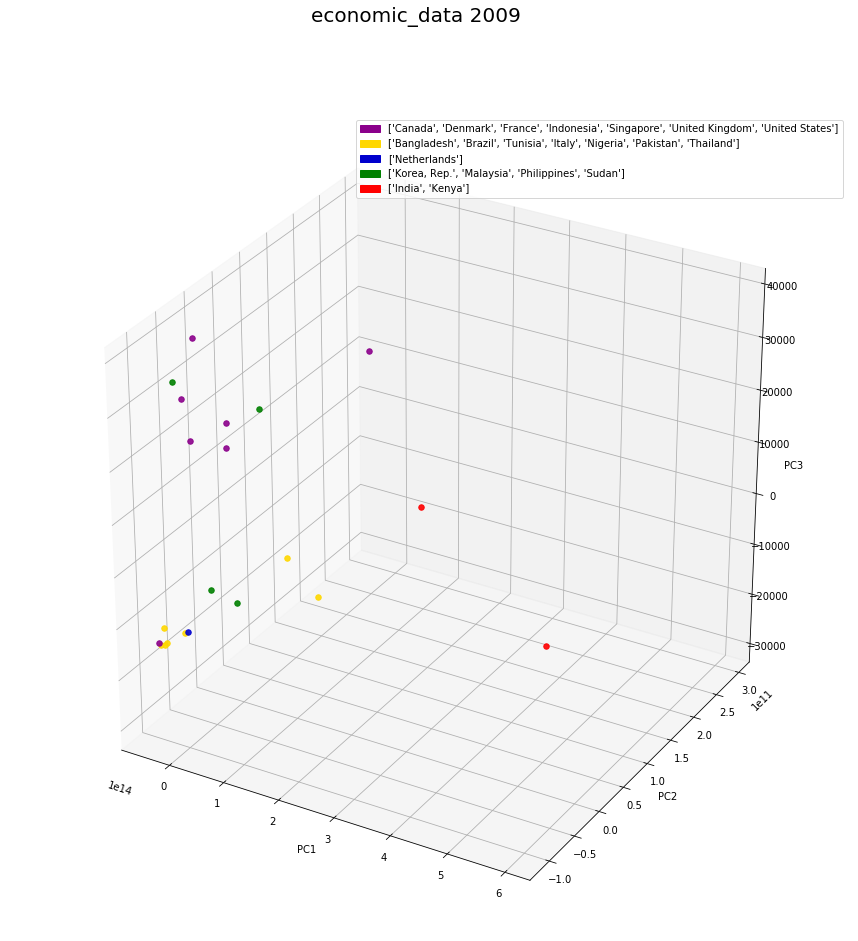

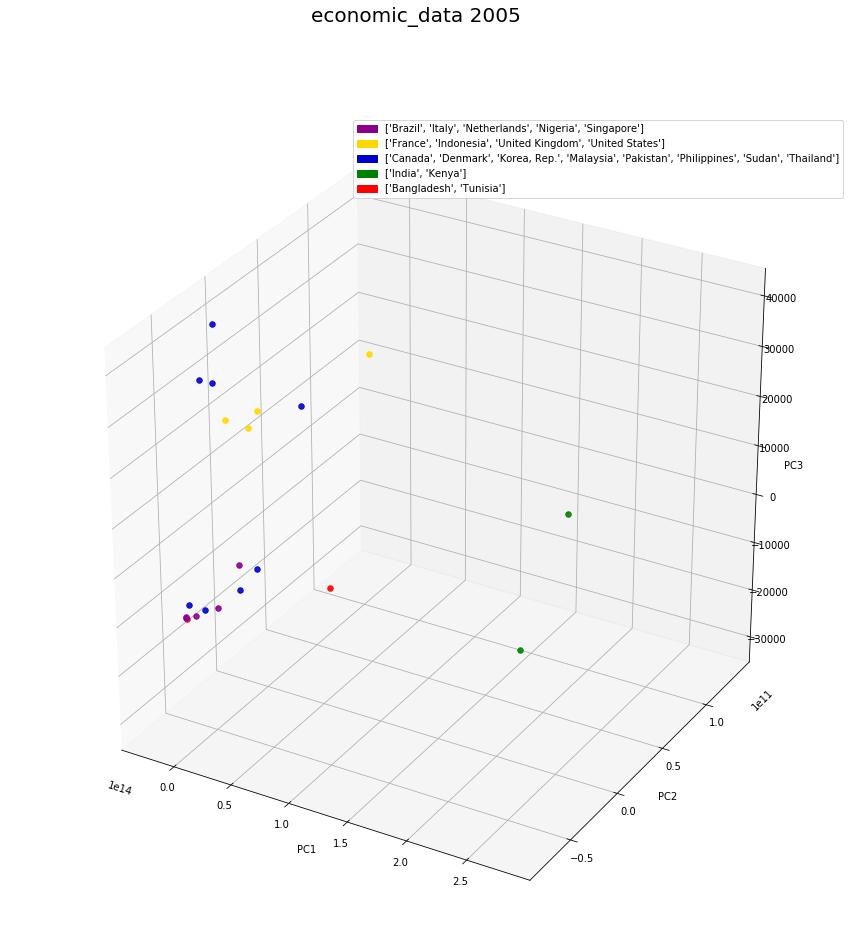

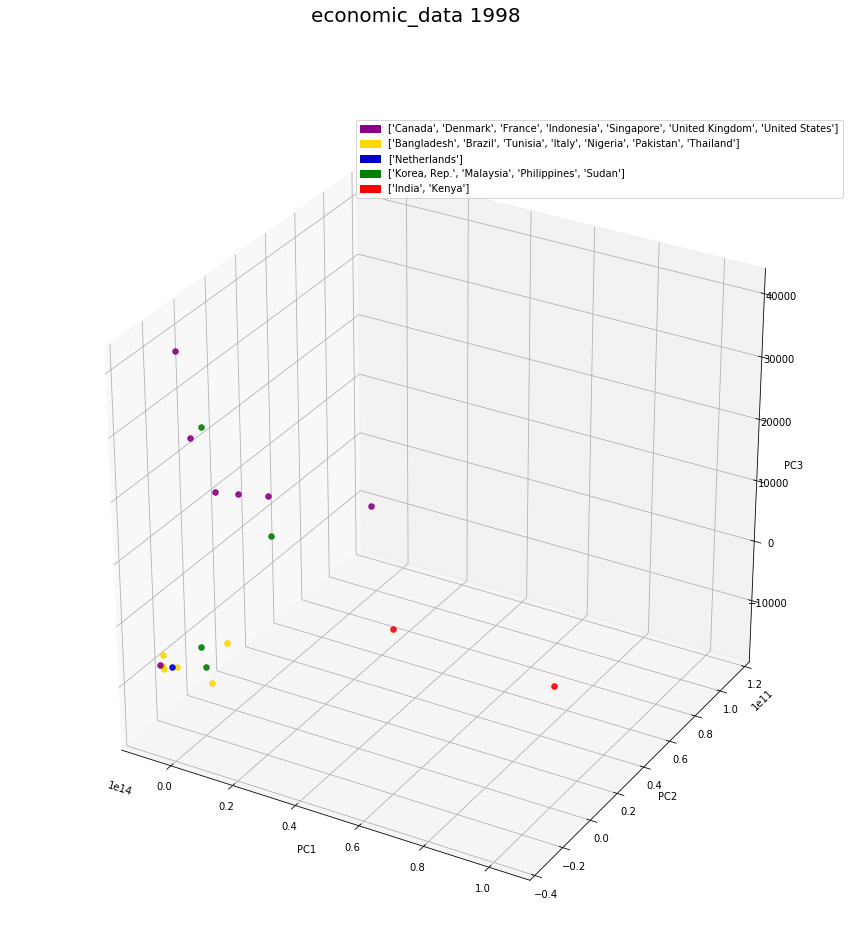

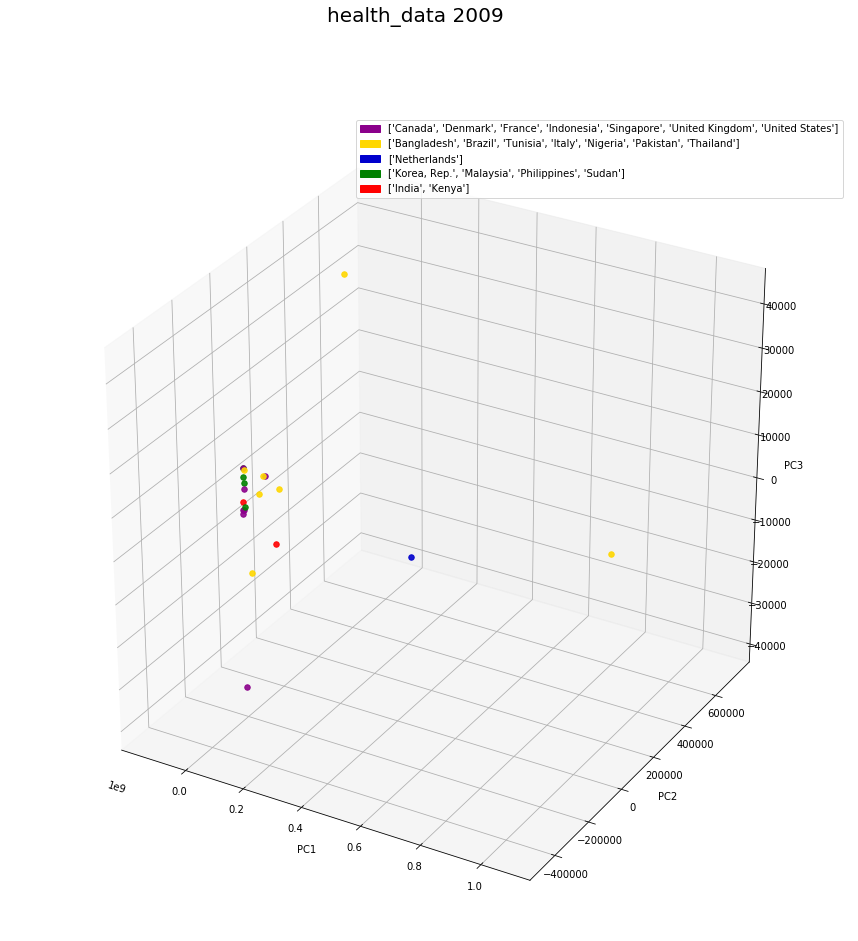

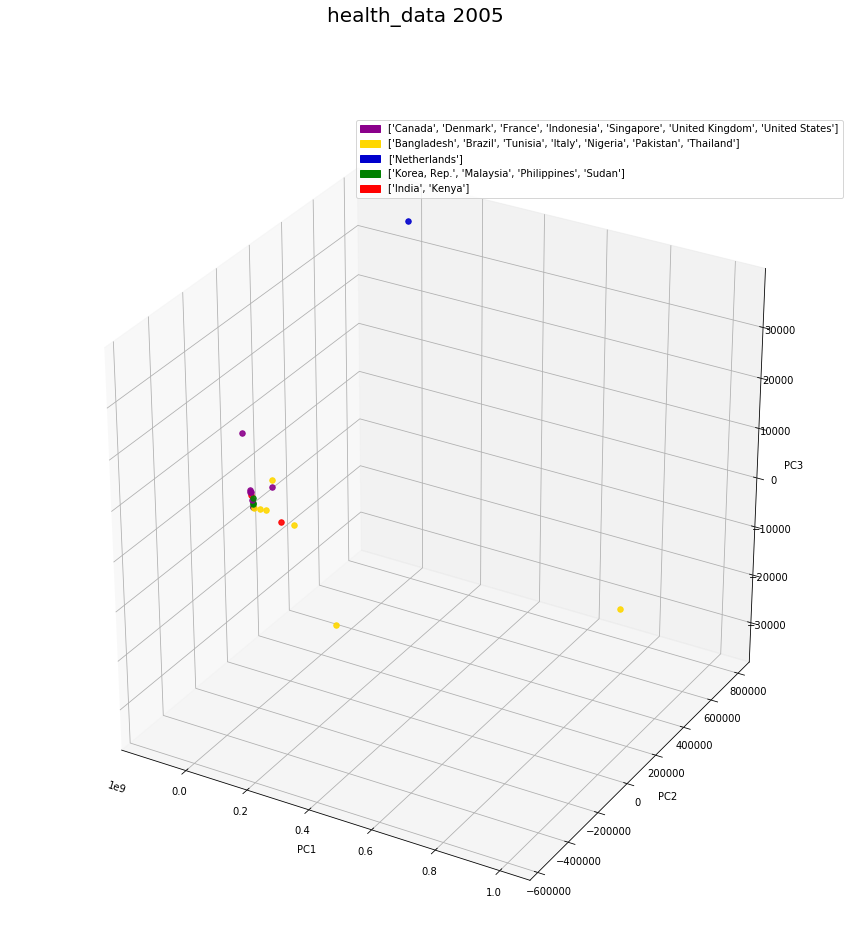

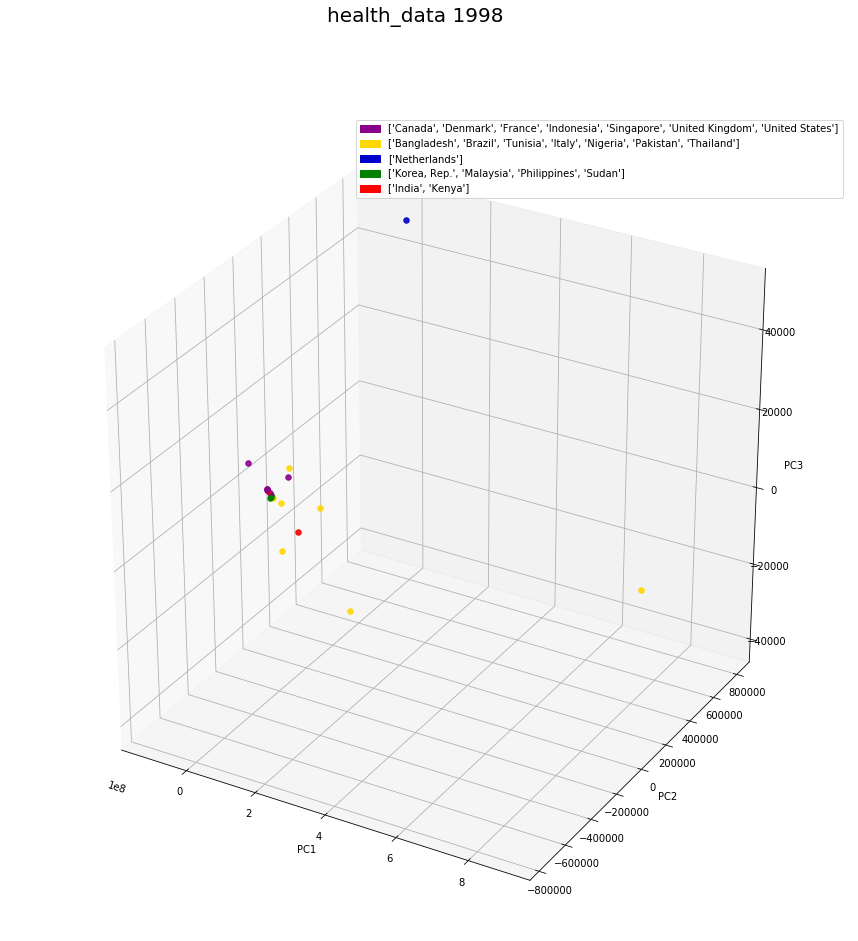

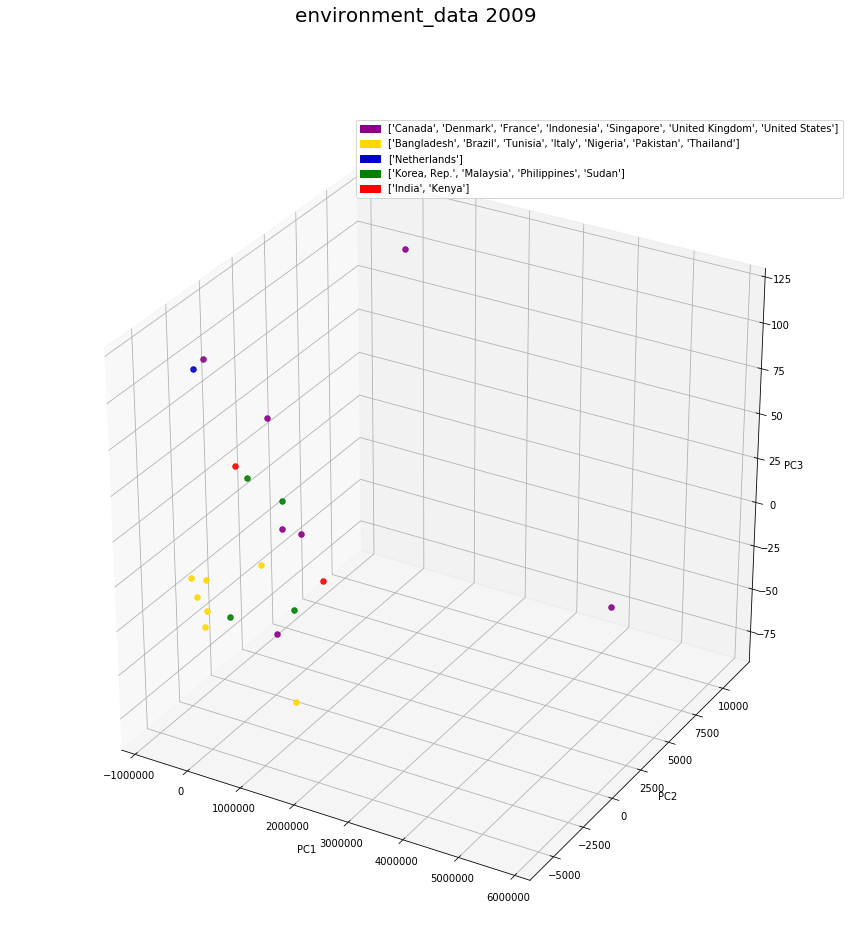

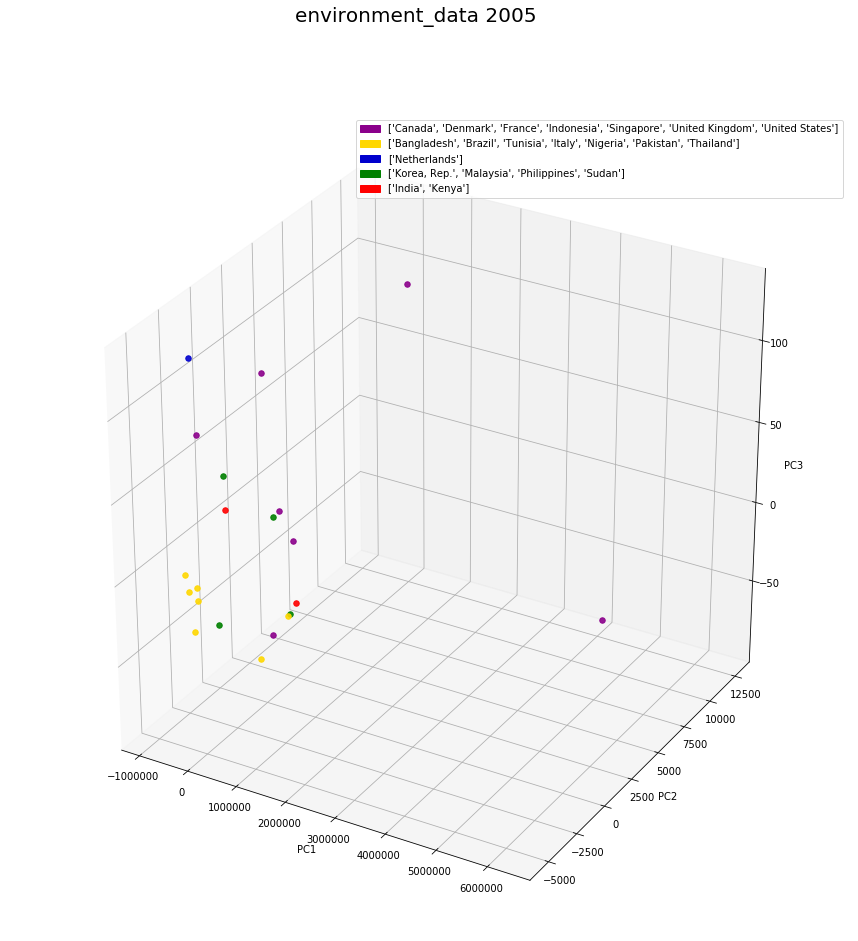

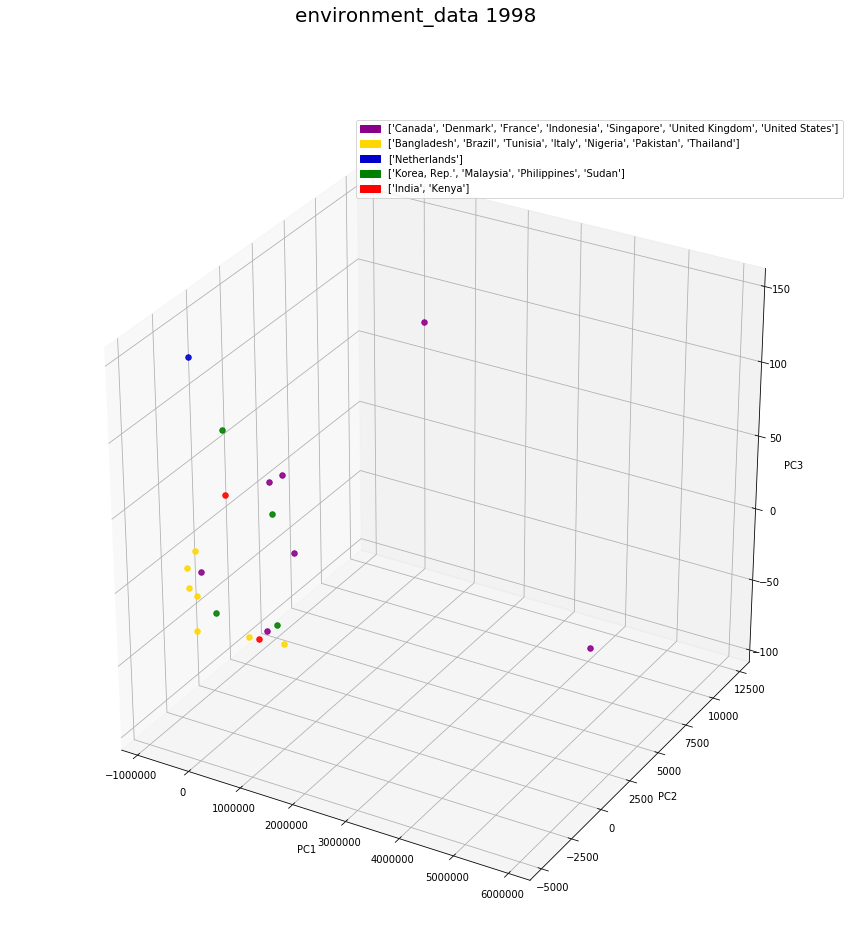

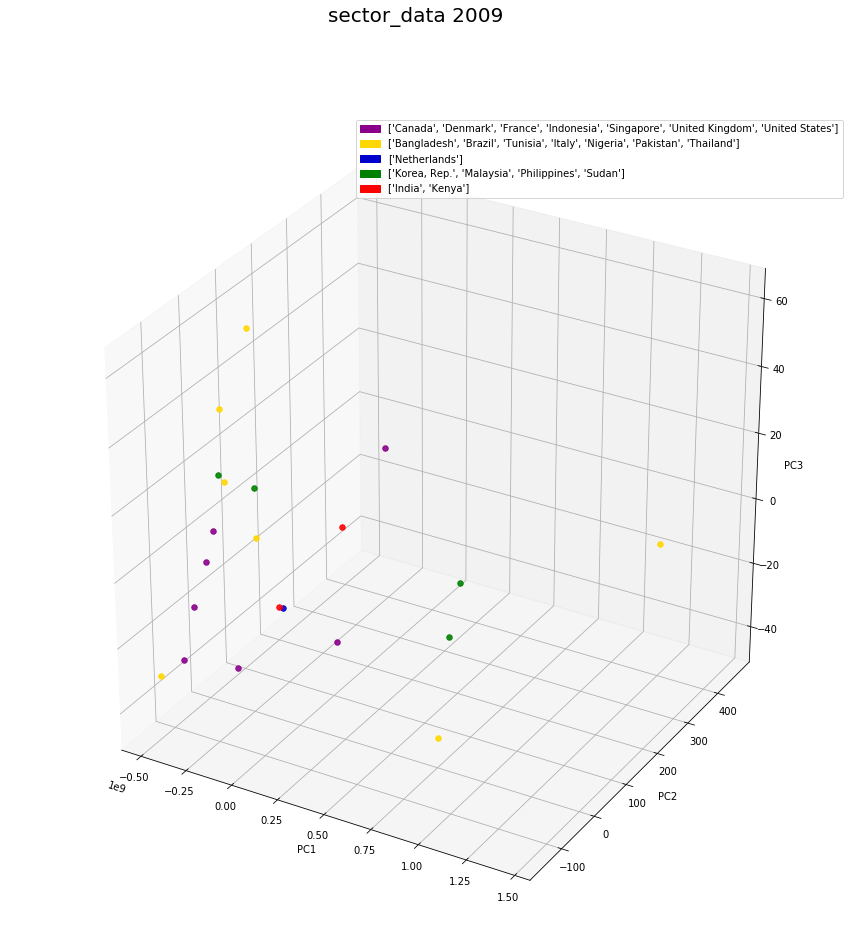

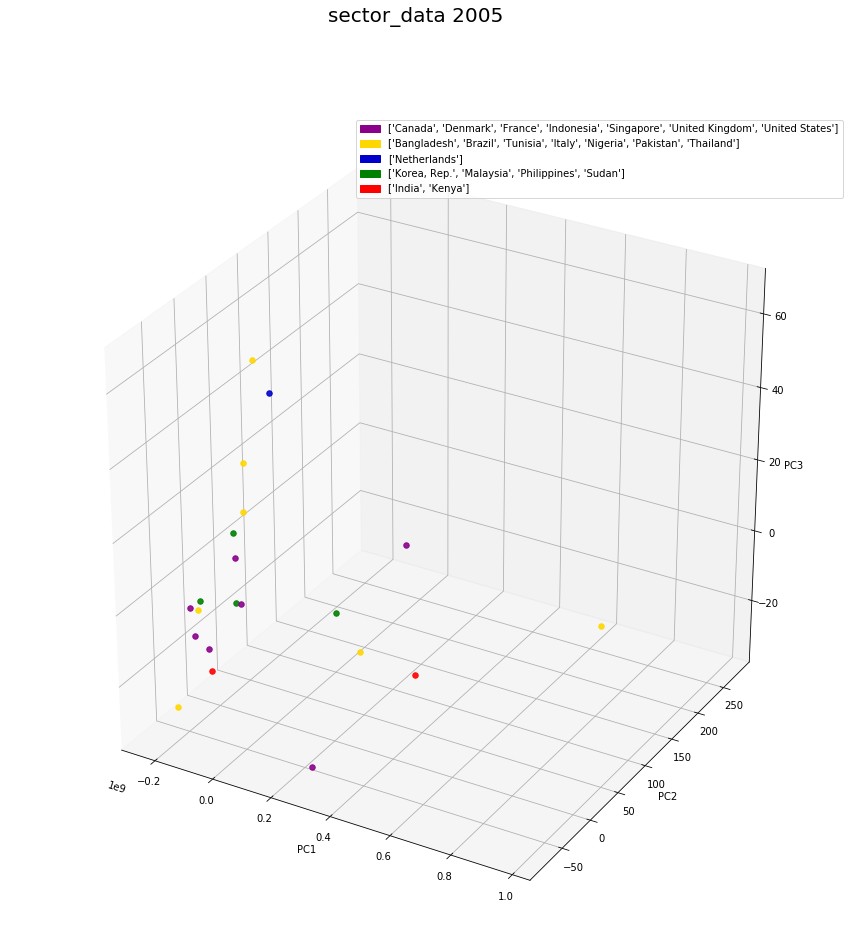

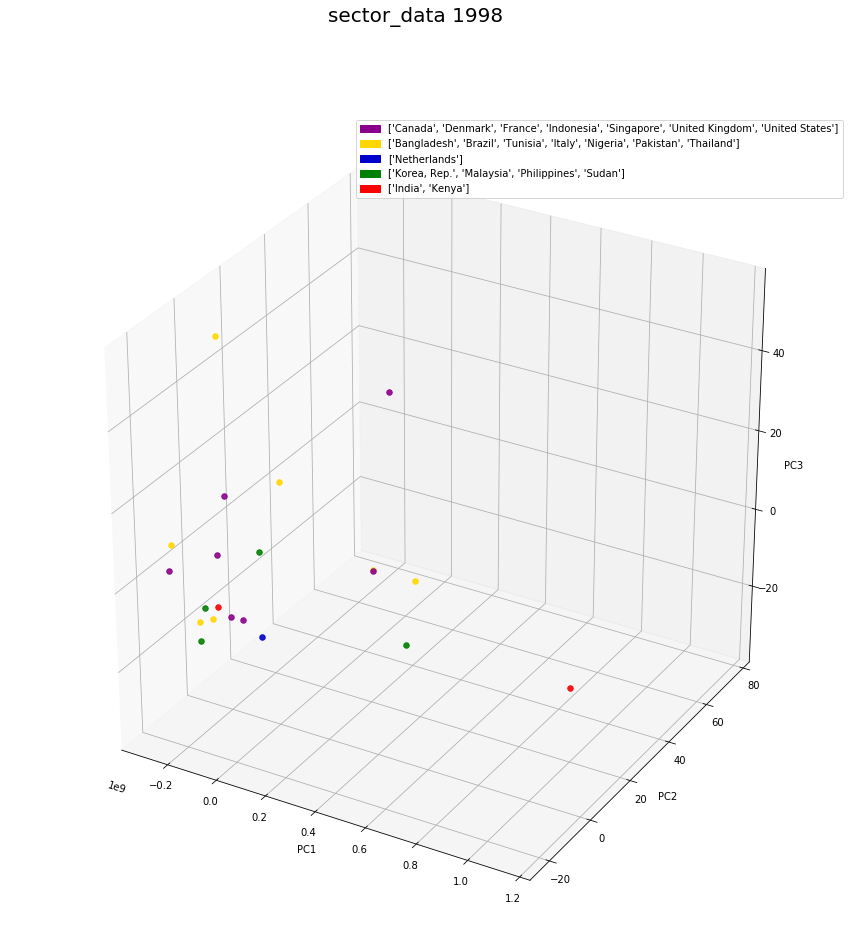

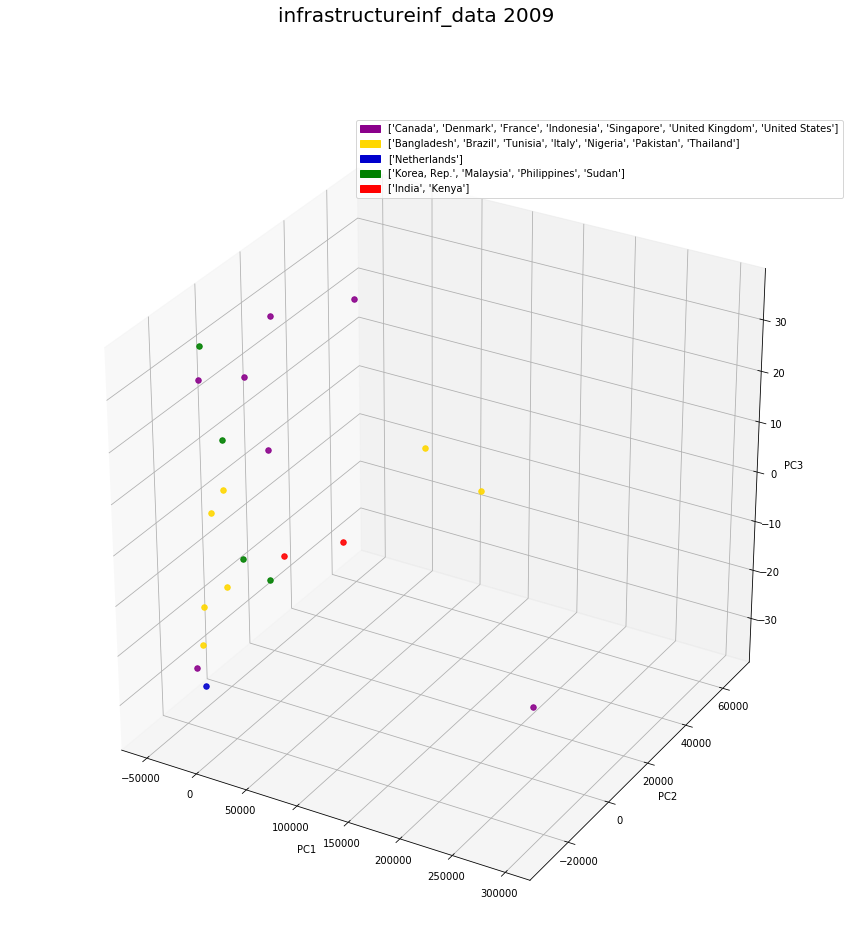

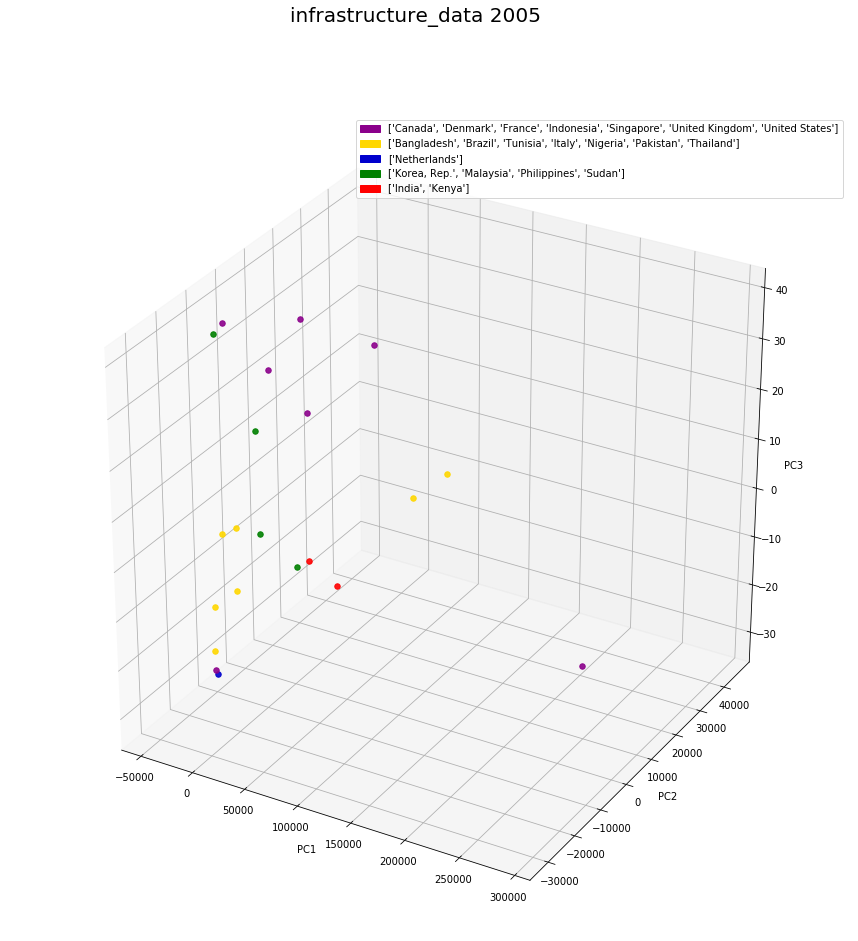

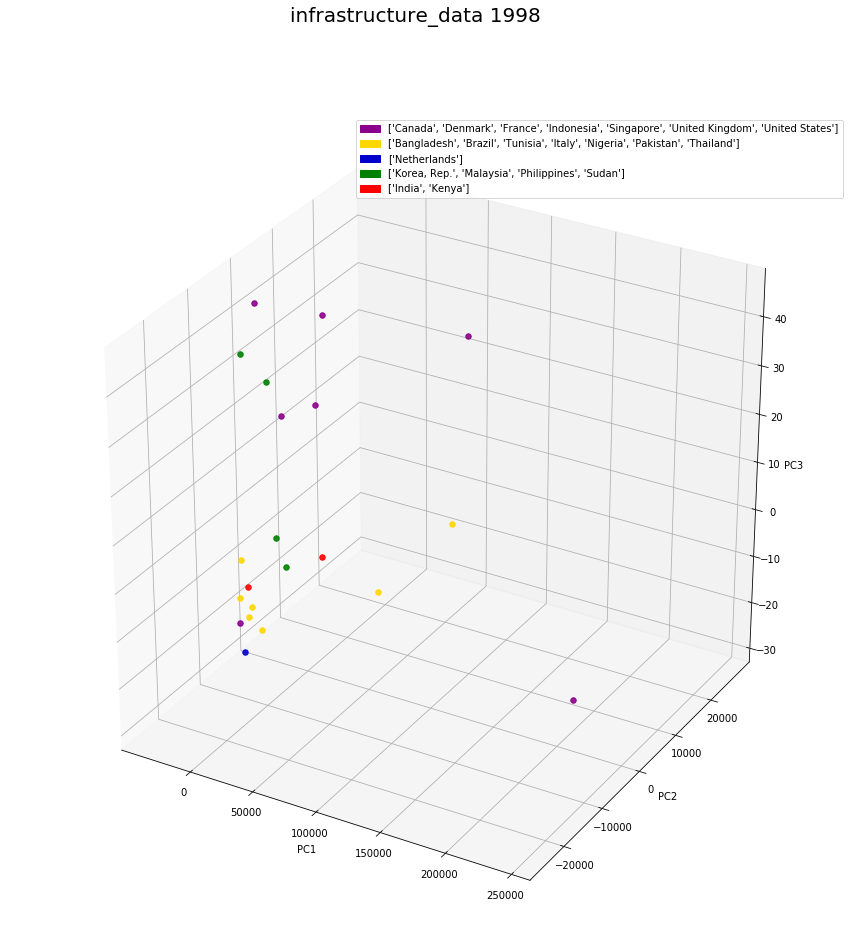

In [12]:
plot_cluster(econ_data_X[2009],[ ['Canada', 'Denmark', 'France', 'Indonesia', 'Singapore', 'United Kingdom', 'United States'],
['Bangladesh', 'Brazil', 'Tunisia', 'Italy', 'Nigeria', 'Pakistan', 'Thailand'],
['Netherlands'],
['Korea, Rep.', 'Malaysia', 'Philippines', 'Sudan'],
['India', 'Kenya'] ],"economic_data 2009")

plot_cluster(econ_data_X[2005],[ ['Brazil', 'Italy', 'Netherlands', 'Nigeria', 'Singapore'],
['France', 'Indonesia', 'United Kingdom', 'United States'],
['Canada', 'Denmark', 'Korea, Rep.', 'Malaysia', 'Pakistan', 'Philippines', 'Sudan', 'Thailand'],
['India', 'Kenya'],
['Bangladesh', 'Tunisia'],
 ],"economic_data 2005")

plot_cluster(econ_data_X[1998],[ ['Canada', 'Denmark', 'France', 'Indonesia', 'Singapore', 'United Kingdom', 'United States'],
['Bangladesh', 'Brazil', 'Tunisia', 'Italy', 'Nigeria', 'Pakistan', 'Thailand'],
['Netherlands'],
['Korea, Rep.', 'Malaysia', 'Philippines', 'Sudan'],
['India', 'Kenya'] ],"economic_data 1998")

plot_cluster(health_data_X[2009],[ ['Canada', 'Denmark', 'France', 'Indonesia', 'Singapore', 'United Kingdom', 'United States'],
['Bangladesh', 'Brazil', 'Tunisia', 'Italy', 'Nigeria', 'Pakistan', 'Thailand'],
['Netherlands'],
['Korea, Rep.', 'Malaysia', 'Philippines', 'Sudan'],
['India', 'Kenya'] ],"health_data 2009")

plot_cluster(health_data_X[2005],[ ['Canada', 'Denmark', 'France', 'Indonesia', 'Singapore', 'United Kingdom', 'United States'],
['Bangladesh', 'Brazil', 'Tunisia', 'Italy', 'Nigeria', 'Pakistan', 'Thailand'],
['Netherlands'],
['Korea, Rep.', 'Malaysia', 'Philippines', 'Sudan'],
['India', 'Kenya'] ],"health_data 2005")

plot_cluster(health_data_X[1998],[ ['Canada', 'Denmark', 'France', 'Indonesia', 'Singapore', 'United Kingdom', 'United States'],
['Bangladesh', 'Brazil', 'Tunisia', 'Italy', 'Nigeria', 'Pakistan', 'Thailand'],
['Netherlands'],
['Korea, Rep.', 'Malaysia', 'Philippines', 'Sudan'],
['India', 'Kenya'] ],"health_data 1998")

plot_cluster(environment_data_X[2009],[ ['Canada', 'Denmark', 'France', 'Indonesia', 'Singapore', 'United Kingdom', 'United States'],
['Bangladesh', 'Brazil', 'Tunisia', 'Italy', 'Nigeria', 'Pakistan', 'Thailand'],
['Netherlands'],
['Korea, Rep.', 'Malaysia', 'Philippines', 'Sudan'],
['India', 'Kenya'] ],"environment_data 2009")

plot_cluster(environment_data_X[2005],[ ['Canada', 'Denmark', 'France', 'Indonesia', 'Singapore', 'United Kingdom', 'United States'],
['Bangladesh', 'Brazil', 'Tunisia', 'Italy', 'Nigeria', 'Pakistan', 'Thailand'],
['Netherlands'],
['Korea, Rep.', 'Malaysia', 'Philippines', 'Sudan'],
['India', 'Kenya'] ],"environment_data 2005")

plot_cluster(environment_data_X[1998],[ ['Canada', 'Denmark', 'France', 'Indonesia', 'Singapore', 'United Kingdom', 'United States'],
['Bangladesh', 'Brazil', 'Tunisia', 'Italy', 'Nigeria', 'Pakistan', 'Thailand'],
['Netherlands'],
['Korea, Rep.', 'Malaysia', 'Philippines', 'Sudan'],
['India', 'Kenya'] ],"environment_data 1998")

plot_cluster(sector_data_X[2009],[ ['Canada', 'Denmark', 'France', 'Indonesia', 'Singapore', 'United Kingdom', 'United States'],
['Bangladesh', 'Brazil', 'Tunisia', 'Italy', 'Nigeria', 'Pakistan', 'Thailand'],
['Netherlands'],
['Korea, Rep.', 'Malaysia', 'Philippines', 'Sudan'],
['India', 'Kenya'] ],"sector_data 2009")

plot_cluster(sector_data_X[2005],[ ['Canada', 'Denmark', 'France', 'Indonesia', 'Singapore', 'United Kingdom', 'United States'],
['Bangladesh', 'Brazil', 'Tunisia', 'Italy', 'Nigeria', 'Pakistan', 'Thailand'],
['Netherlands'],
['Korea, Rep.', 'Malaysia', 'Philippines', 'Sudan'],
['India', 'Kenya'] ],"sector_data 2005")

plot_cluster(sector_data_X[1998],[ ['Canada', 'Denmark', 'France', 'Indonesia', 'Singapore', 'United Kingdom', 'United States'],
['Bangladesh', 'Brazil', 'Tunisia', 'Italy', 'Nigeria', 'Pakistan', 'Thailand'],
['Netherlands'],
['Korea, Rep.', 'Malaysia', 'Philippines', 'Sudan'],
['India', 'Kenya'] ],"sector_data 1998")

plot_cluster(infra_data_X[2009],[ ['Canada', 'Denmark', 'France', 'Indonesia', 'Singapore', 'United Kingdom', 'United States'],
['Bangladesh', 'Brazil', 'Tunisia', 'Italy', 'Nigeria', 'Pakistan', 'Thailand'],
['Netherlands'],
['Korea, Rep.', 'Malaysia', 'Philippines', 'Sudan'],
['India', 'Kenya'] ],"infrastructureinf_data 2009")

plot_cluster(infra_data_X[2005],[ ['Canada', 'Denmark', 'France', 'Indonesia', 'Singapore', 'United Kingdom', 'United States'],
['Bangladesh', 'Brazil', 'Tunisia', 'Italy', 'Nigeria', 'Pakistan', 'Thailand'],
['Netherlands'],
['Korea, Rep.', 'Malaysia', 'Philippines', 'Sudan'],
['India', 'Kenya'] ],"infrastructure_data 2005")

plot_cluster(infra_data_X[1998],[ ['Canada', 'Denmark', 'France', 'Indonesia', 'Singapore', 'United Kingdom', 'United States'],
['Bangladesh', 'Brazil', 'Tunisia', 'Italy', 'Nigeria', 'Pakistan', 'Thailand'],
['Netherlands'],
['Korea, Rep.', 'Malaysia', 'Philippines', 'Sudan'],
['India', 'Kenya'] ],"infrastructure_data 1998")




In [13]:
def plotBubble(countryList,x,y,z,title,xlabel,ylabel):
    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import numpy as np

    N = len(countryList)
#     colors=cm.rainbow(np.random.rand(N))
    from random import randint
    l = ['r','b','g','y','cyan']
    colors = [l[randint(0,4)]]*N
    plt.figure(figsize=(12, 8), dpi=80)
    # Use those colors as the color argument
    plt.scatter(x,y,s=z,color=colors)
    for i in range(N):
        plt.annotate(countryList[i],xy=(x[i],y[i]))
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    # Move title up with the "y" option
    plt.title(title,y=1.05)
#     plt.savefig('pic.png', dpi=80)
    plt.show()

def plotBubble2(fig,c,countryList,x,y,z,title,xlabel,ylabel):
    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import numpy as np

    N = len(countryList)
    colors=[c]*N
    ax = fig.add_subplot(111)
    plt.figure(figsize=(12, 8), dpi=80)
    # Use those colors as the color argument
    ax.scatter(x,y,s=z,color=colors)
    for i in range(N):
        plt.annotate(countryList[i],xy=(x[i],y[i]))
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

    # Move title up with the "y" option
    plt.title(title,y=1.05)
#     plt.savefig('pic.png', dpi=80)
    
    ax.plot()


def plot2(countryList,x,y,z,title):
    import plotly.plotly as py
    import plotly.graph_objs as go

    trace0 = go.Scatter(
        x=x,
        y=y,
        text=countryList,
        mode='markers',
        marker=dict(
            color=['rgb(93, 164, 214)', 'rgb(255, 144, 14)',  'rgb(44, 160, 101)', 'rgb(255, 65, 54)'],
            size=[i/10 for i in z],
        )
    )

    data = [trace0]
    py.iplot(data, filename=title)

In [14]:
ec = []
en = []
sc = []
inf = []
hl = []
for i in range(0,5):
    ec.append(countries[ECON_REPR[2009][i]])
    en.append(countries[ENV_REPR[2009][i]])
    sc.append(countries[SECTOR_REPR[2009][i]])
    inf.append(countries[INFRA_REPR[2009][i]])
    hl.append(countries[HEALTH_REPR[2009][i]])

features_df = pd.read_csv("../features1.csv")
feature = features_df.as_matrix()
feature = feature[feature[:, 1].argsort()]
economic = sorted(feature[0:18,0])
education = sorted(feature[18:26,0])
environment = sorted(feature[26:38,0])
health = sorted(feature[38:49,0])
infra = sorted(feature[49:53,0])
poverty = sorted(feature[53:57,0])
sector = sorted(feature[57:64,0])
sector.remove('Food exports (% of merchandise exports)')

## BUBBLE CHARTS FOR CLUSTER REPRESENTATIVES

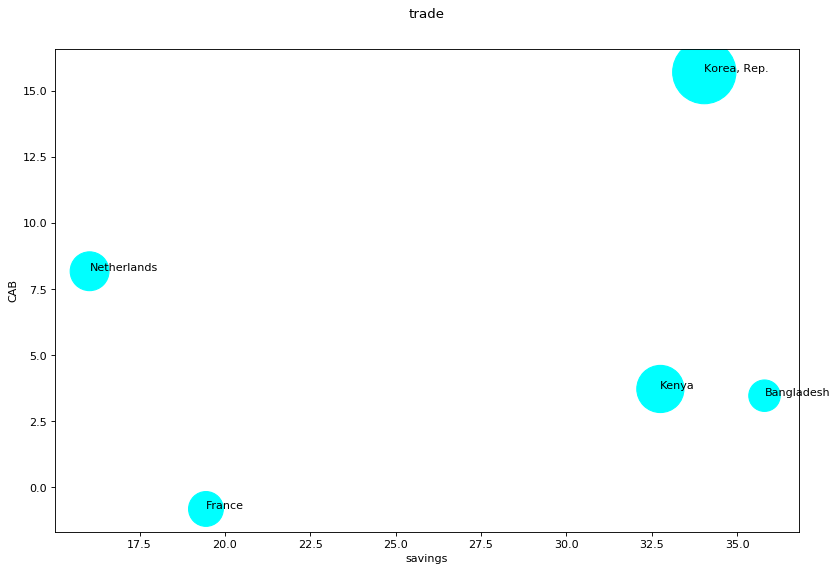

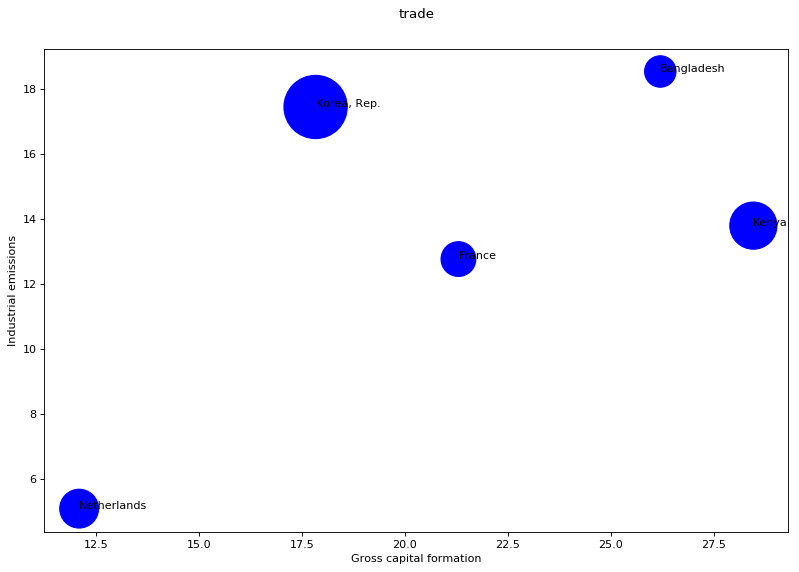

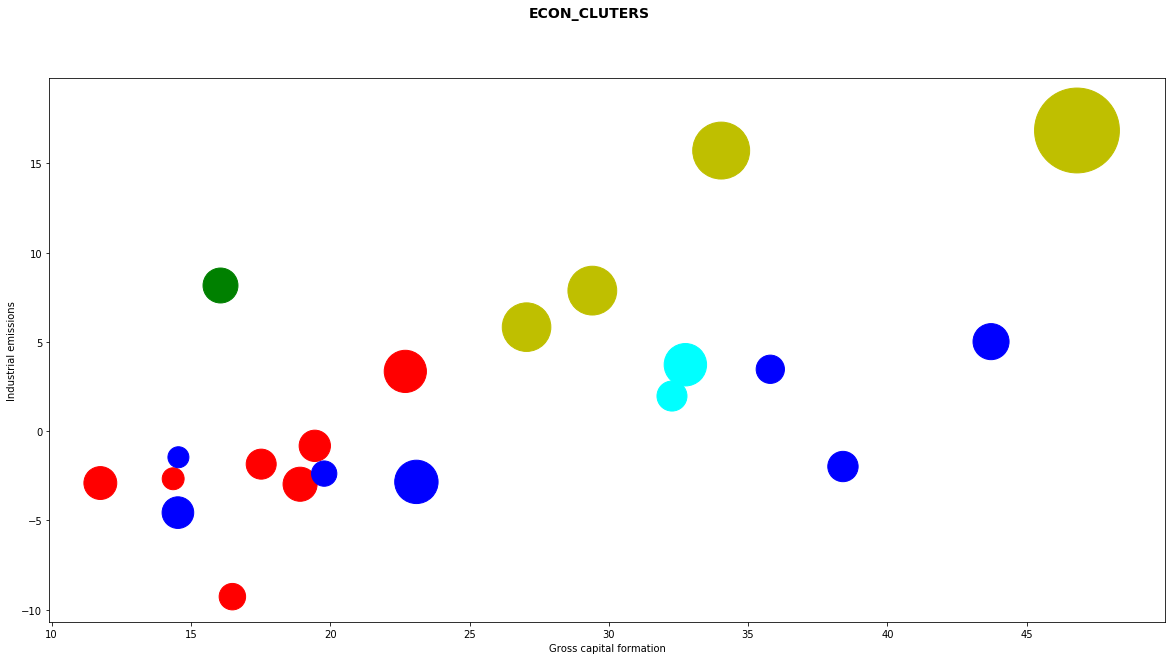

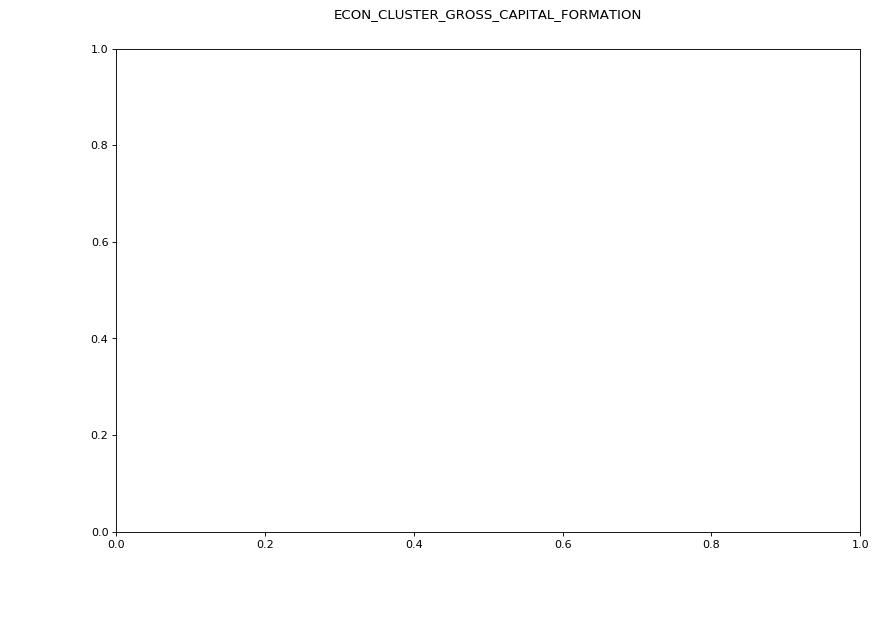

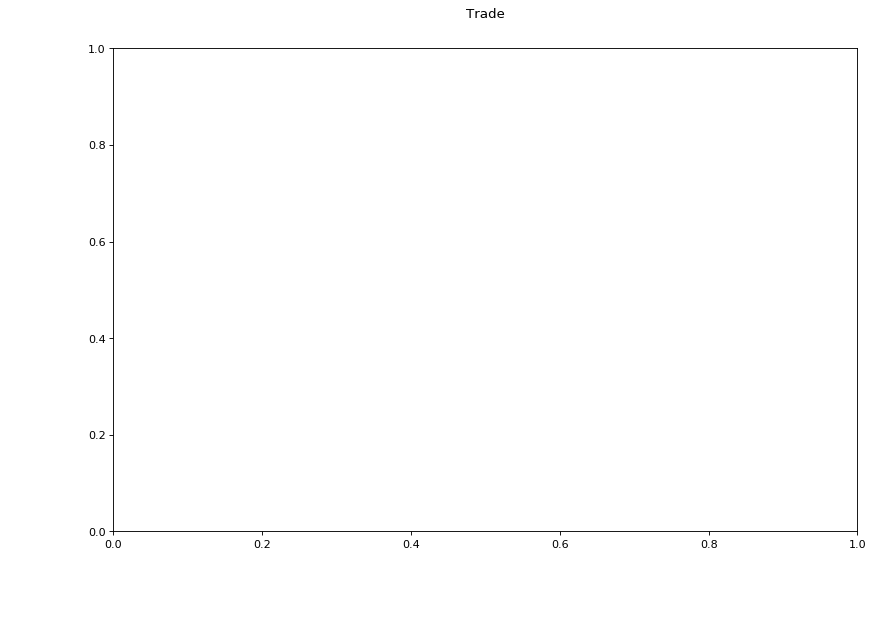

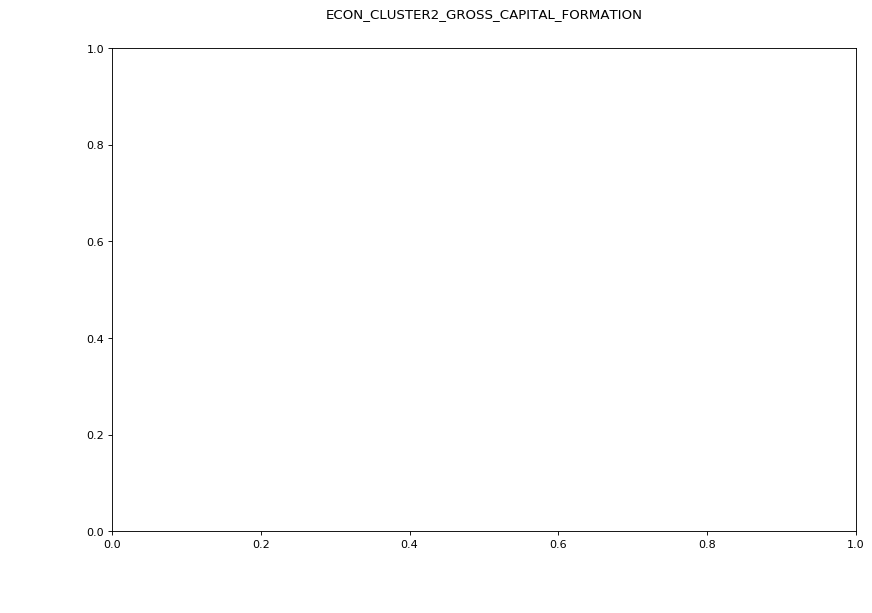

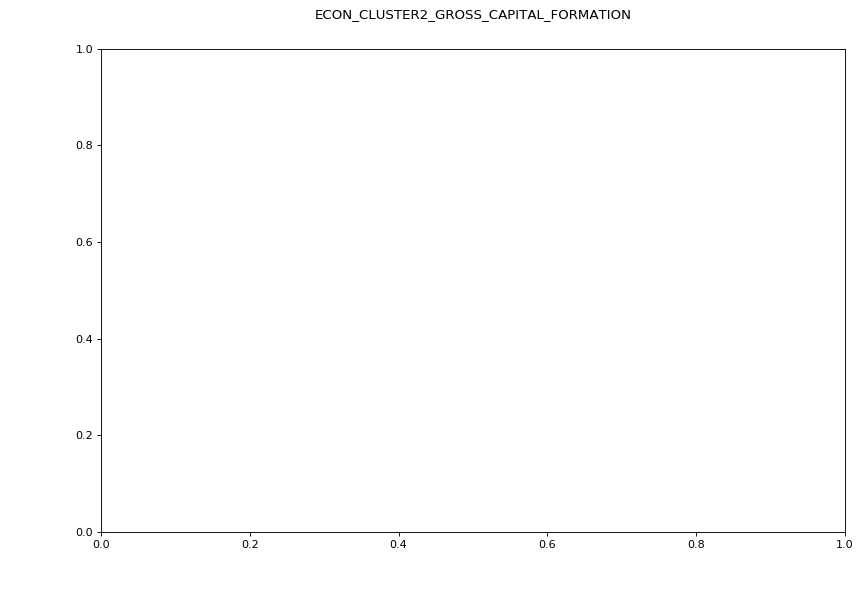

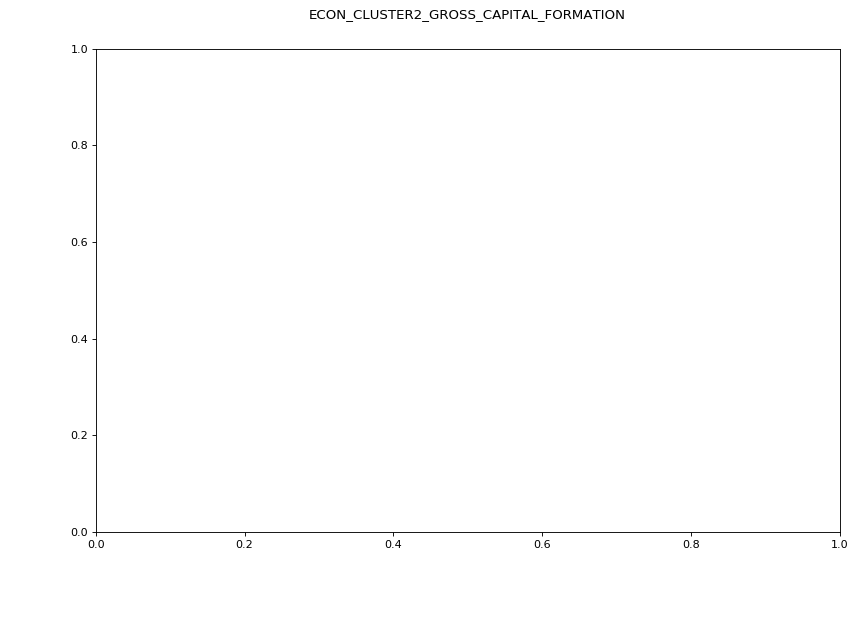

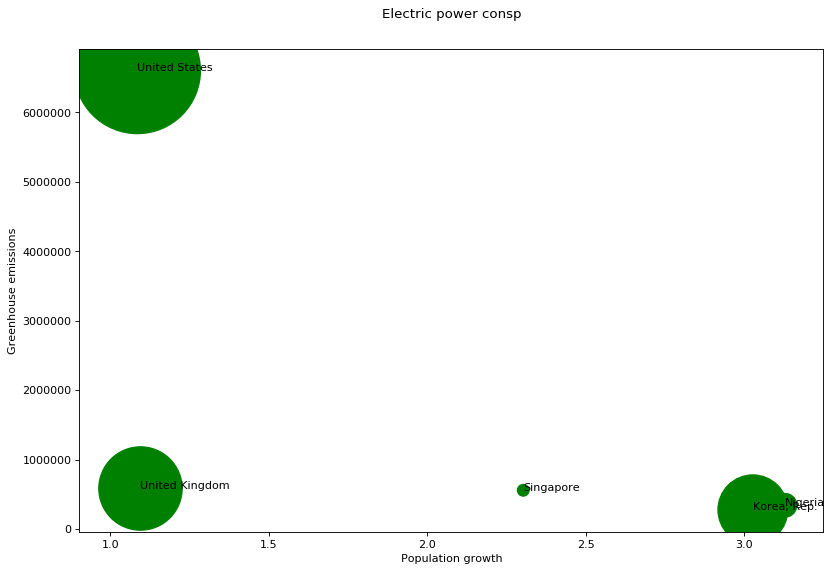

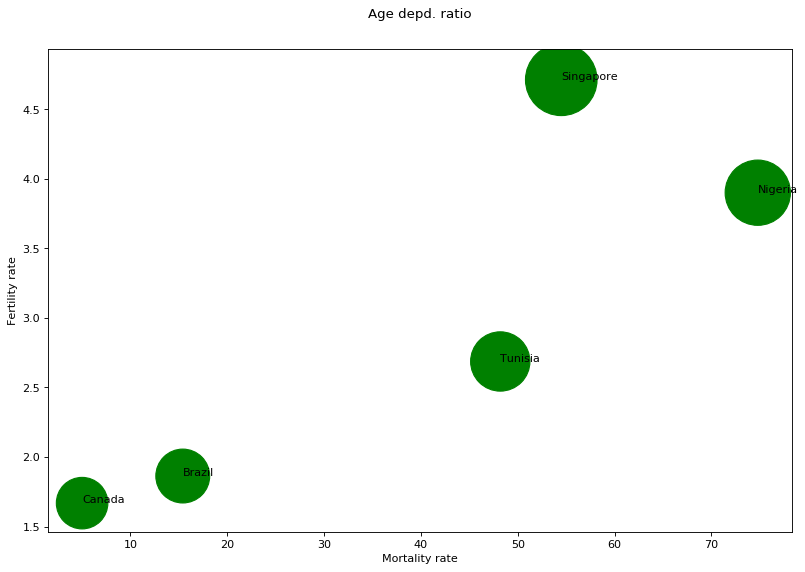

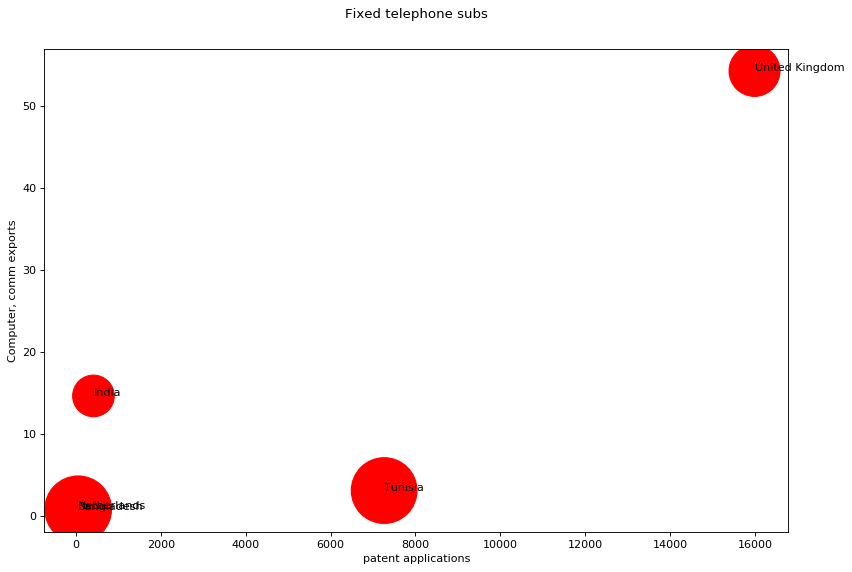

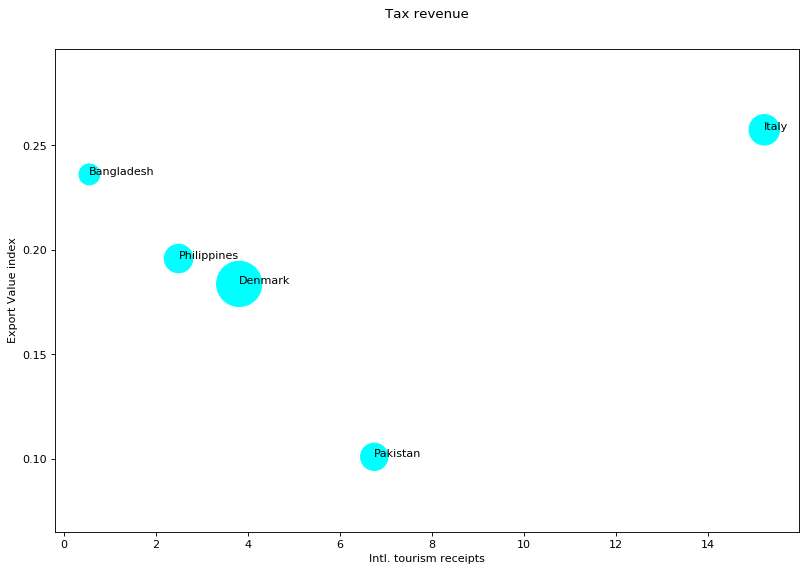

In [15]:
req_ec = {}
req_en = {}
req_hl = {}
req_inf = {}
req_sc = {}
for i,j in enumerate(economic):
    req_ec[j] = i
for i,j in enumerate(sector):
    req_sc[j] = i
for i,j in enumerate(environment):
    req_en[j] = i
for i,j in enumerate(infra):
    req_inf[j] = i
for i,j in enumerate(health):
    req_hl[j] = i
 

req_eco = ['Adjusted savings: gross savings (% of GNI)','GDP per capita (constant 2010 US$)',
           'GDP growth (annual %)','Trade (% of GDP)','Current account balance (% of GDP)',
        'Total reserves (includes gold, current US$)','Gross national expenditure (% of GDP)','Gross capital formation (% of GDP)']

req_env = ['Urban population growth (annual %)','CO2 emissions from manufacturing industries and construction (% of total fuel combustion)',
          'Total greenhouse gas emissions (kt of CO2 equivalent)','Arable land (% of land area)',
          'Electric power consumption (kWh per capita)','Agricultural land (% of land area)']
req_sec = ['International tourism, receipts (% of total exports)',
          'Tax revenue (% of GDP)',
          'Export value index (2000 = 100)',
          'Import value index (2000 = 100)']
req_infra = ['Fixed telephone subscriptions (per 100 people)',
            'Patent applications, residents',
            'Computer, communications and other services (% of commercial service exports)']
req_health = ['Mortality rate, infant (per 1,000 live births)',
             'Age dependency ratio (% of working-age population)',
             'Fertility rate, total (births per woman)',
             'Population ages 0-14 (% of total)','Population ages 15-64 (% of total)']

#print(req_sc)
b = []
c = []
d = []

for i in ec:
    b.append(econ_data_X[2009][countries.index(i)][req_ec['Adjusted savings: gross savings (% of GNI)']])
    c.append(econ_data_X[2009][countries.index(i)][req_ec['Current account balance (% of GDP)']])
    d.append(int(float(econ_data_X[2009][countries.index(i)][req_ec['Trade (% of GDP)']]))*20)


plotBubble(ec,b,c,d,'trade','savings','CAB')

#plot2(ec,b,c,d,'econ')

b = []
c = []
d = []

for i in ec:
    b.append(econ_data_X[2009][countries.index(i)][req_ec['Gross capital formation (% of GDP)']])
    c.append(environment_data_X[2009][countries.index(i)][req_en['CO2 emissions from manufacturing industries and construction (% of total fuel combustion)']])
    d.append(int(float(econ_data_X[2009][countries.index(i)][req_ec['Trade (% of GDP)']]))*20)


plotBubble(ec,b,c,d,'trade','Gross capital formation','Industrial emissions')
# #--------------------------------------------------------------------------------------------------------------------------------
b = []
c = []
d = []
import matplotlib.pyplot as PLT
fig = PLT.figure()
fig.suptitle('ECON_CLUTERS', fontsize=14, fontweight='bold')
fig.set_size_inches(20,10)

econ_cluster1 = ['Canada', 'Denmark', 'France', 'Indonesia', 'Singapore', 'United Kingdom', 'United States']
for i in econ_cluster1:
    b.append(econ_data_X[2009][countries.index(i)][req_ec['Adjusted savings: gross savings (% of GNI)']])
    c.append(econ_data_X[2009][countries.index(i)][req_ec['Current account balance (% of GDP)']])
    d.append(int(float(econ_data_X[2009][countries.index(i)][req_ec['Trade (% of GDP)']]))*20)


plotBubble2(fig,'r',econ_cluster1,b,c,d,'ECON_CLUSTER_GROSS_CAPITAL_FORMATION','Gross capital formation','Industrial emissions')

b = []
c = []
d = []
econ_cluster2 = ['Bangladesh', 'Brazil', 'Tunisia', 'Italy', 'Nigeria', 'Pakistan', 'Thailand']
for i in econ_cluster2:
    b.append(econ_data_X[2009][countries.index(i)][req_ec['Adjusted savings: gross savings (% of GNI)']])
    c.append(econ_data_X[2009][countries.index(i)][req_ec['Current account balance (% of GDP)']])
    d.append(int(float(econ_data_X[2009][countries.index(i)][req_ec['Trade (% of GDP)']]))*20)


plotBubble2(fig,'b',econ_cluster2,b,c,d,'Trade','Savings','CAB')


b = []
c = []
d = []
econ_cluster3 = ['Netherlands']
for i in econ_cluster3:
    b.append(econ_data_X[2009][countries.index(i)][req_ec['Adjusted savings: gross savings (% of GNI)']])
    c.append(econ_data_X[2009][countries.index(i)][req_ec['Current account balance (% of GDP)']])
    d.append(int(float(econ_data_X[2009][countries.index(i)][req_ec['Trade (% of GDP)']]))*20)


plotBubble2(fig,'g',econ_cluster3,b,c,d,'ECON_CLUSTER2_GROSS_CAPITAL_FORMATION','Gross capital formation','Industrial emissions')
# #plot2(countries,b,c,d,'econ-env')

b = []
c = []
d = []
econ_cluster4 = ['Korea, Rep.', 'Malaysia', 'Philippines', 'Sudan']
for i in econ_cluster4:
    b.append(econ_data_X[2009][countries.index(i)][req_ec['Adjusted savings: gross savings (% of GNI)']])
    c.append(econ_data_X[2009][countries.index(i)][req_ec['Current account balance (% of GDP)']])
    d.append(int(float(econ_data_X[2009][countries.index(i)][req_ec['Trade (% of GDP)']]))*20)


plotBubble2(fig,'y',econ_cluster4,b,c,d,'ECON_CLUSTER2_GROSS_CAPITAL_FORMATION','Gross capital formation','Industrial emissions')

b = []
c = []
d = []
econ_cluster5 = ['India', 'Kenya']
for i in econ_cluster5:
    b.append(econ_data_X[2009][countries.index(i)][req_ec['Adjusted savings: gross savings (% of GNI)']])
    c.append(econ_data_X[2009][countries.index(i)][req_ec['Current account balance (% of GDP)']])
    d.append(int(float(econ_data_X[2009][countries.index(i)][req_ec['Trade (% of GDP)']]))*20)


plotBubble2(fig,'cyan',econ_cluster5,b,c,d,'ECON_CLUSTER2_GROSS_CAPITAL_FORMATION','Gross capital formation','Industrial emissions')

# #-------------------------------------------------------------------------------------------------------------------------------

b = []
c = []
d = []

for i in en:
    b.append(environment_data_X[2009][countries.index(i)][req_en['Urban population growth (annual %)']])
    c.append(environment_data_X[2009][countries.index(i)][req_en['Total greenhouse gas emissions (kt of CO2 equivalent)']])
    d.append(int(float(environment_data_X[2009][countries.index(i)][req_en['Electric power consumption (kWh per capita)']])))
    
plotBubble(en,b,c,d,'Electric power consp','Population growth','Greenhouse emissions')
#plot2(en,b,c,d,'environ')

b = []
c = []
d = []

for i in hl:
    b.append(health_data_X[2009][countries.index(i)][req_hl['Mortality rate, infant (per 1,000 live births)']])
    c.append(health_data_X[2009][countries.index(i)][req_hl['Fertility rate, total (births per woman)']])
    d.append(int(float(health_data_X[2009][countries.index(i)][req_hl['Age dependency ratio (% of working-age population)']]))*50)
    
plotBubble(hl,b,c,d,'Age depd. ratio','Mortality rate','Fertility rate')
# plot2(hl,b,c,d,'health')
b = []
c = []
d = []

for i in inf:
    b.append(infra_data_X[2009][countries.index(i)][req_inf['Patent applications, residents']])
    c.append(infra_data_X[2009][countries.index(i)][req_inf['Fixed telephone subscriptions (per 100 people)']])
    d.append(int(float(infra_data_X[2009][countries.index(i)][req_inf['Computer, communications and other services (% of commercial service exports)']]))*50)
    
plotBubble(inf,b,c,d,'Fixed telephone subs','patent applications','Computer, comm exports')
# plot2(inf,b,c,d,'health')

b = []
c = []
d = []

for i in sc:
    b.append(sector_data_X[2009][countries.index(i)][req_sc['International tourism, receipts (% of total exports)']])
    c.append(float(sector_data_X[2009][countries.index(i)][req_sc['Export value index (2000 = 100)']])/1000)
    d.append(int(float(sector_data_X[2009][countries.index(i)][req_sc['Tax revenue (% of GDP)']]))*50)
    
plotBubble(sc,b,c,d,'Tax revenue','Intl. tourism receipts','Export Value index')
#plot2(sc,b,c,d,'sector')

In [16]:
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from sklearn.preprocessing import StandardScaler

%matplotlib inline

## Elbow Analysis -

- The Elbow method is a method of interpretation and validation of consistency within cluster analysis designed to help finding the appropriate number of clusters in a dataset.

- Explained Variance: This method looks at the percentage of variance explained as a function of the number of clusters: One should choose a number of clusters so that adding another cluster doesn't give much better modeling of the data.

- if one plots the percentage of variance explained by the clusters against the number of clusters the first clusters will add much information (explain a lot of variance), but at some point the marginal gain in explained variance will drop, giving an angle in the graph. The number of clusters is chosen at this point, hence the "elbow criterion"

- Given a set of observations (x1, x2, …, xn), where each observation is a d-dimensional real vector, k-means clustering aims to partition the n observations into k (≤ n) sets S = {S1, S2, …, Sk} so as to minimize the within-cluster sum of squares (WCSS) (sum of distance functions of each point in the cluster to the K center).

- In other words, its objective is to find:
argminS∑i=1k∑x∈Si‖‖x−μi‖‖2

In [17]:
def elbow_analysis(data,dataset_name,year):
    
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform( data )
    
    cluster_range = range(1,10)
    cluster_errors = []
    
    for num_clusters in cluster_range:
        clusters = helper.cal_helper( num_clusters)
        
        clusters.fit( X_scaled )
        cluster_errors.append( clusters.inertia_ )
        
    clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
    
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)
    ax1.set_title("Elbow Analysis for " + dataset_name + " year: " + str(year))
    ax1.set_xlabel("Number of clusters")
    ax1.set_ylabel("Within Cluster distance")
    ax1.plot(clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o")
    plt.show()
#     plt.figure(figsize=(12,6))
#     plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

#     print clusters_df[0:len(cluster_range)]

## Silhouette Analysis

- The silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation).

- The silhouette ranges from -1 to 1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.

- If most objects have a high value, then the clustering configuration is appropriate. If many points have a low or negative value, then the clustering configuration may have too many or too few clusters.

- The silhouette can be calculated with any distance metric, such as the Euclidean distance or the Manhattan distance.

Silhouette score of an observation is given by:

s(i)=b(i)−a(i)/max{a(i),b(i)}

Score closer to 1 means assigned to the cluster correctly and score closer to -1 is assigned to a wrong cluster. 
A score close to 0 means the point lies between almost at the boundary of both the clusters.

In [18]:
def Silhouette_analysis(data,dataset_name,year):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform( data )
    
    cluster_range = range( 2, 8 )

    for n_clusters in cluster_range:
    # Create a subplot with 1 row and 2 columns
        fig, ax1 = plt.subplots(1, 1)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X_scaled) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = helper.cal_helper(n_clusters=n_clusters)
        cluster_labels = clusterer.fit_predict( X_scaled )

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X_scaled, cluster_labels)
        print("For n_clusters =", n_clusters,
            "The average silhouette_score is :", silhouette_avg)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X_scaled, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
          # Aggregate the silhouette scores for samples belonging to
          # cluster i, and sort them
          ith_cluster_silhouette_values = \
              sample_silhouette_values[cluster_labels == i]

          ith_cluster_silhouette_values.sort()
#           print(ith_cluster_silhouette_values)
        
          size_cluster_i = ith_cluster_silhouette_values.shape[0]
          y_upper = y_lower + size_cluster_i

          color = cm.spectral(float(i) / n_clusters)
          ax1.fill_betweenx(np.arange(y_lower, y_upper),
                            0, ith_cluster_silhouette_values,
                            facecolor=color, edgecolor=color, alpha=0.7)

          # Label the silhouette plots with their cluster numbers at the middle
          ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

          # Compute the new y_lower for next plot
          y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("Silhouette plot for the various clusters for " + dataset_name + " year: " + str(year))
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhoutte score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        plt.show()

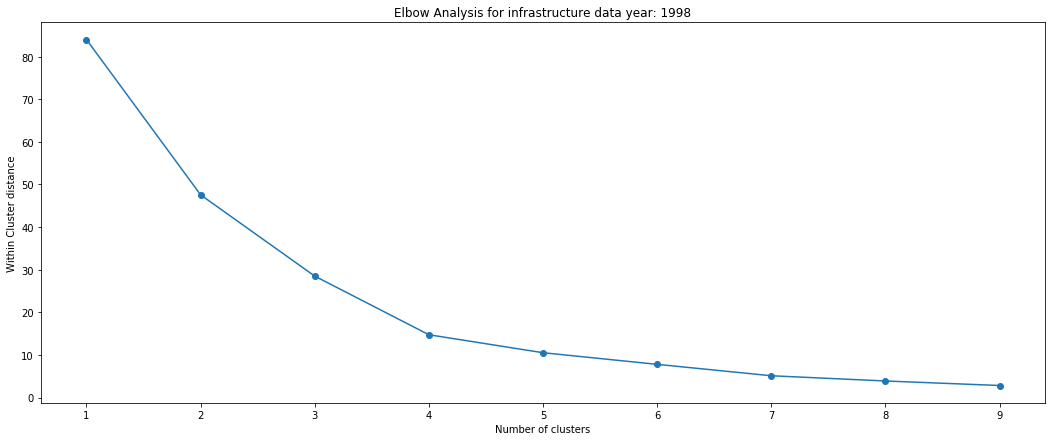

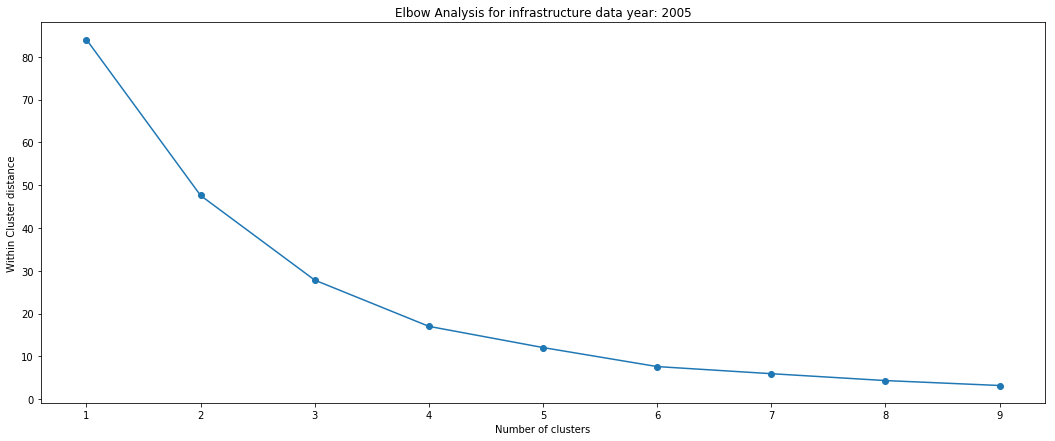

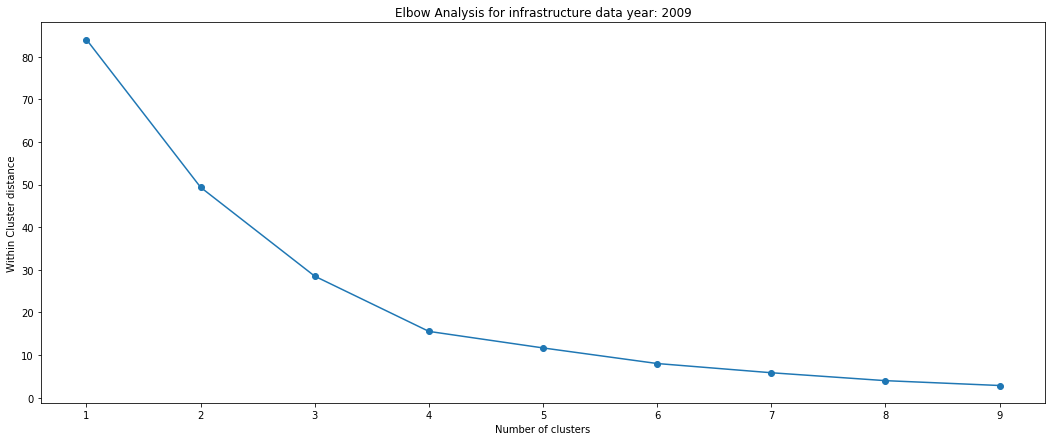

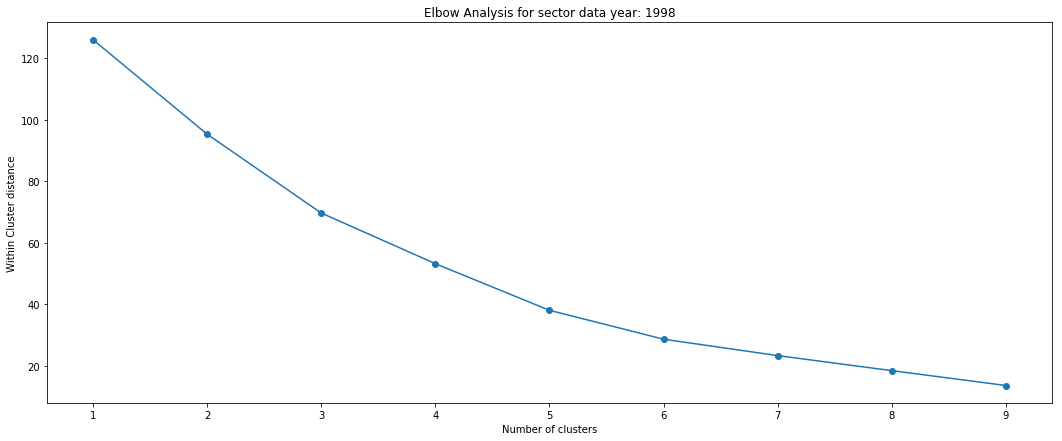

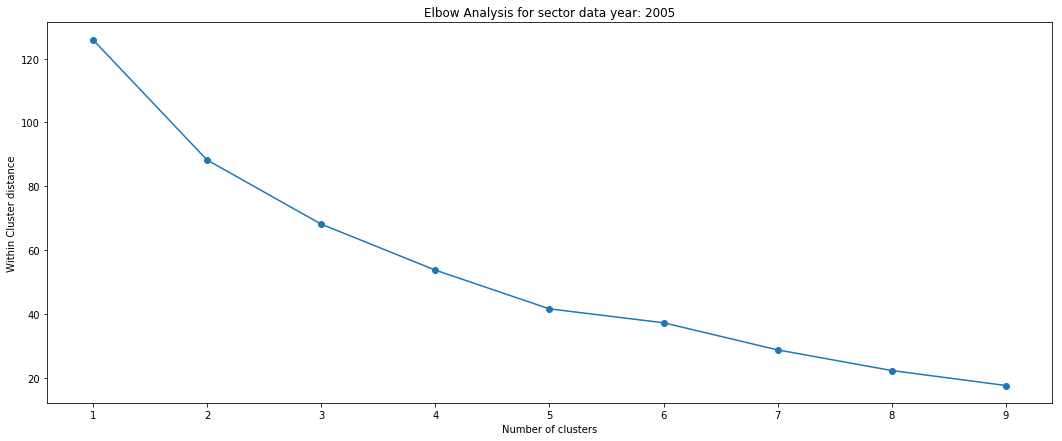

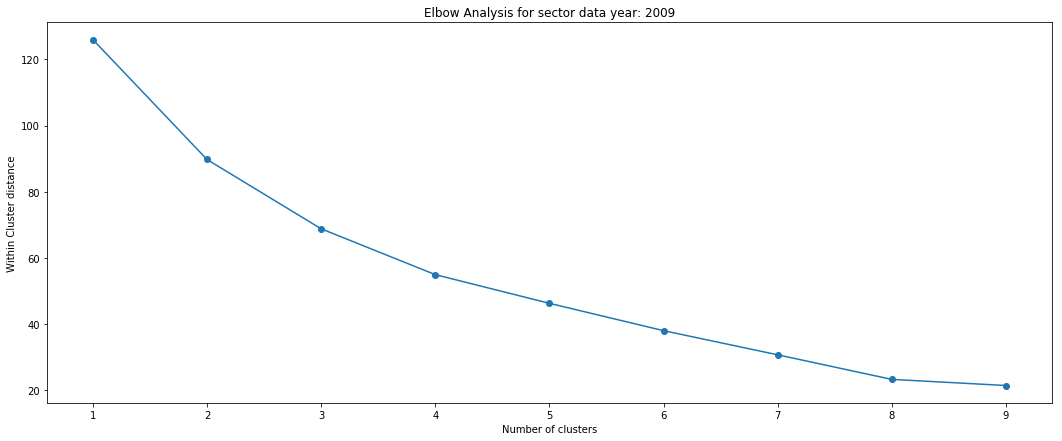

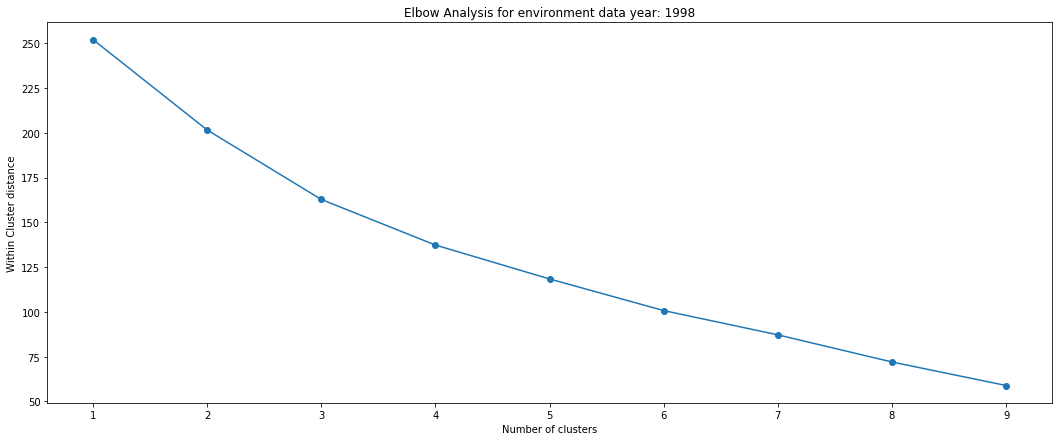

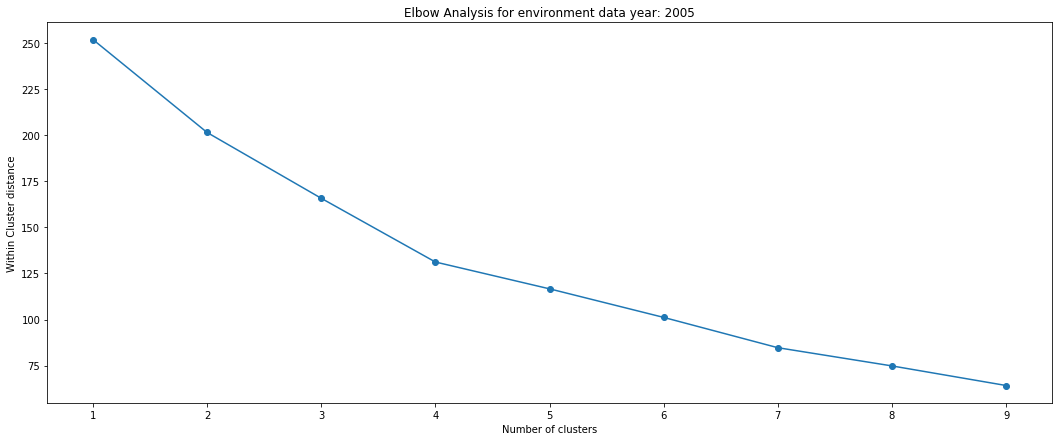

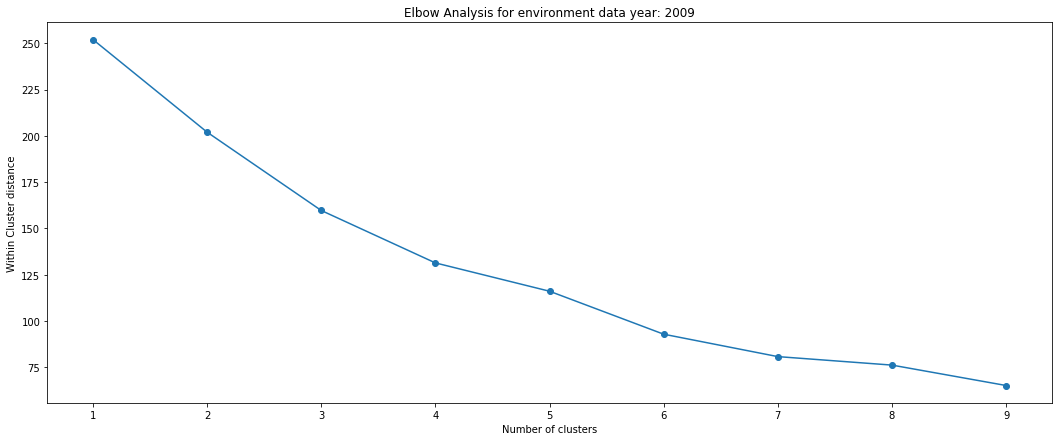

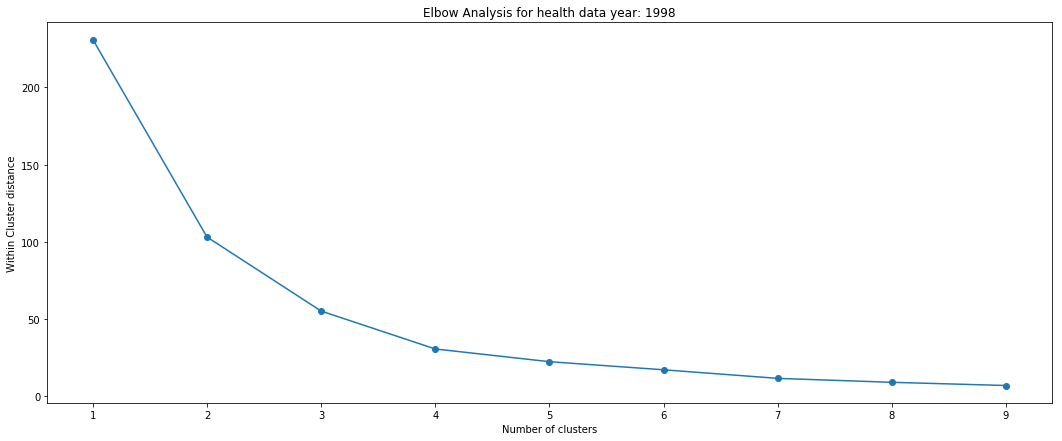

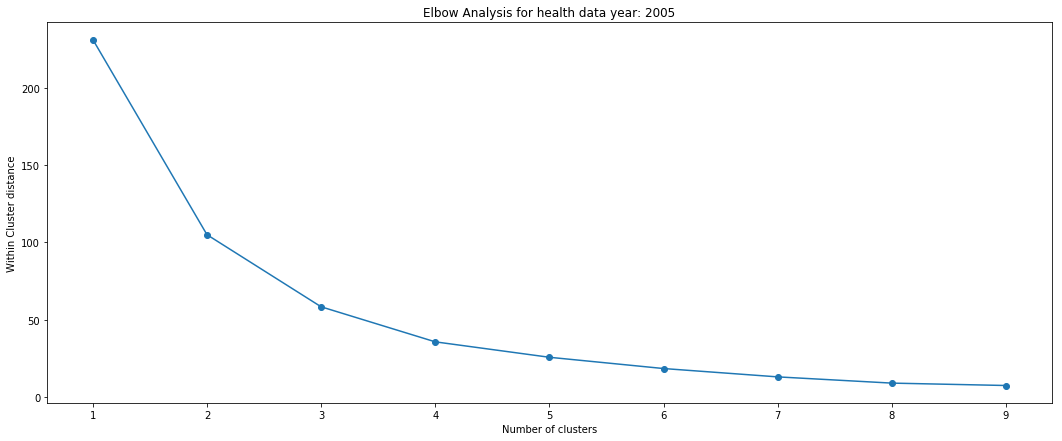

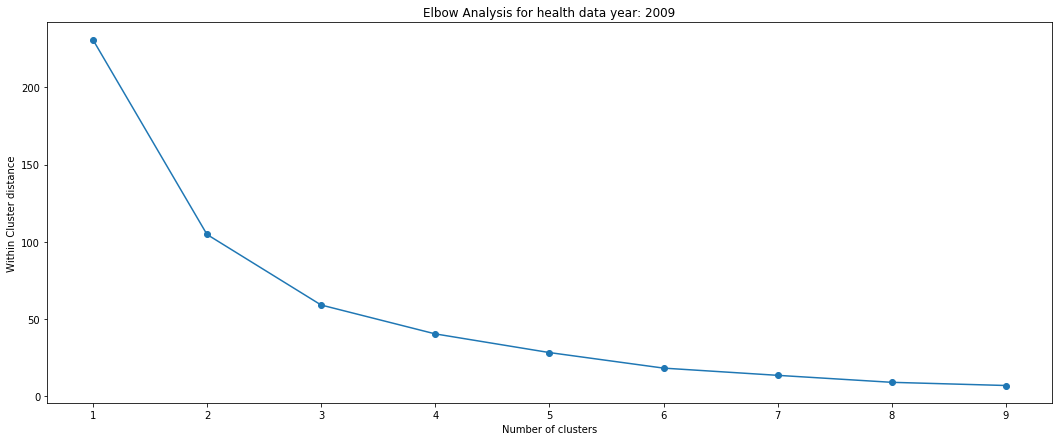

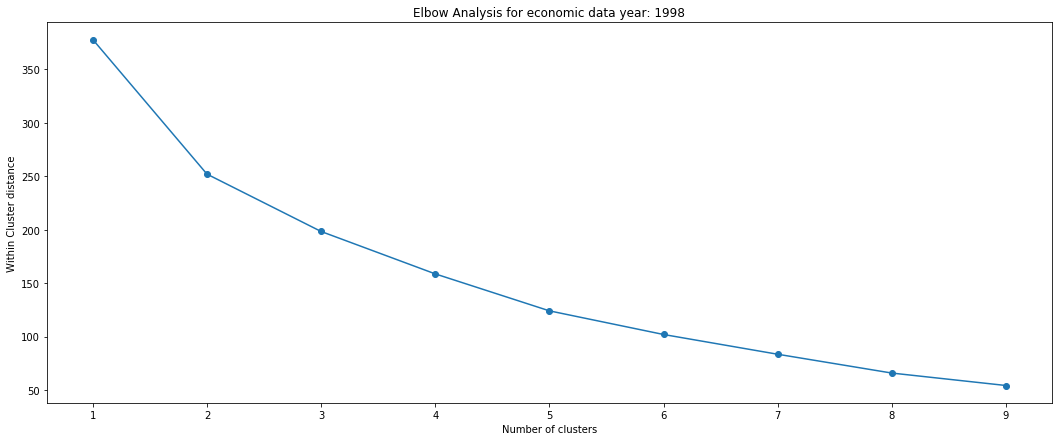

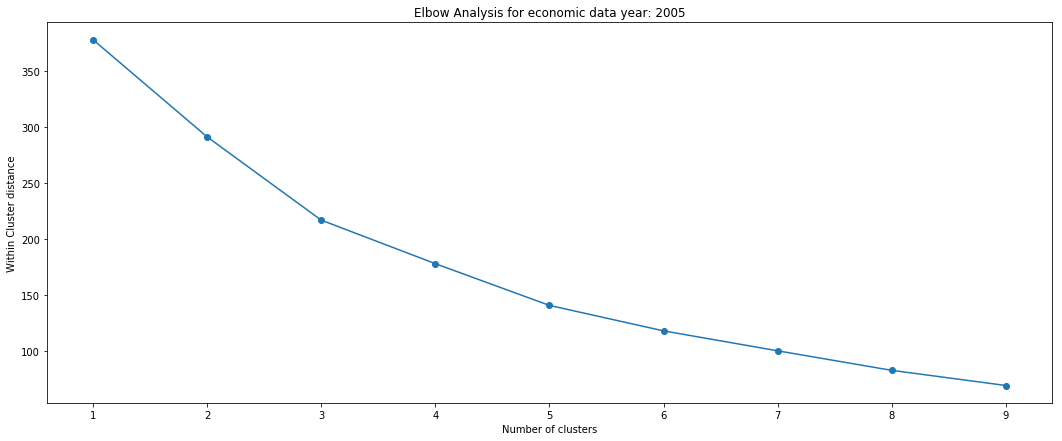

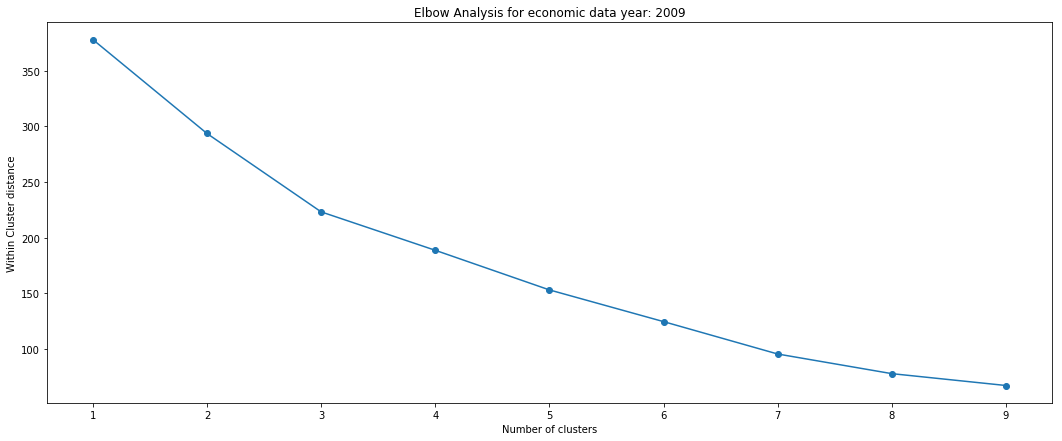

In [19]:
data = [[infra_data_X,"infrastructure data"],[sector_data_X,"sector data"],
        [environment_data_X,"environment data"],[health_data_X,"health data"],
        [econ_data_X,"economic data"]]
year = [1998,2005,2009]

for X in data:
    for yr in year:
#         print("Elbow analysis for " + X[1] + " year: " + str(yr) )
        
        elbow_analysis(X[0][yr],X[1],yr)
#         continue

For n_clusters = 2 The average silhouette_score is : 0.636183914696


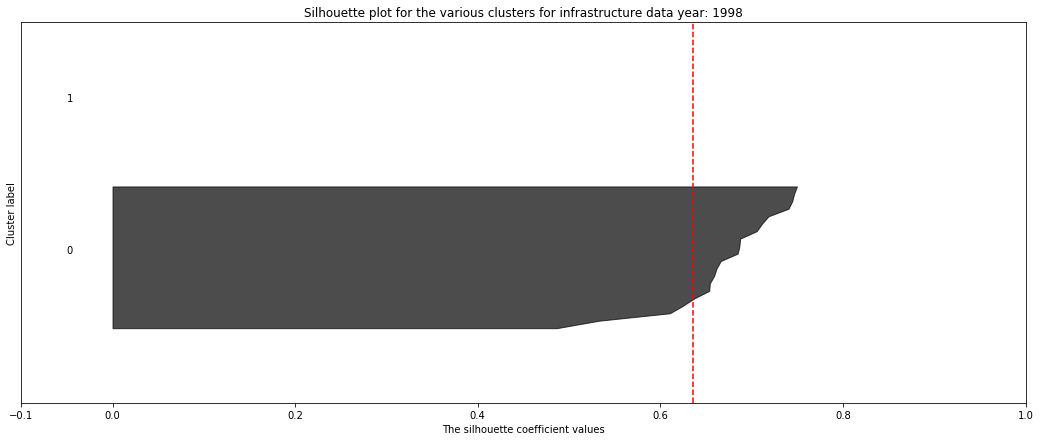

For n_clusters = 3 The average silhouette_score is : 0.36264217162


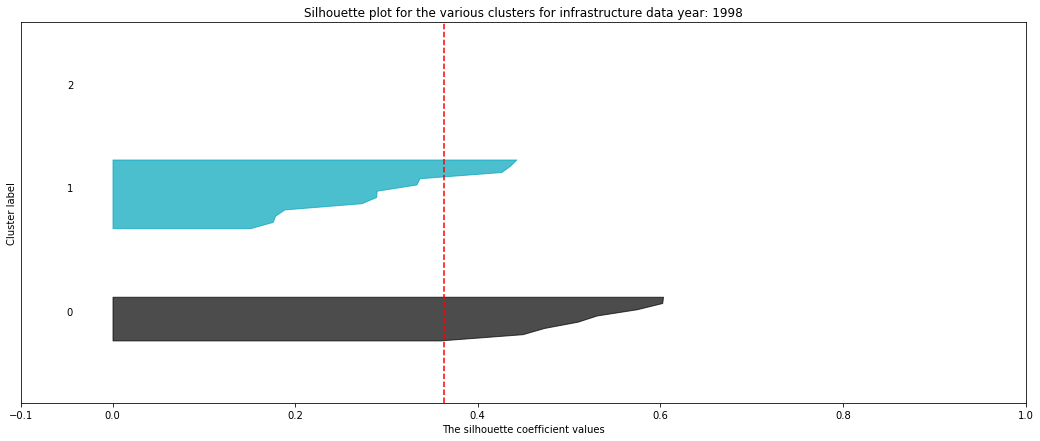

For n_clusters = 4 The average silhouette_score is : 0.439751571544


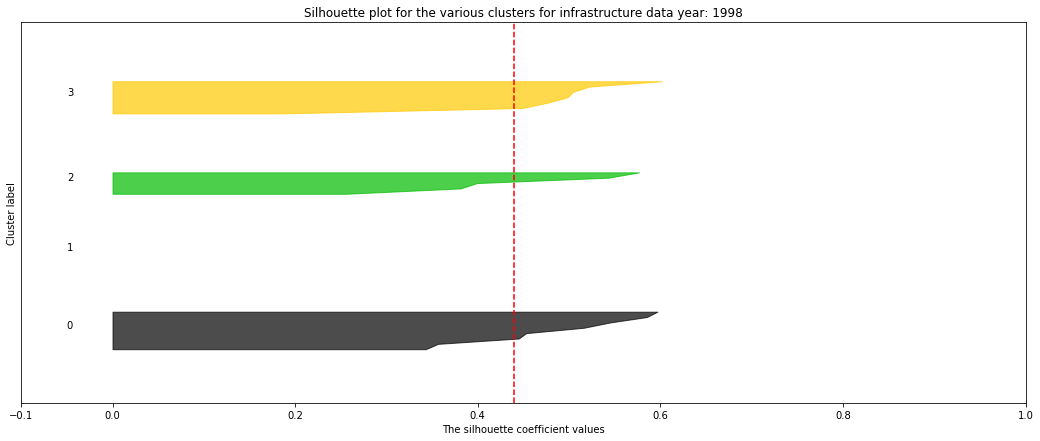

For n_clusters = 5 The average silhouette_score is : 0.436965914322


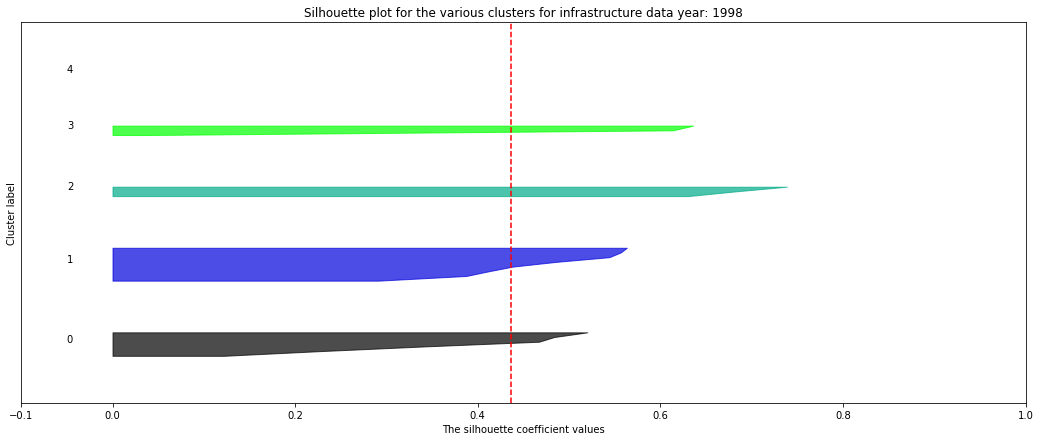

For n_clusters = 6 The average silhouette_score is : 0.495145380246


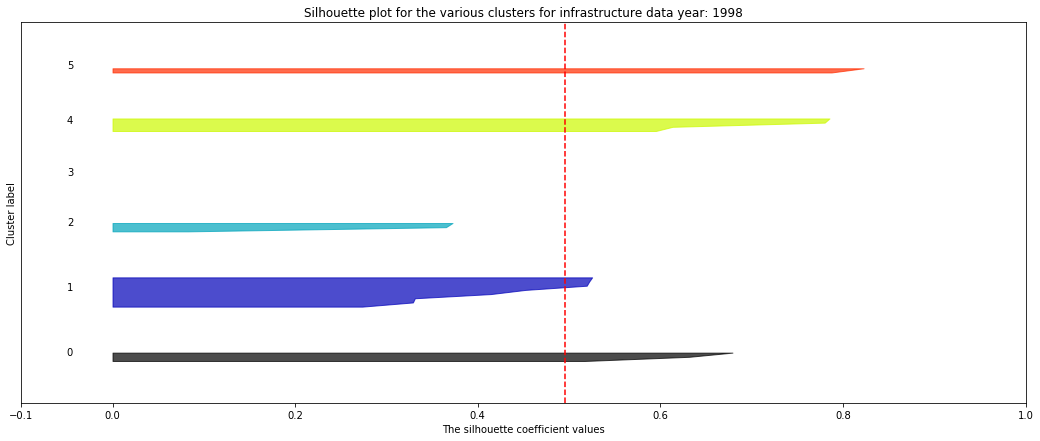

For n_clusters = 7 The average silhouette_score is : 0.461068191764


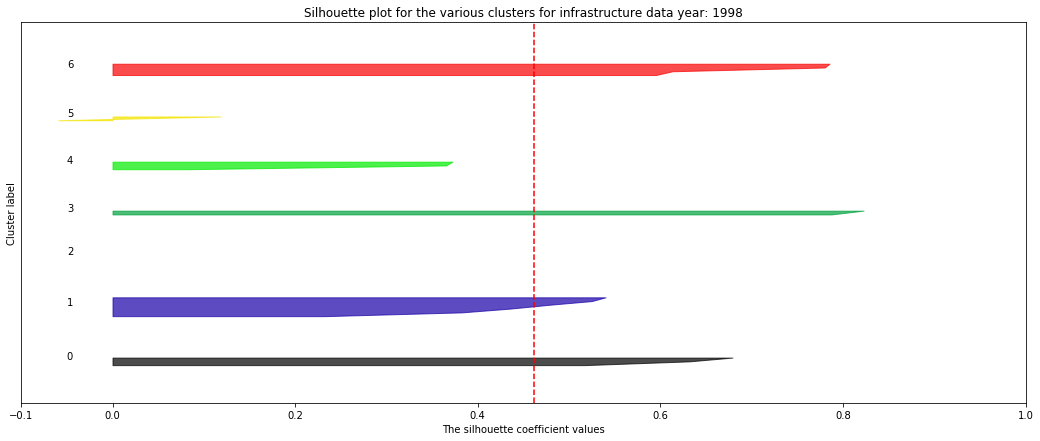

For n_clusters = 2 The average silhouette_score is : 0.548044902547


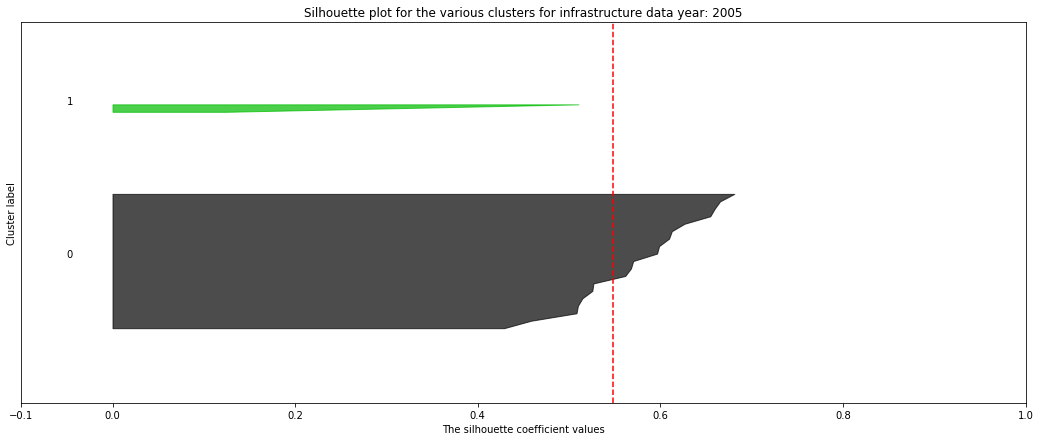

For n_clusters = 3 The average silhouette_score is : 0.36966713852


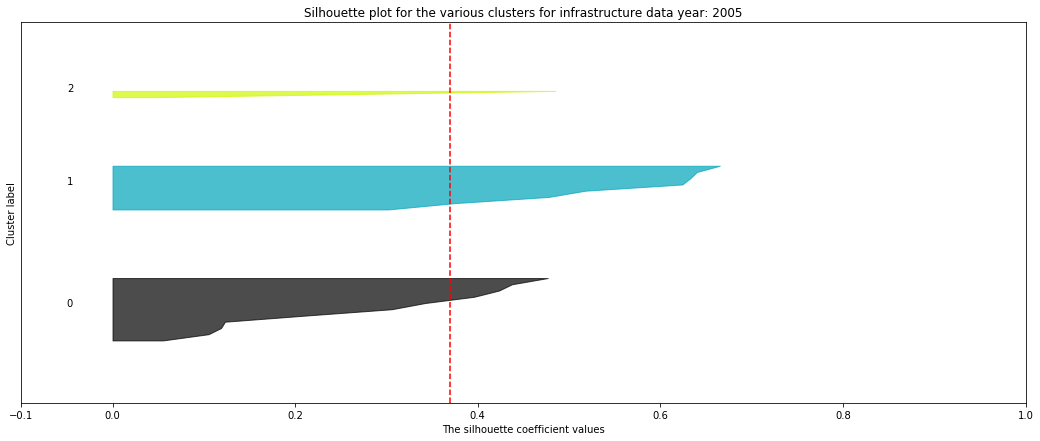

For n_clusters = 4 The average silhouette_score is : 0.424987165449


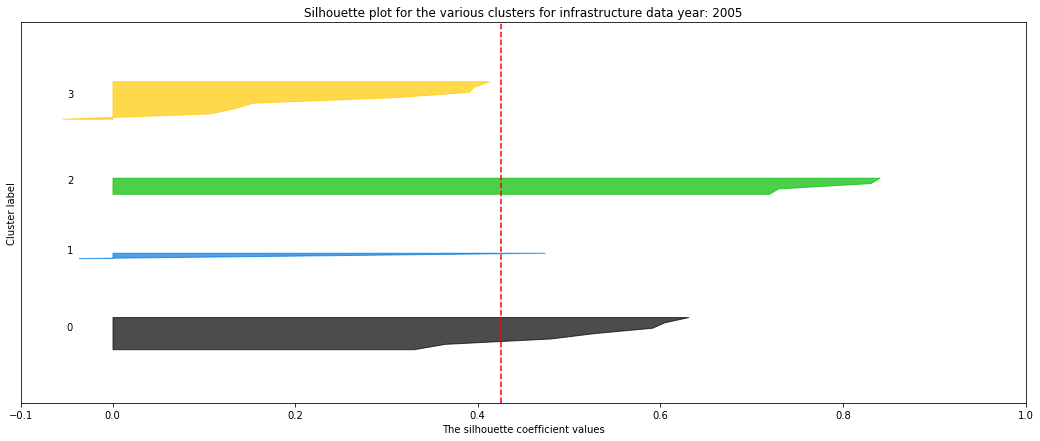

For n_clusters = 5 The average silhouette_score is : 0.461154562474


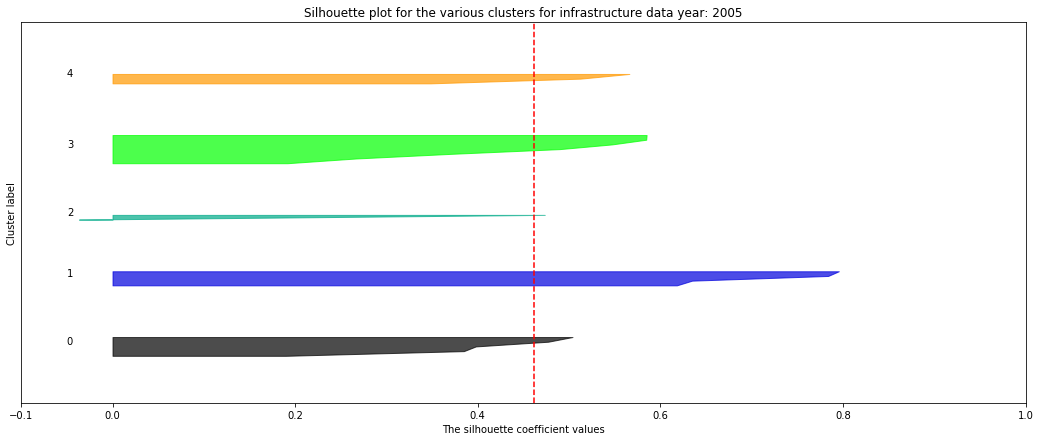

For n_clusters = 6 The average silhouette_score is : 0.440360489965


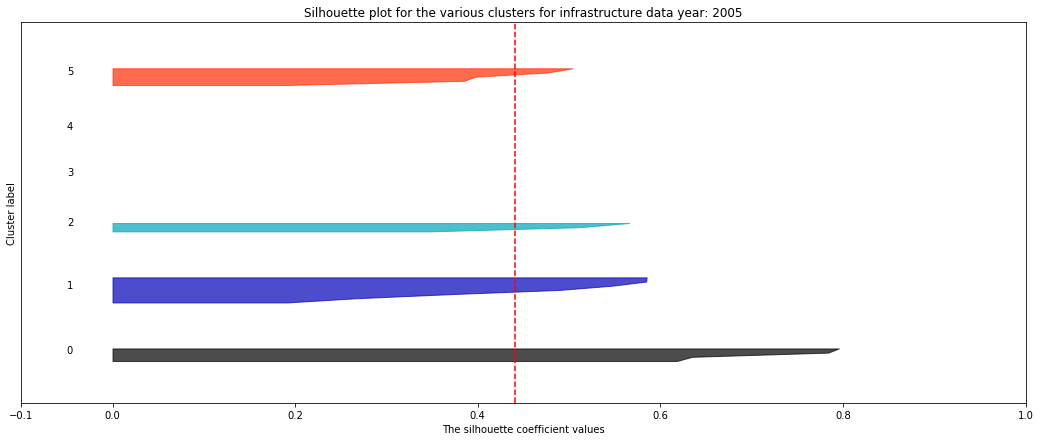

For n_clusters = 7 The average silhouette_score is : 0.412798620504


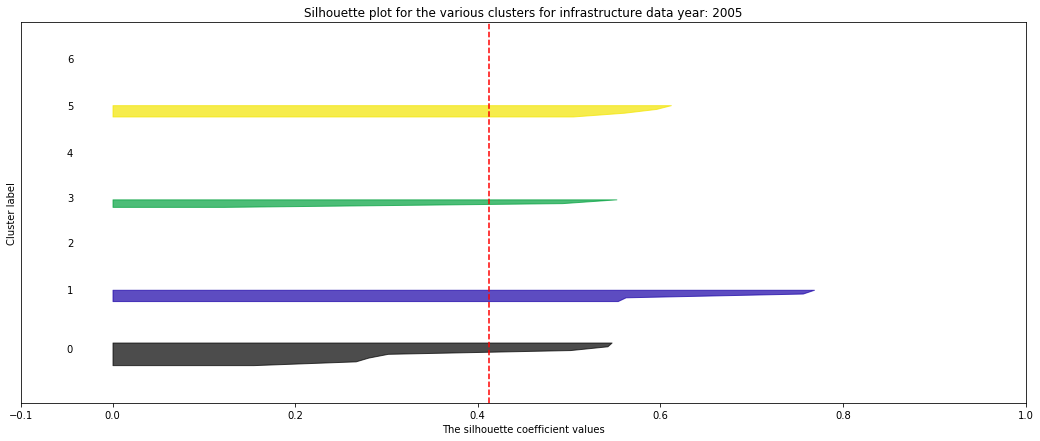

For n_clusters = 2 The average silhouette_score is : 0.535404413637


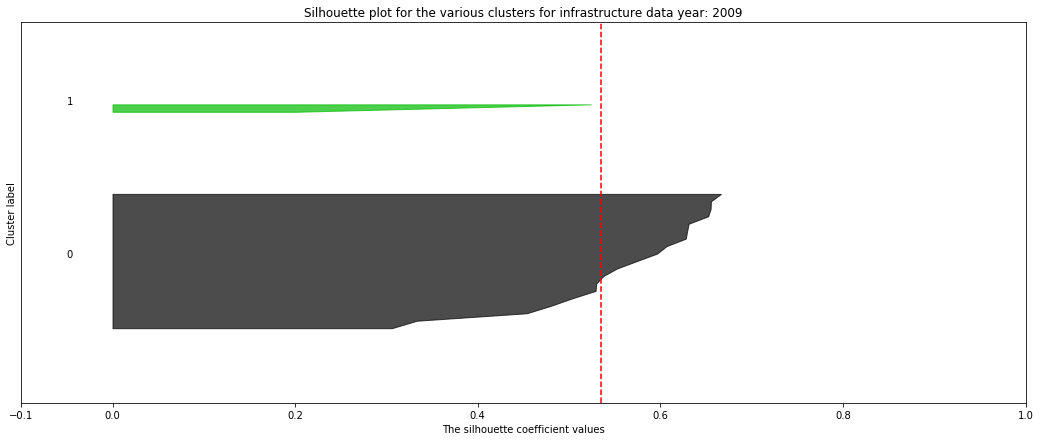

For n_clusters = 3 The average silhouette_score is : 0.398429501047


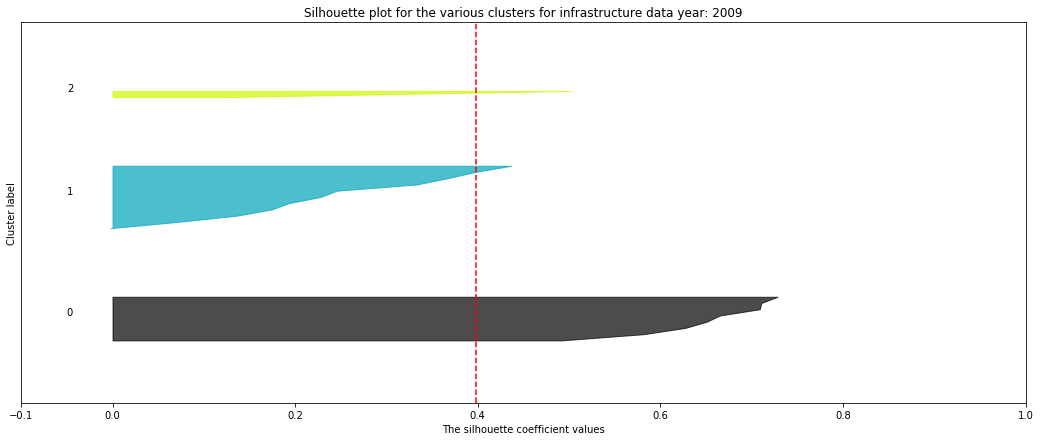

For n_clusters = 4 The average silhouette_score is : 0.495402451038


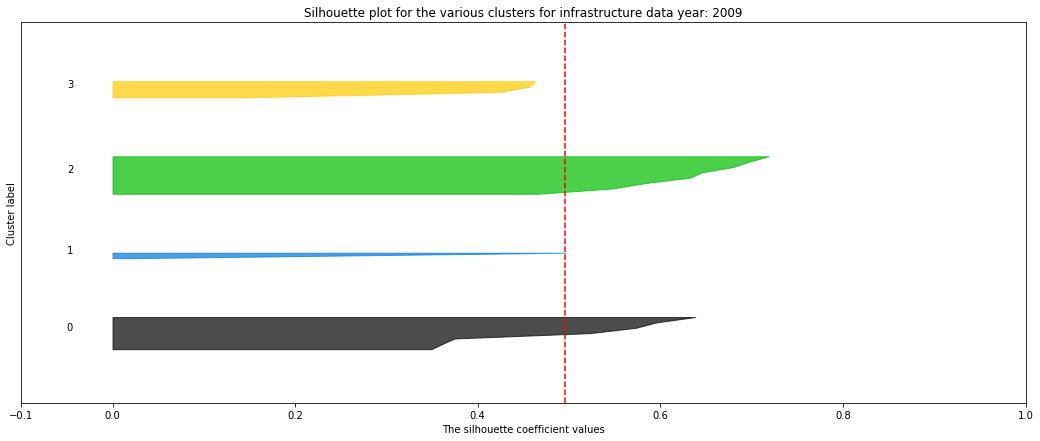

For n_clusters = 5 The average silhouette_score is : 0.464567487509


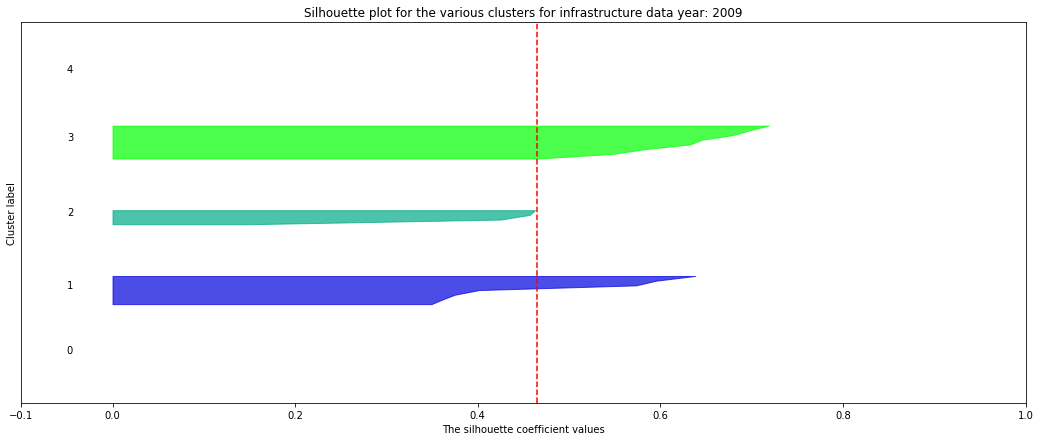

For n_clusters = 6 The average silhouette_score is : 0.510914960808


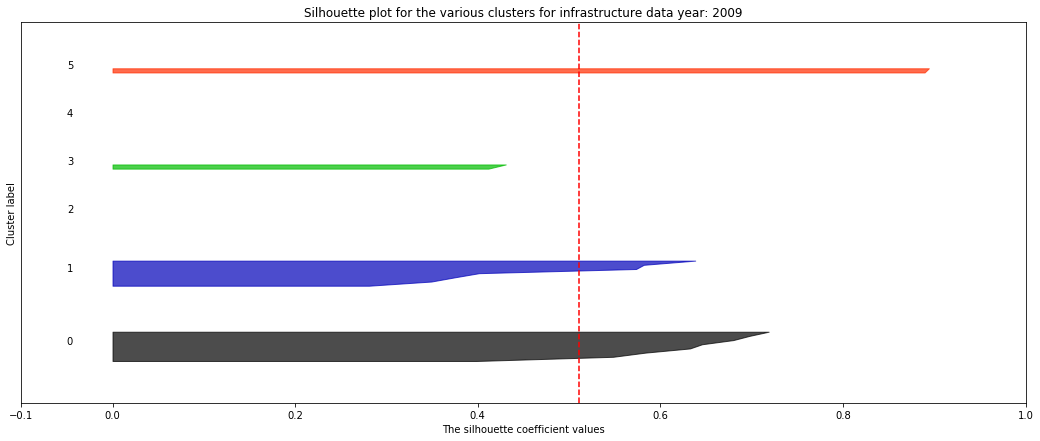

For n_clusters = 7 The average silhouette_score is : 0.442439303868


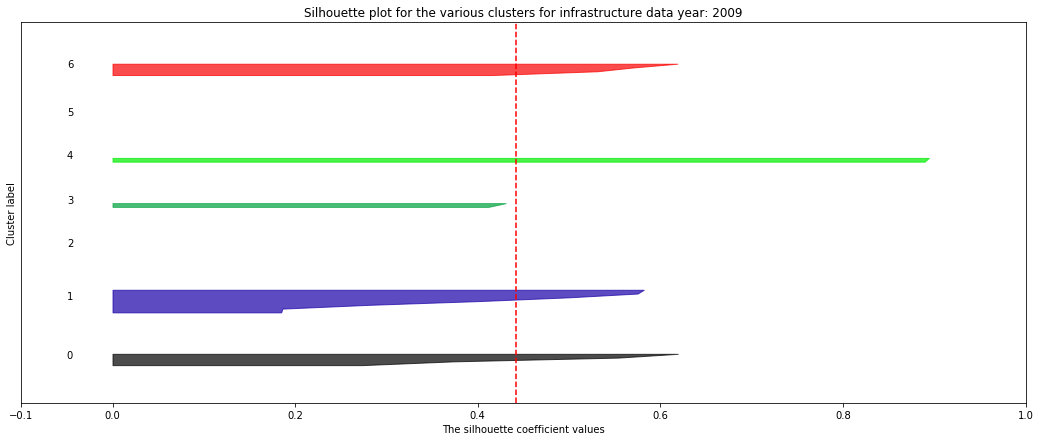

For n_clusters = 2 The average silhouette_score is : 0.230731286575


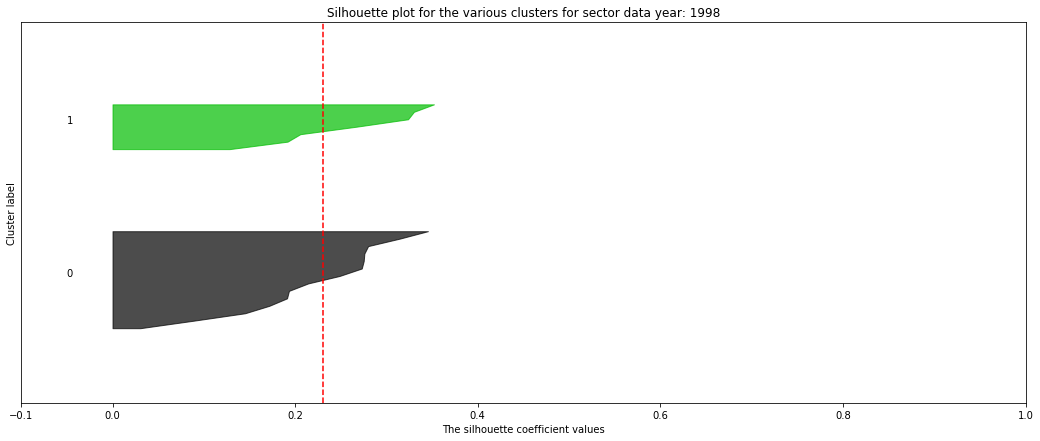

For n_clusters = 3 The average silhouette_score is : 0.250895581239


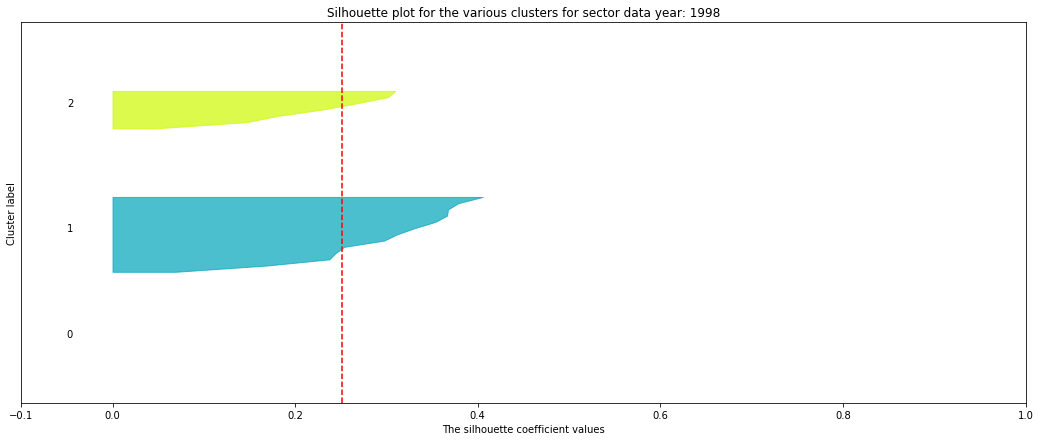

For n_clusters = 4 The average silhouette_score is : 0.234652968645


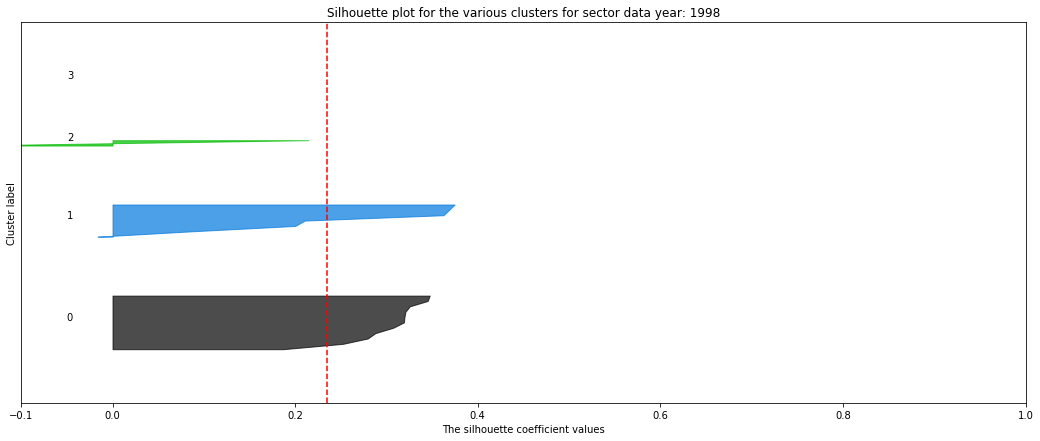

For n_clusters = 5 The average silhouette_score is : 0.278199708993


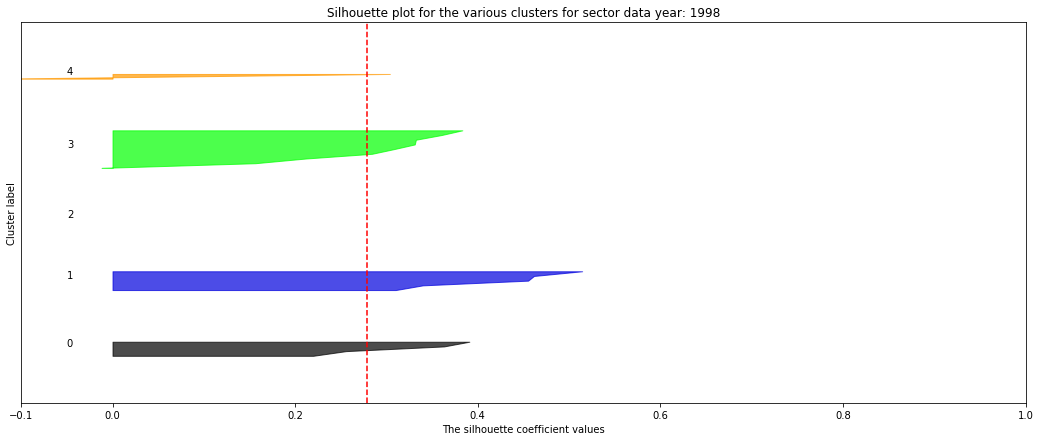

For n_clusters = 6 The average silhouette_score is : 0.276349286901


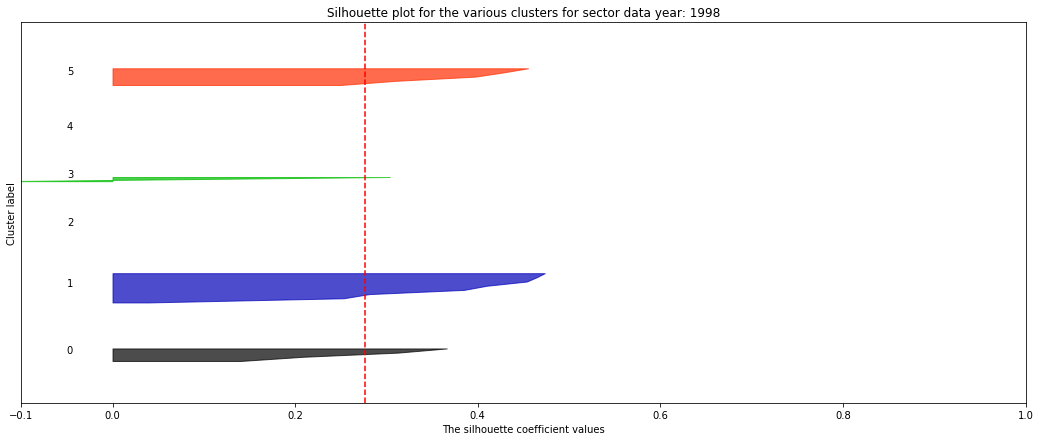

For n_clusters = 7 The average silhouette_score is : 0.262718896261


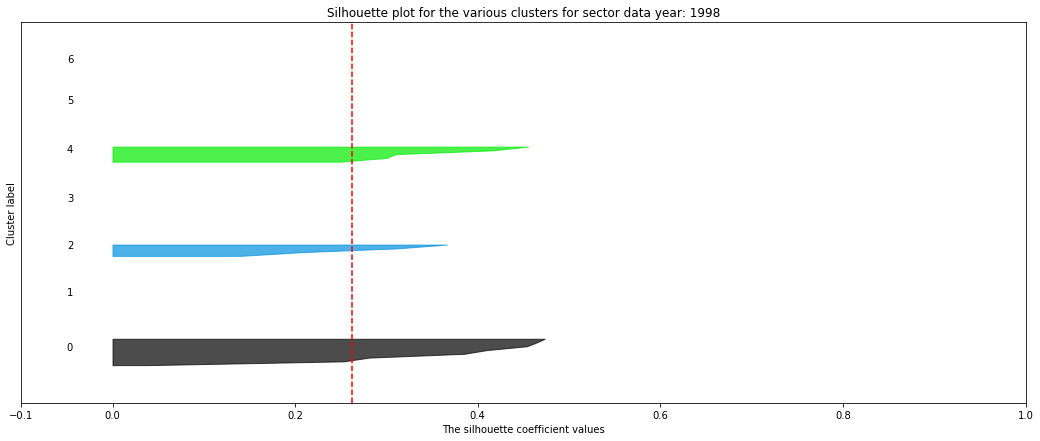

For n_clusters = 2 The average silhouette_score is : 0.291363342402


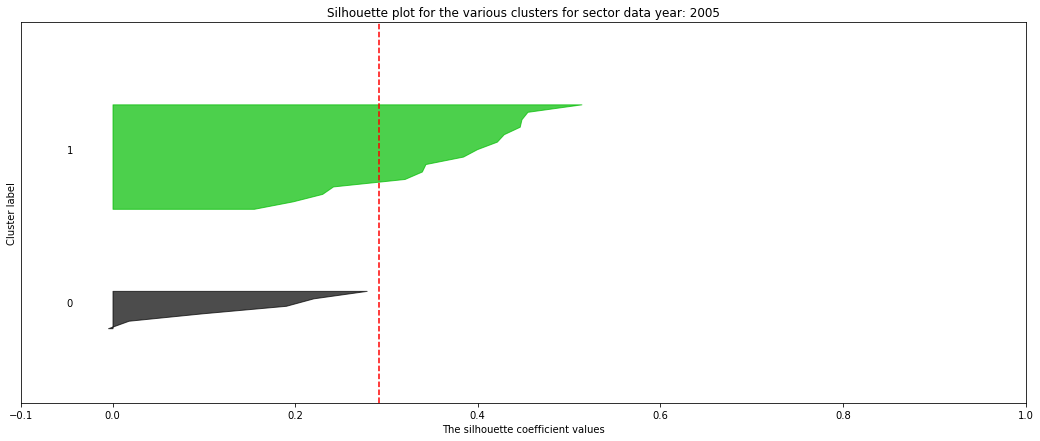

For n_clusters = 3 The average silhouette_score is : 0.190943876845


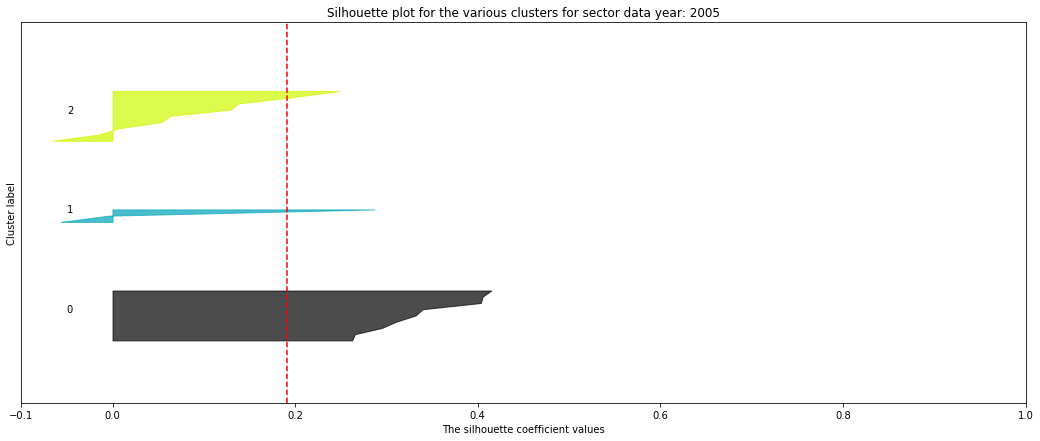

For n_clusters = 4 The average silhouette_score is : 0.26720277804


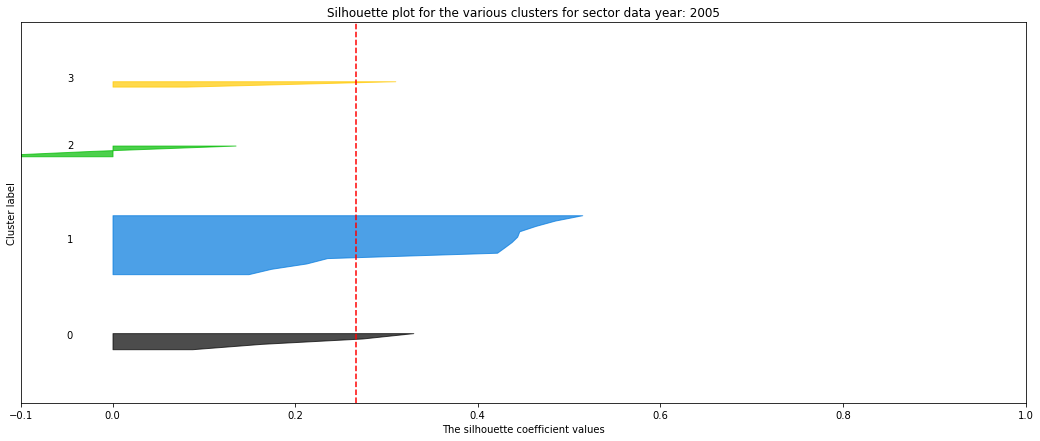

For n_clusters = 5 The average silhouette_score is : 0.207142837569


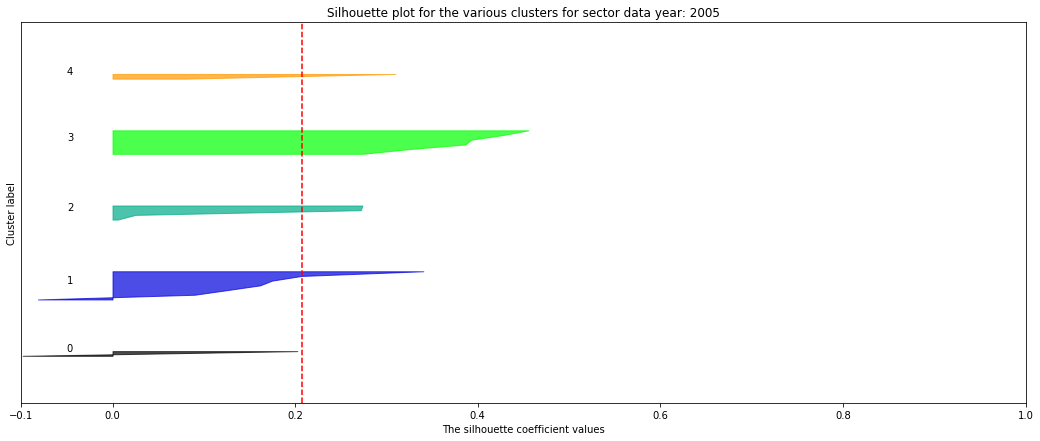

For n_clusters = 6 The average silhouette_score is : 0.169051561226


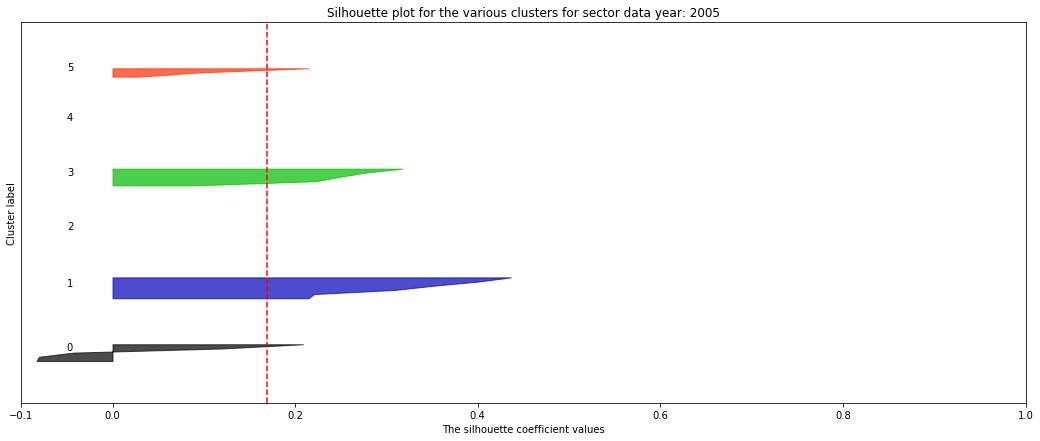

For n_clusters = 7 The average silhouette_score is : 0.189600437799


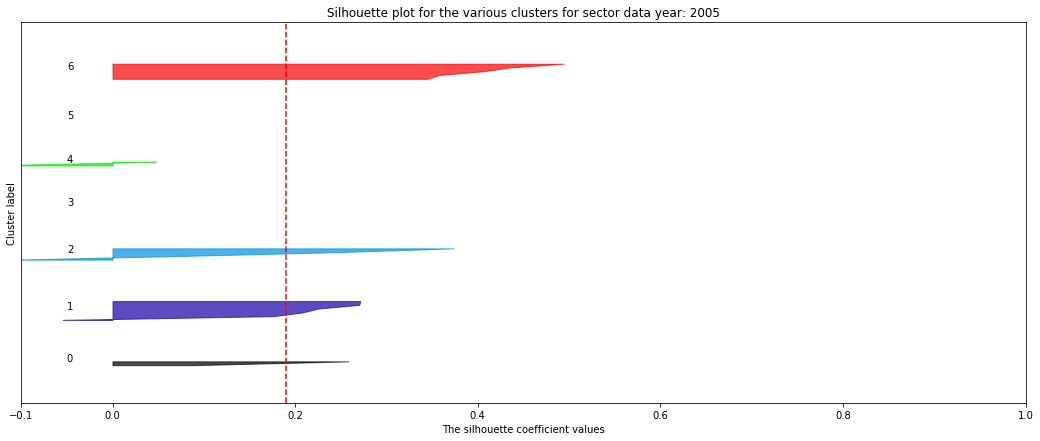

For n_clusters = 2 The average silhouette_score is : 0.348333751843


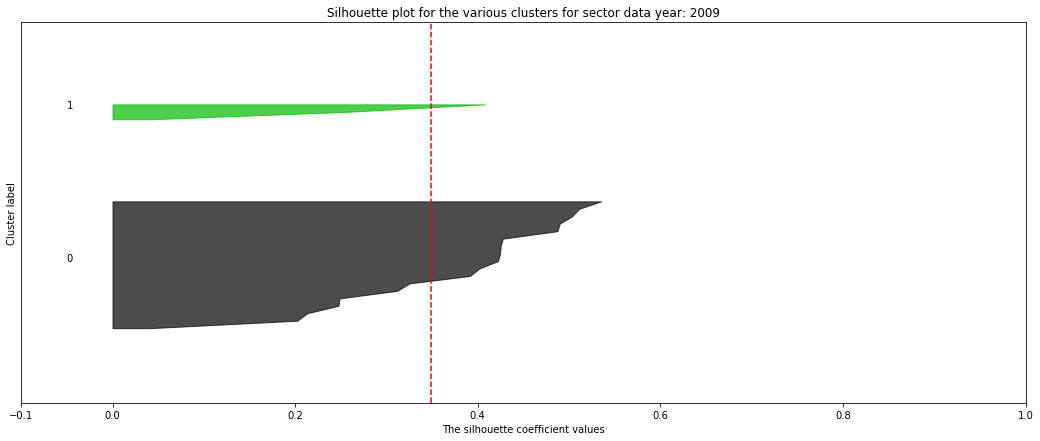

For n_clusters = 3 The average silhouette_score is : 0.191171927833


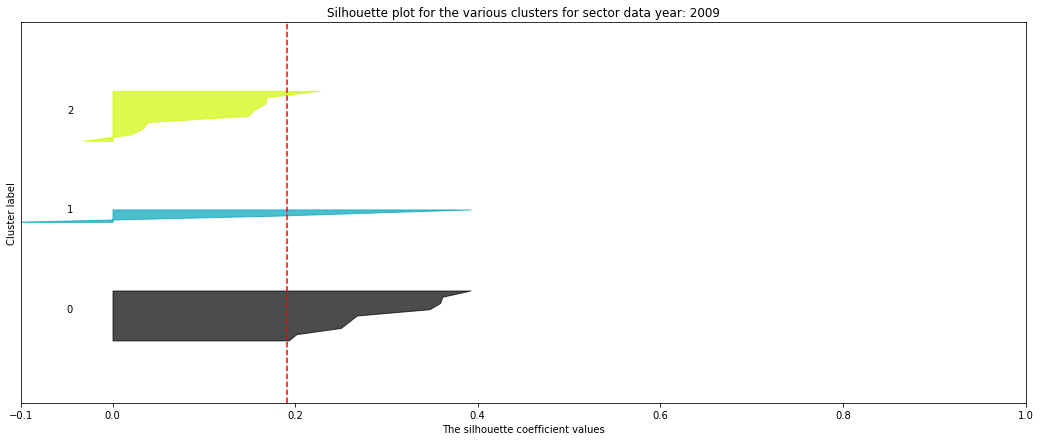

For n_clusters = 4 The average silhouette_score is : 0.203785021618


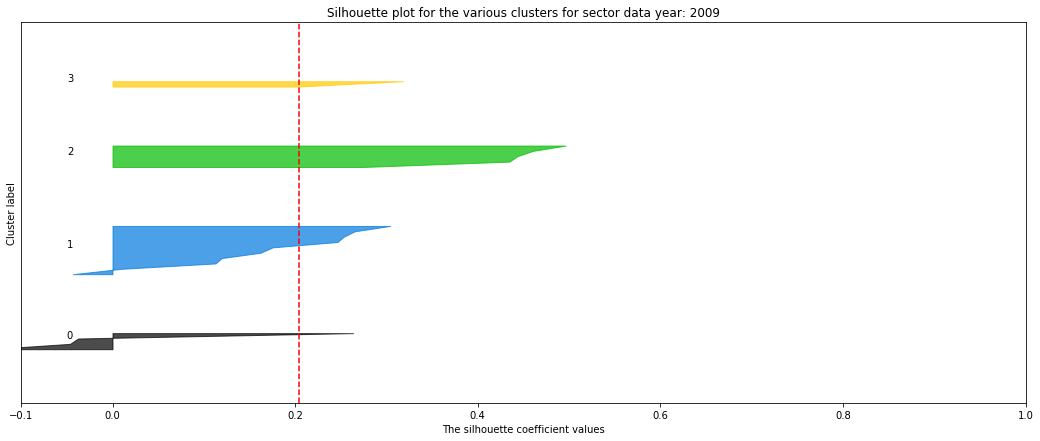

For n_clusters = 5 The average silhouette_score is : 0.197022212847


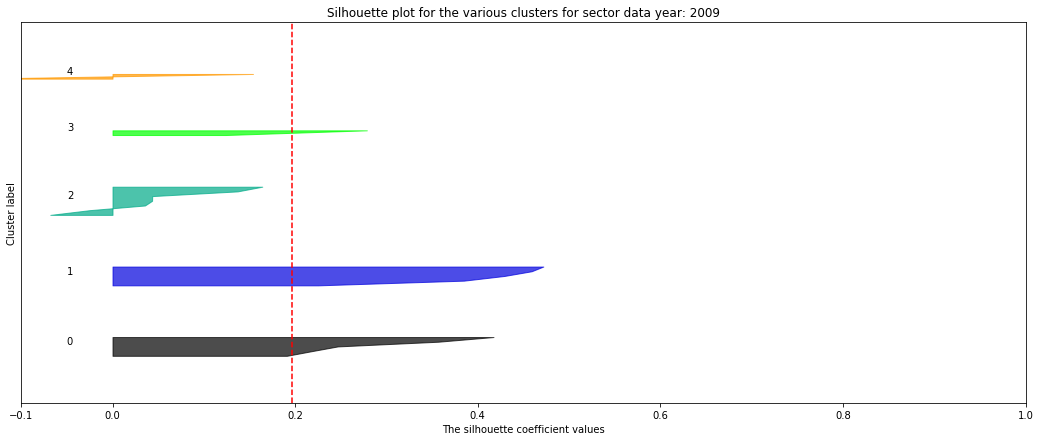

For n_clusters = 6 The average silhouette_score is : 0.174362184103


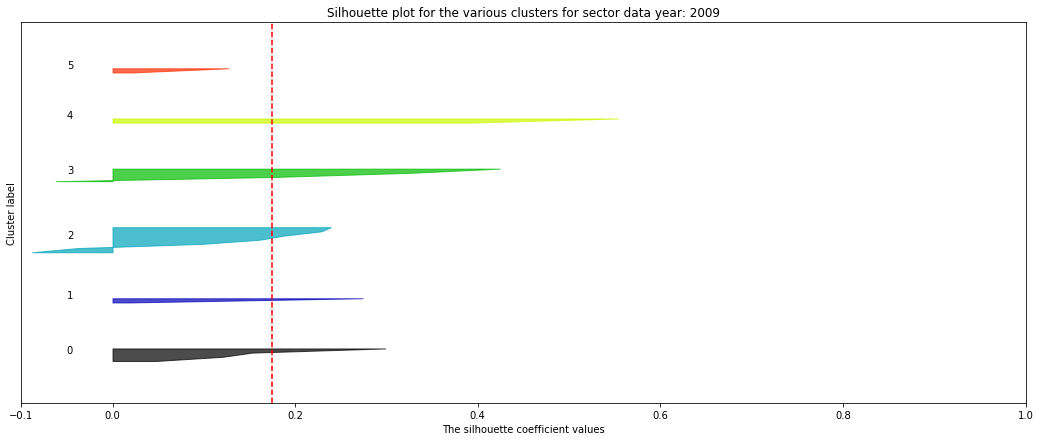

For n_clusters = 7 The average silhouette_score is : 0.200092464971


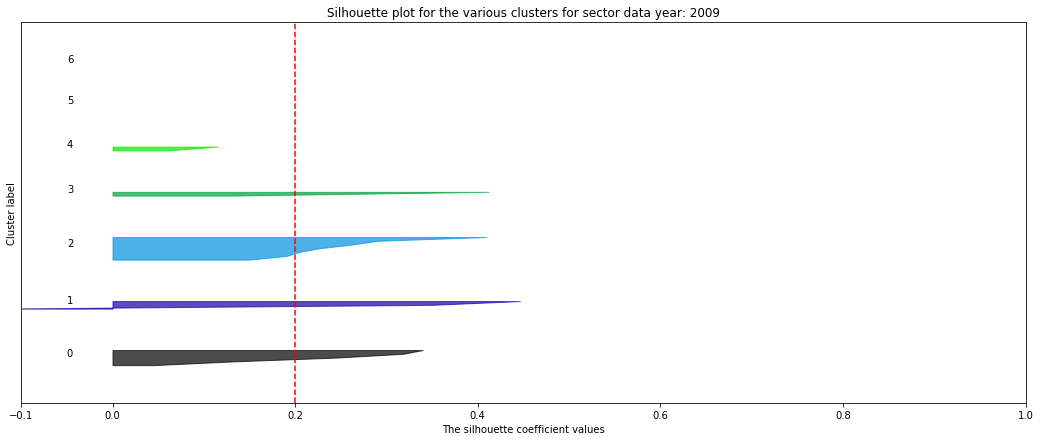

For n_clusters = 2 The average silhouette_score is : 0.155338764136


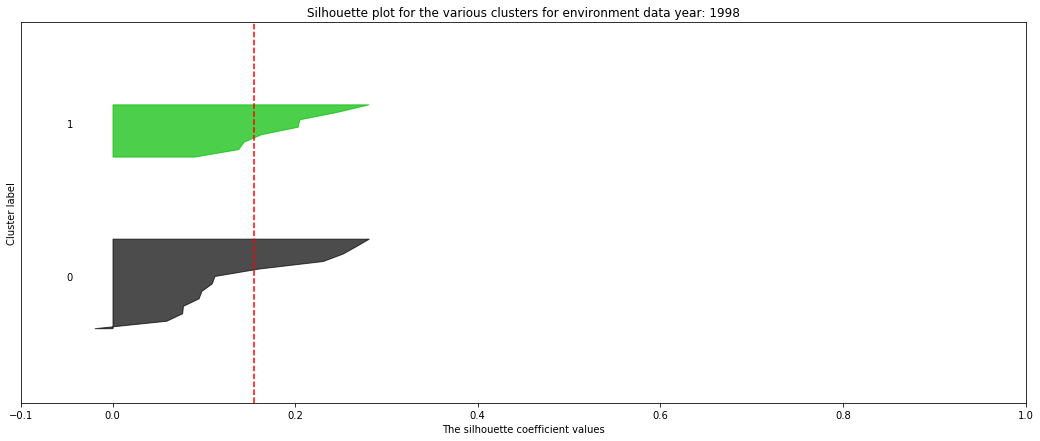

For n_clusters = 3 The average silhouette_score is : 0.168860153439


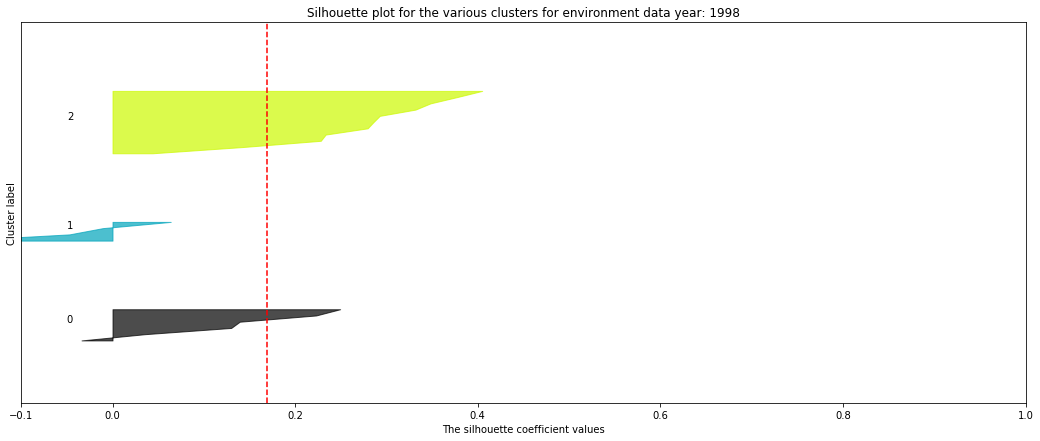

For n_clusters = 4 The average silhouette_score is : 0.175939069101


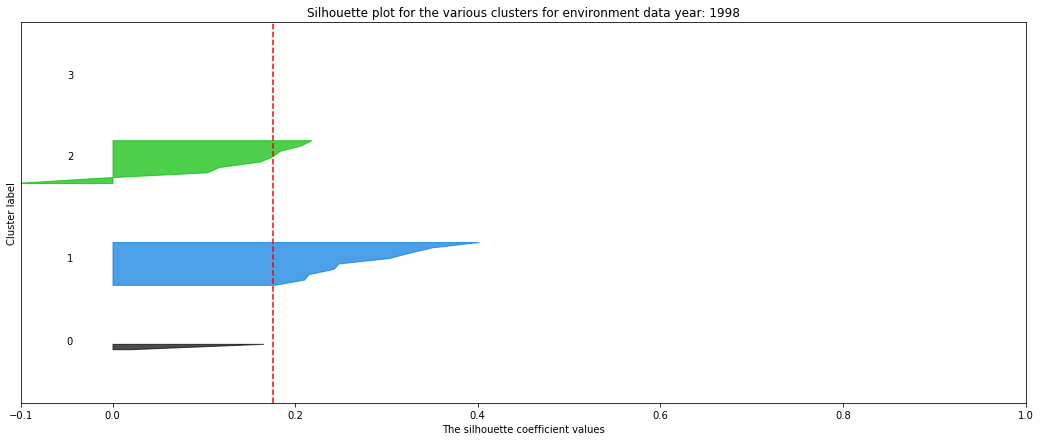

For n_clusters = 5 The average silhouette_score is : 0.158456211607


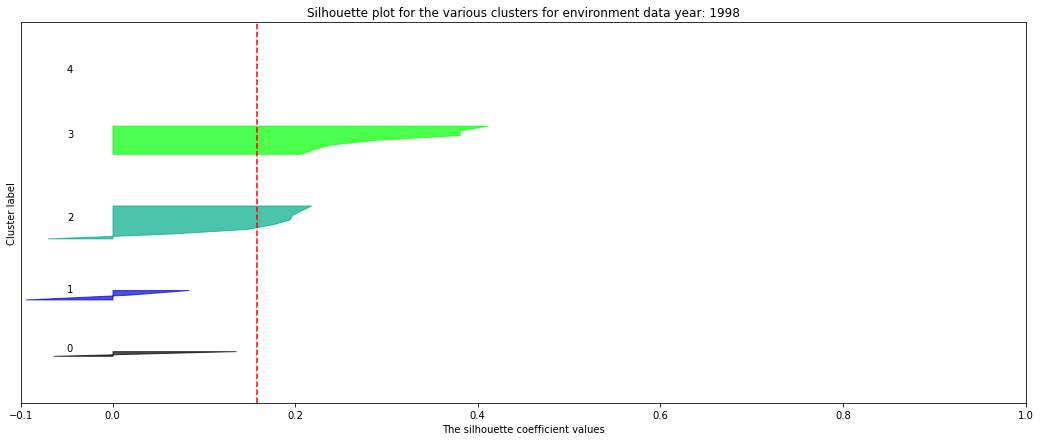

For n_clusters = 6 The average silhouette_score is : 0.0983915363446


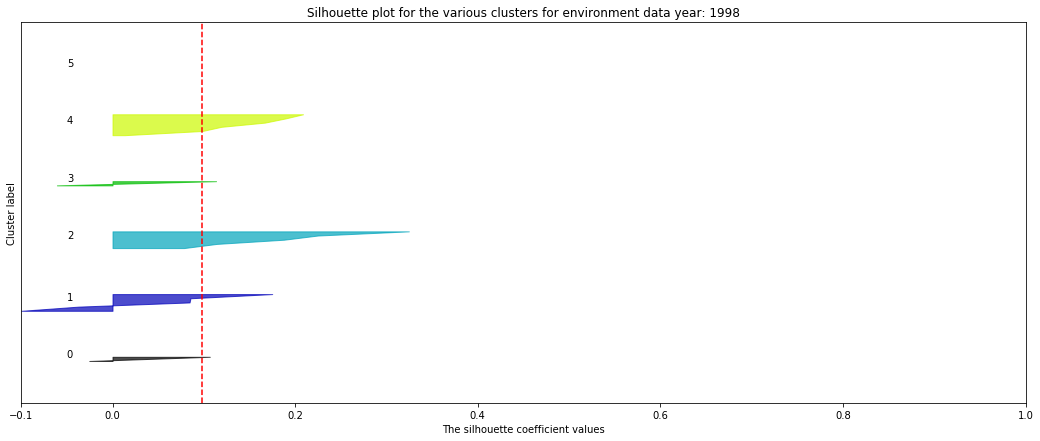

For n_clusters = 7 The average silhouette_score is : 0.156401406262


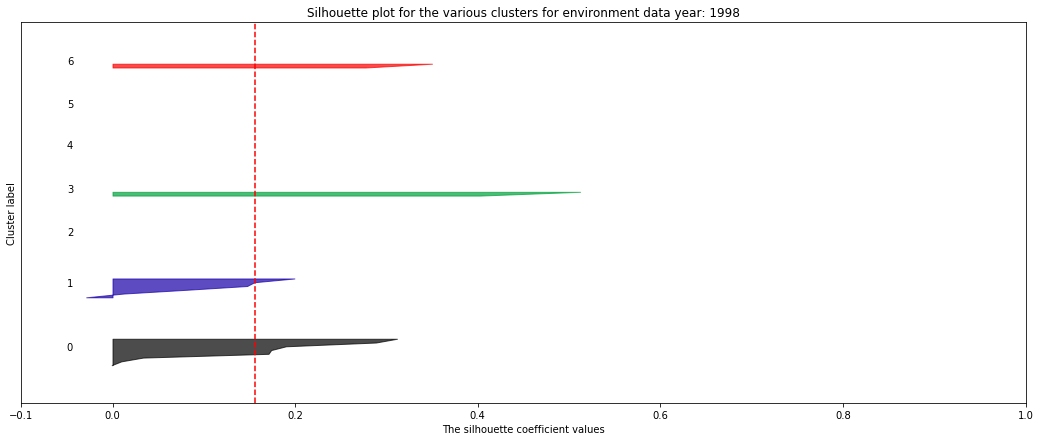

For n_clusters = 2 The average silhouette_score is : 0.141687916131


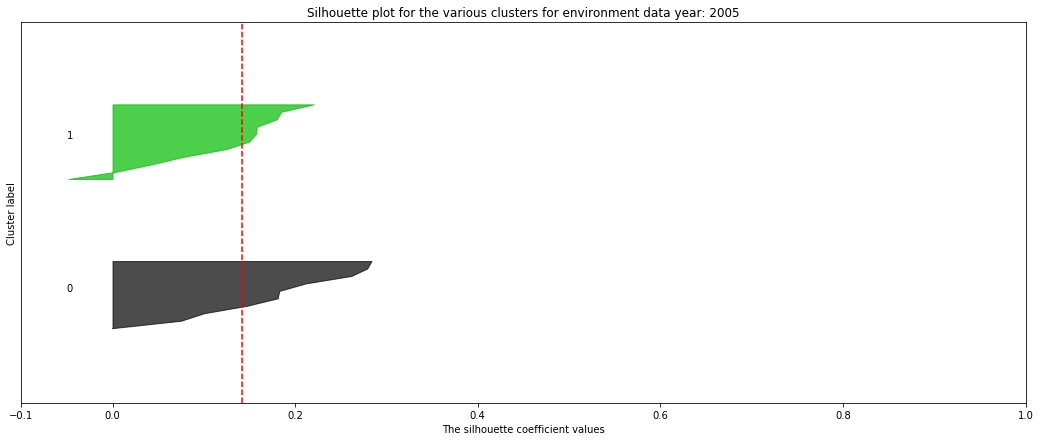

For n_clusters = 3 The average silhouette_score is : 0.157031577637


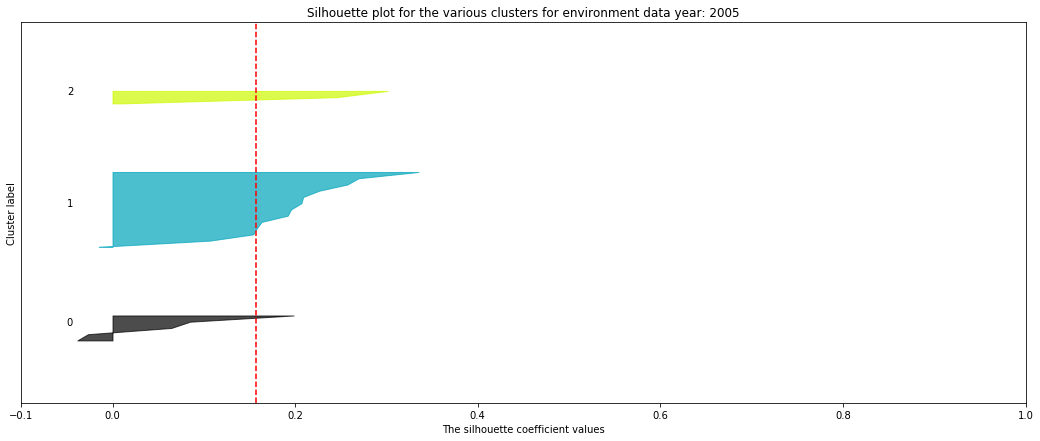

For n_clusters = 4 The average silhouette_score is : 0.185210021015


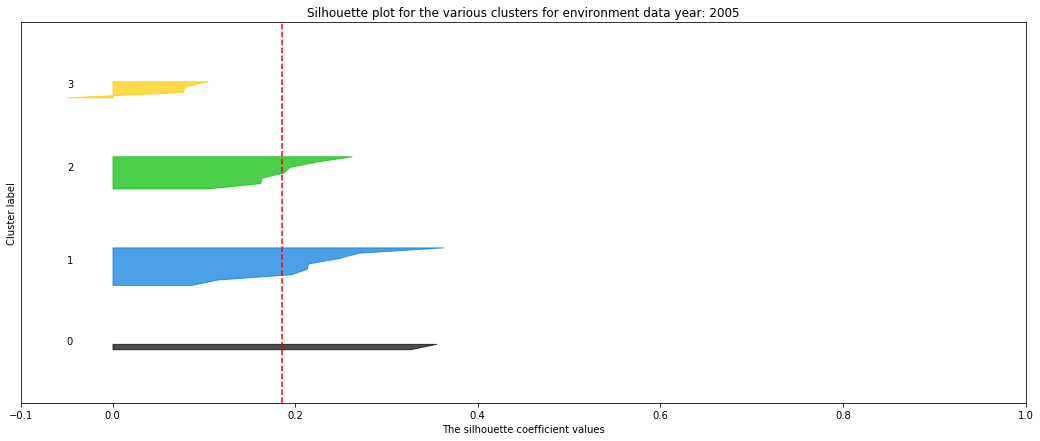

For n_clusters = 5 The average silhouette_score is : 0.172550955303


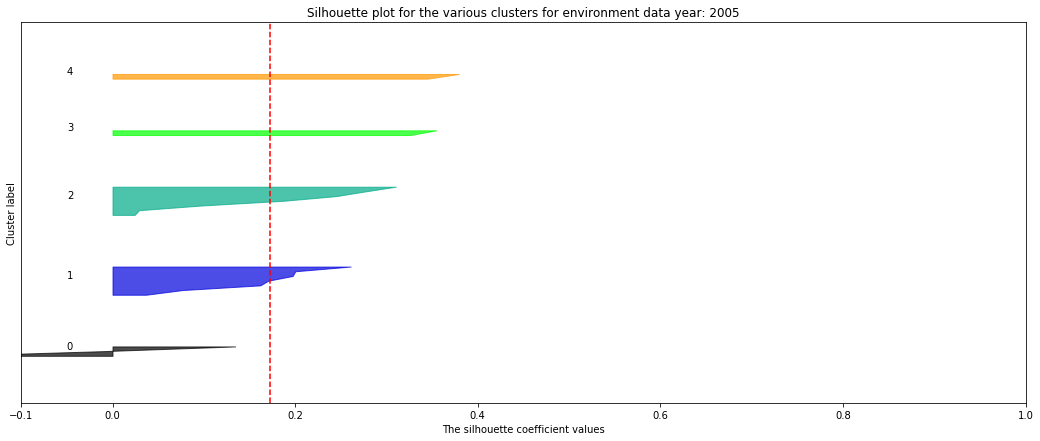

For n_clusters = 6 The average silhouette_score is : 0.125273558345


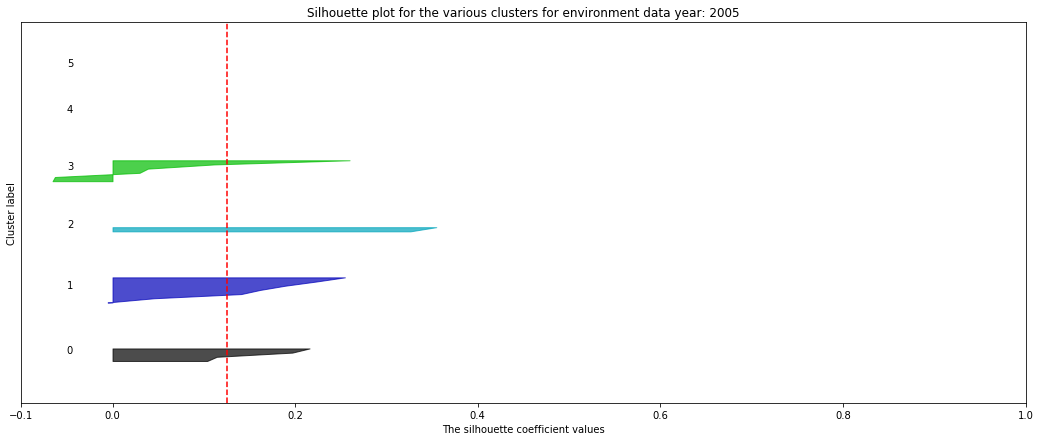

For n_clusters = 7 The average silhouette_score is : 0.139909708963


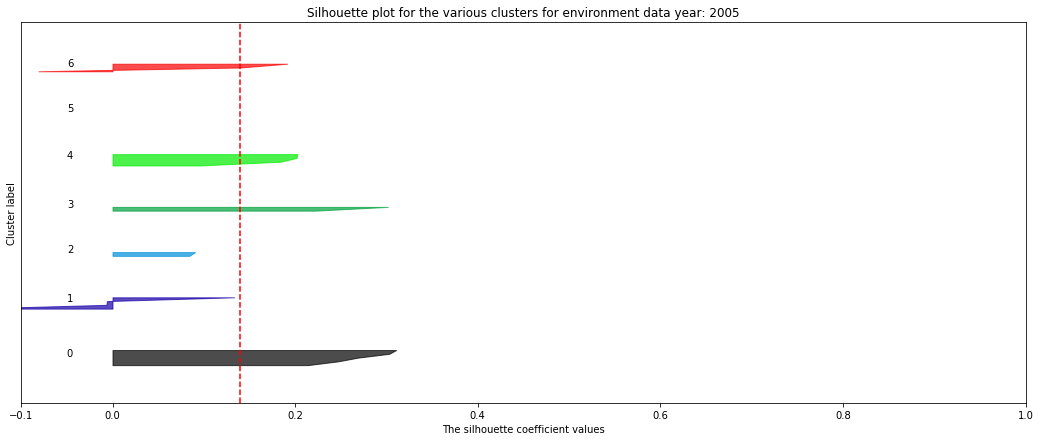

For n_clusters = 2 The average silhouette_score is : 0.145347701788


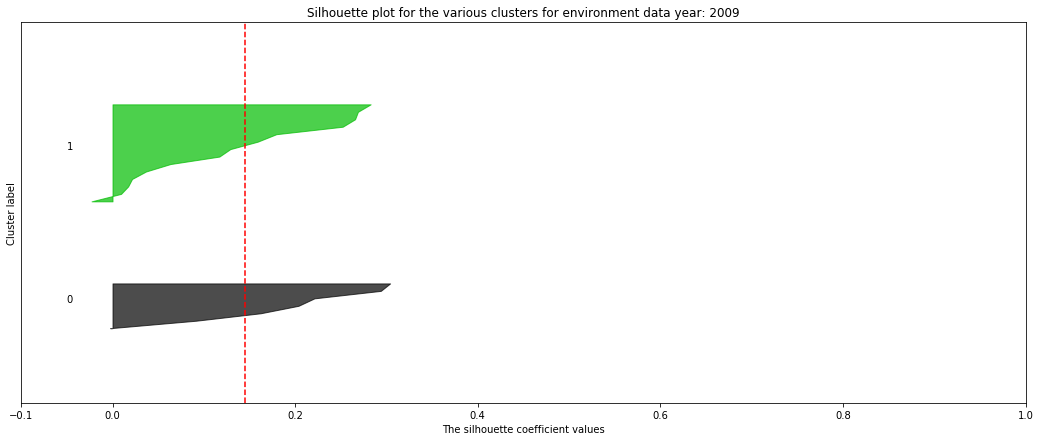

For n_clusters = 3 The average silhouette_score is : 0.169394412575


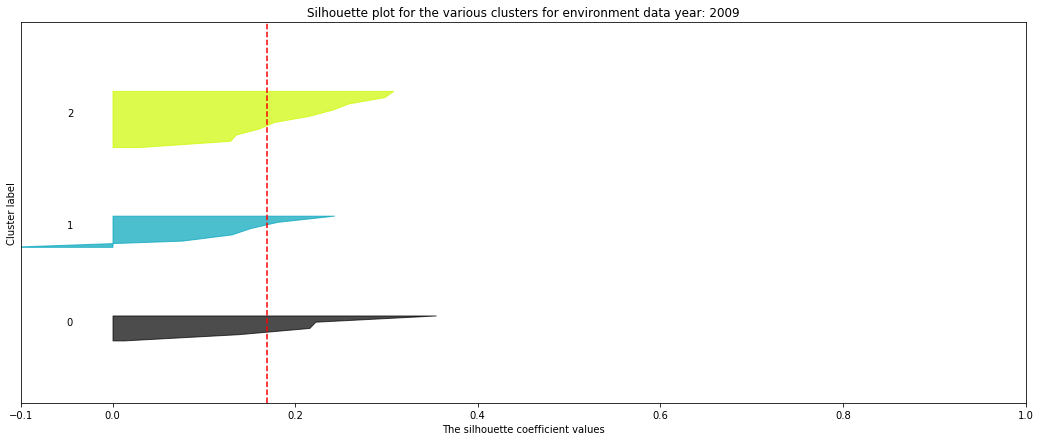

For n_clusters = 4 The average silhouette_score is : 0.154676414236


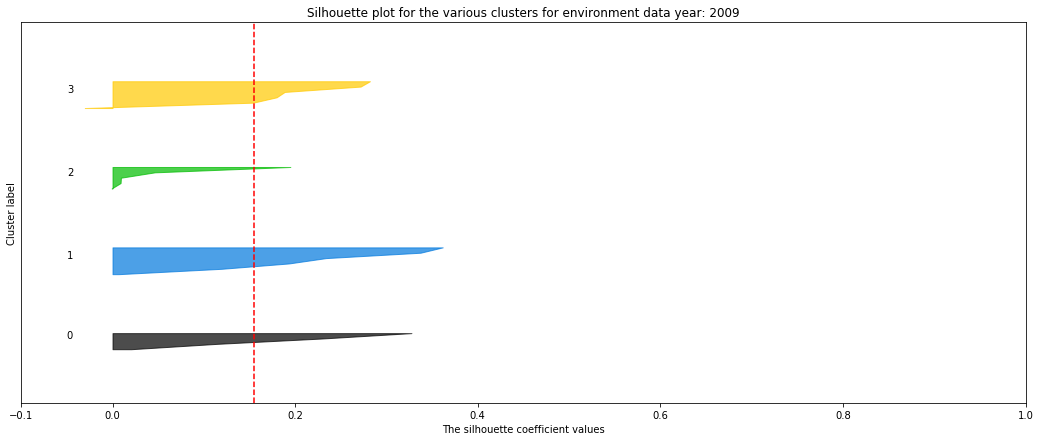

For n_clusters = 5 The average silhouette_score is : 0.155495576219


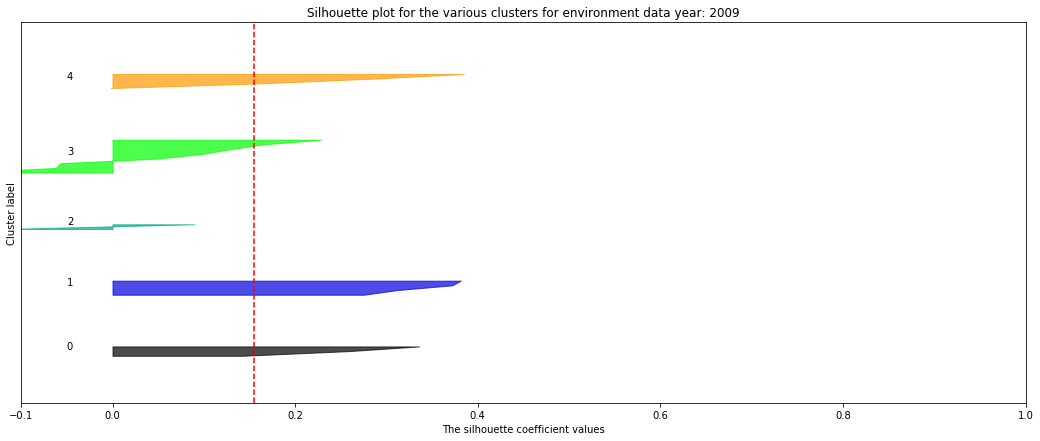

For n_clusters = 6 The average silhouette_score is : 0.17045538639


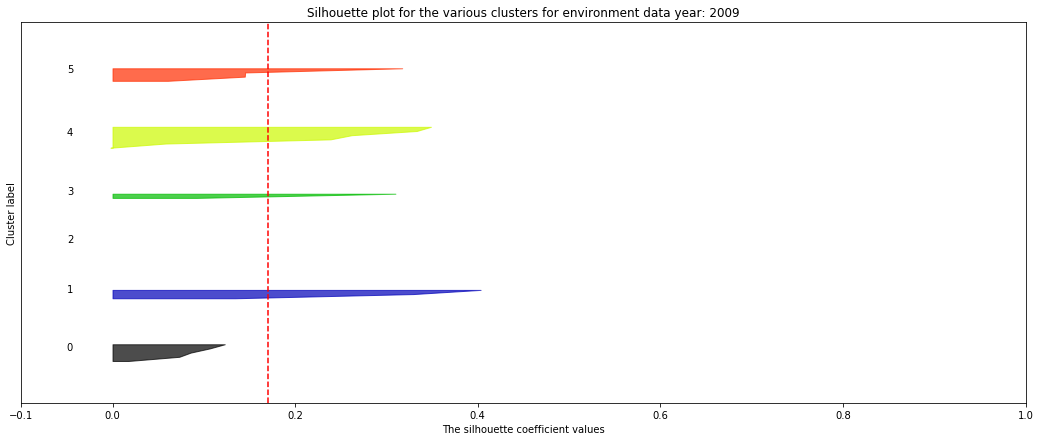

For n_clusters = 7 The average silhouette_score is : 0.171456969306


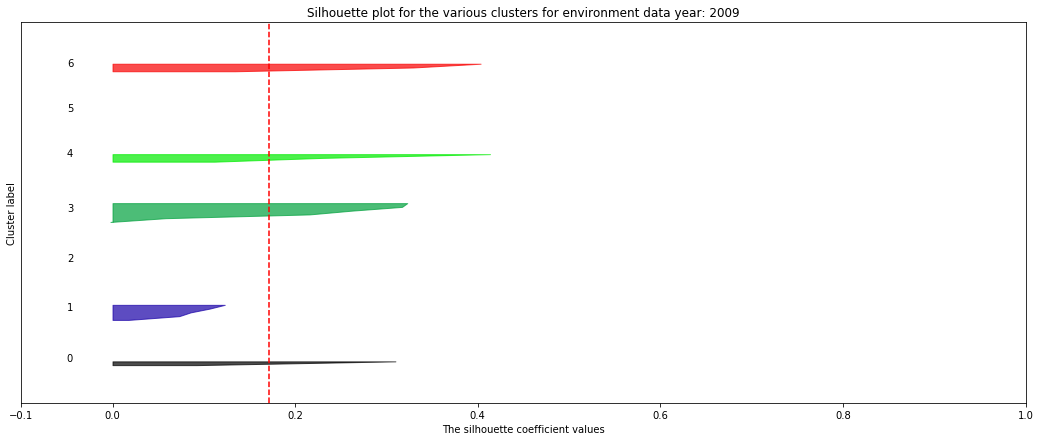

For n_clusters = 2 The average silhouette_score is : 0.524564005176


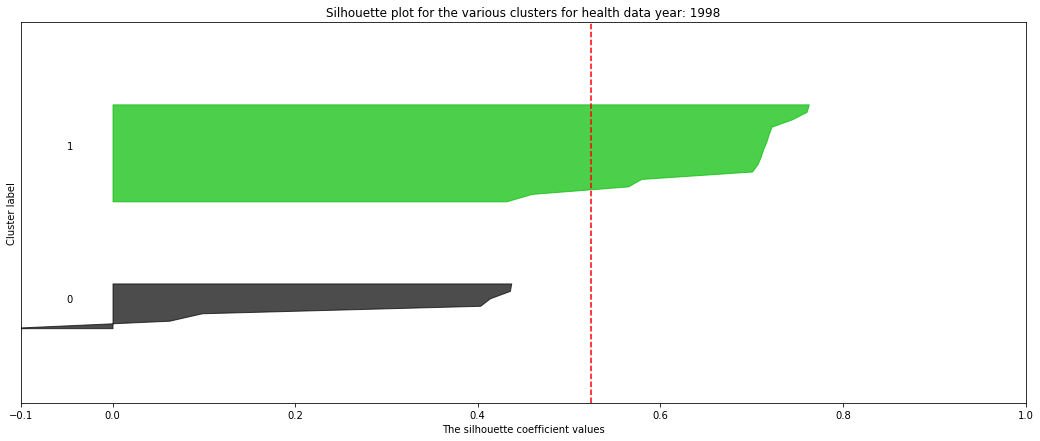

For n_clusters = 3 The average silhouette_score is : 0.541623539504


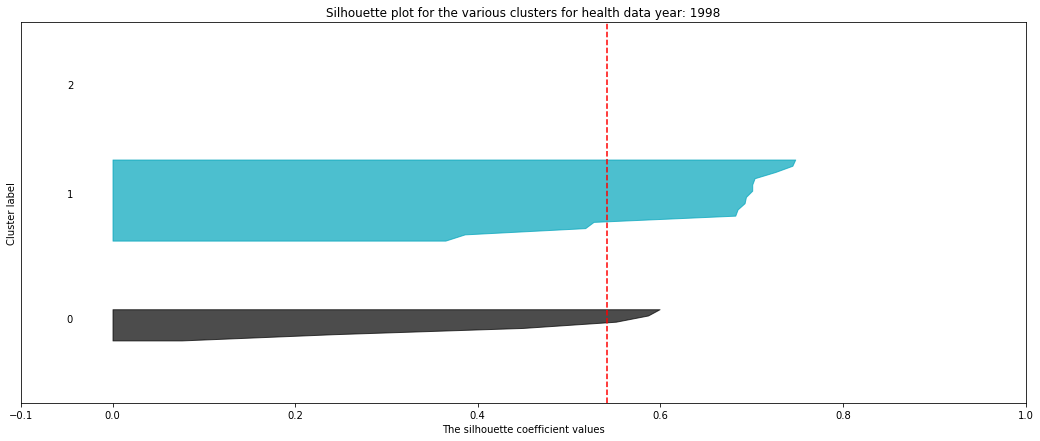

For n_clusters = 4 The average silhouette_score is : 0.45254737082


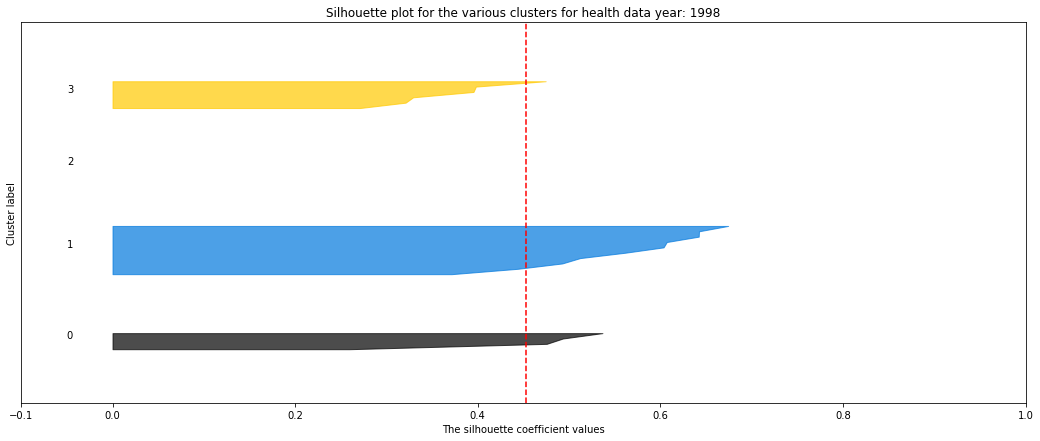

For n_clusters = 5 The average silhouette_score is : 0.426602787939


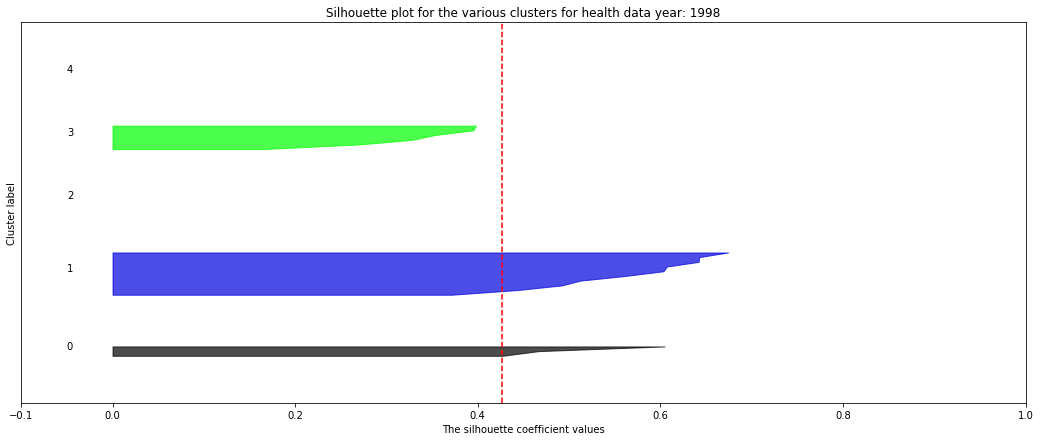

For n_clusters = 6 The average silhouette_score is : 0.379281971783


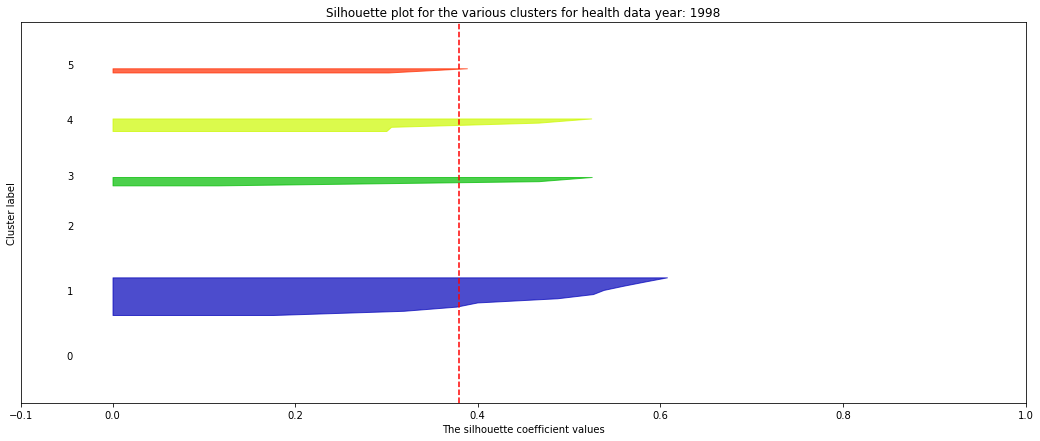

For n_clusters = 7 The average silhouette_score is : 0.360475720296


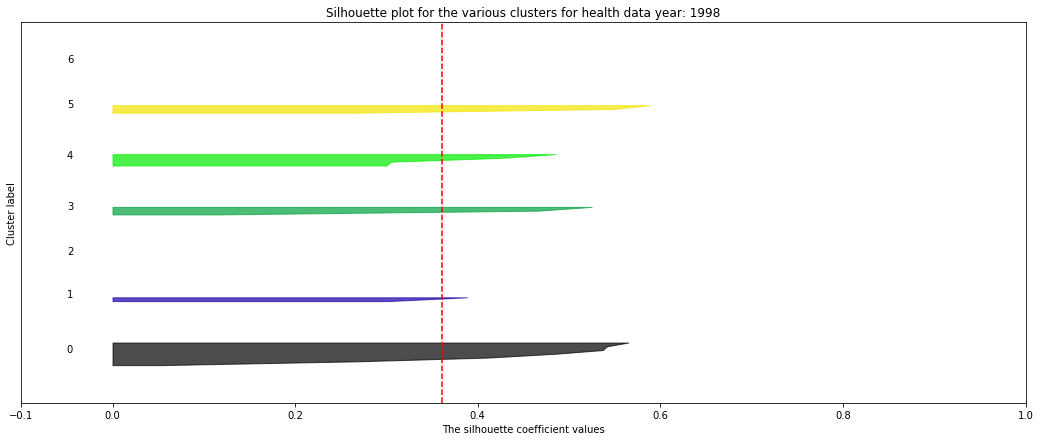

For n_clusters = 2 The average silhouette_score is : 0.520170039784


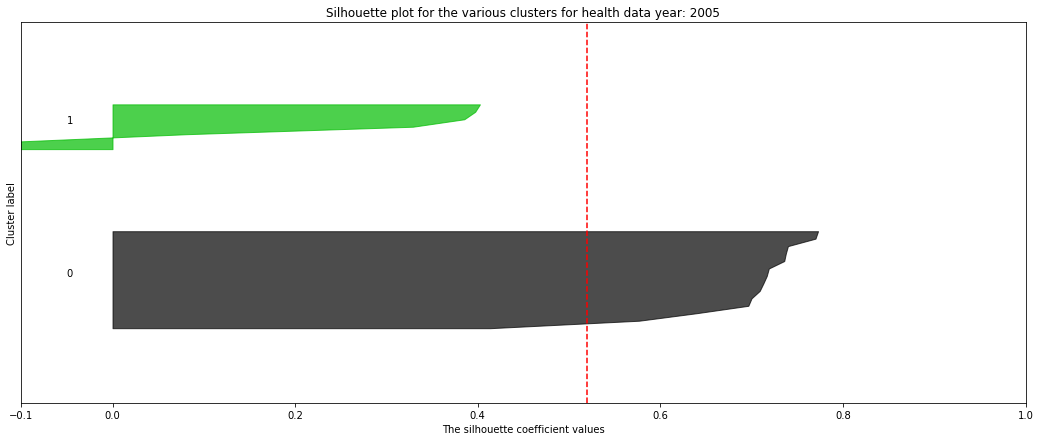

For n_clusters = 3 The average silhouette_score is : 0.535247328104


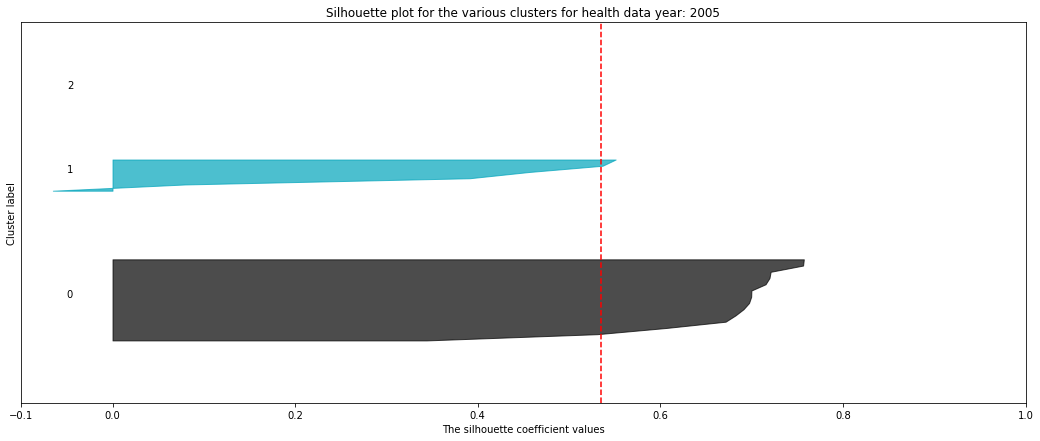

For n_clusters = 4 The average silhouette_score is : 0.386449776459


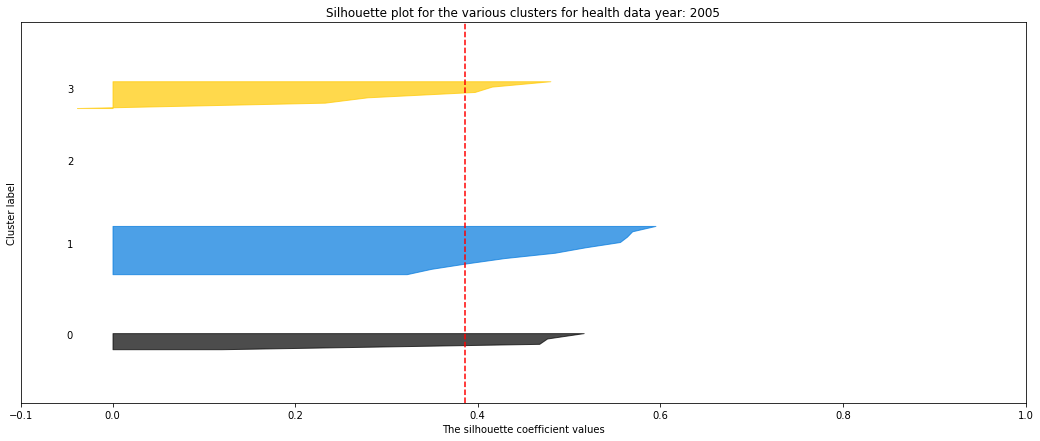

For n_clusters = 5 The average silhouette_score is : 0.359636163229


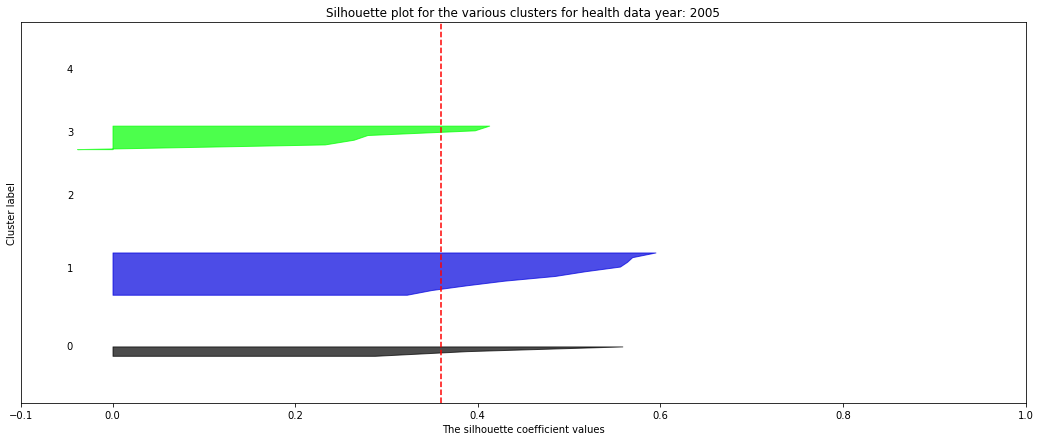

For n_clusters = 6 The average silhouette_score is : 0.317088676221


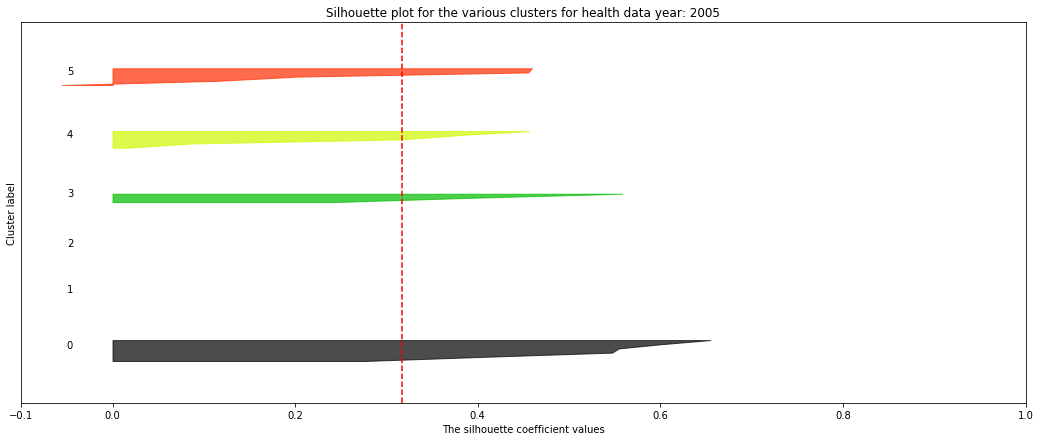

For n_clusters = 7 The average silhouette_score is : 0.369605442363


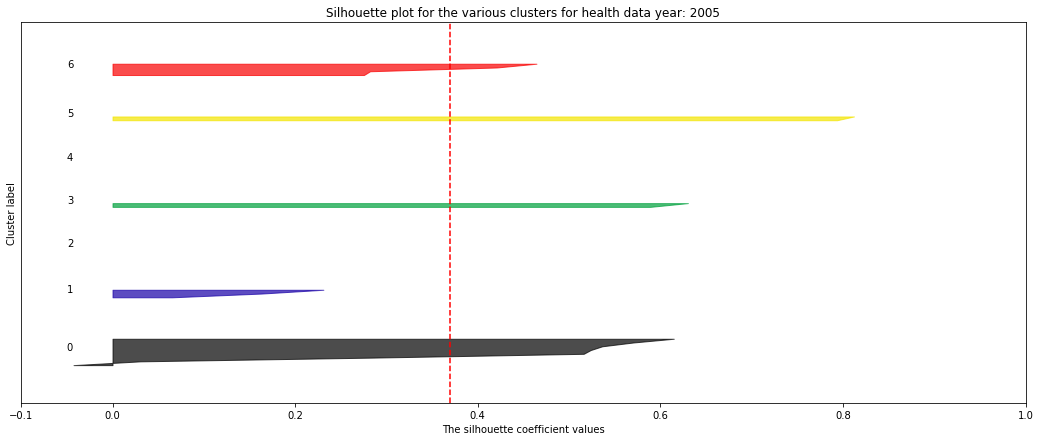

For n_clusters = 2 The average silhouette_score is : 0.565878447227


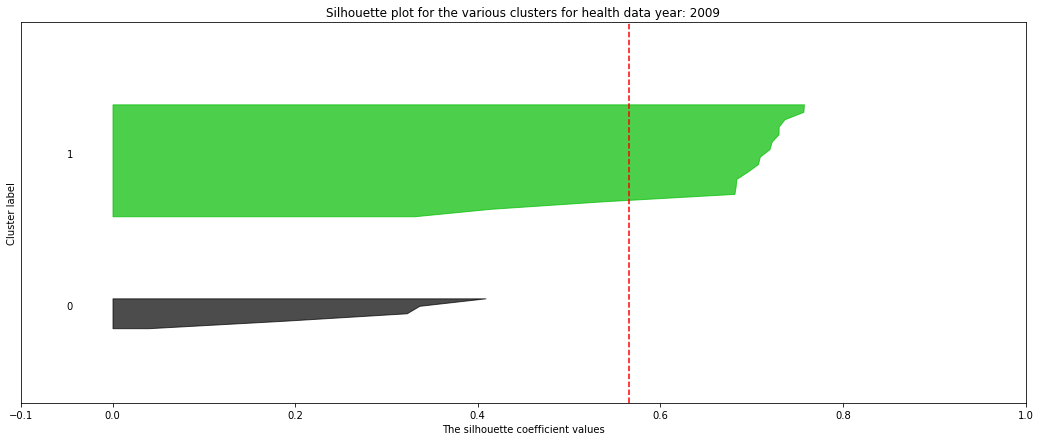

For n_clusters = 3 The average silhouette_score is : 0.579904219095


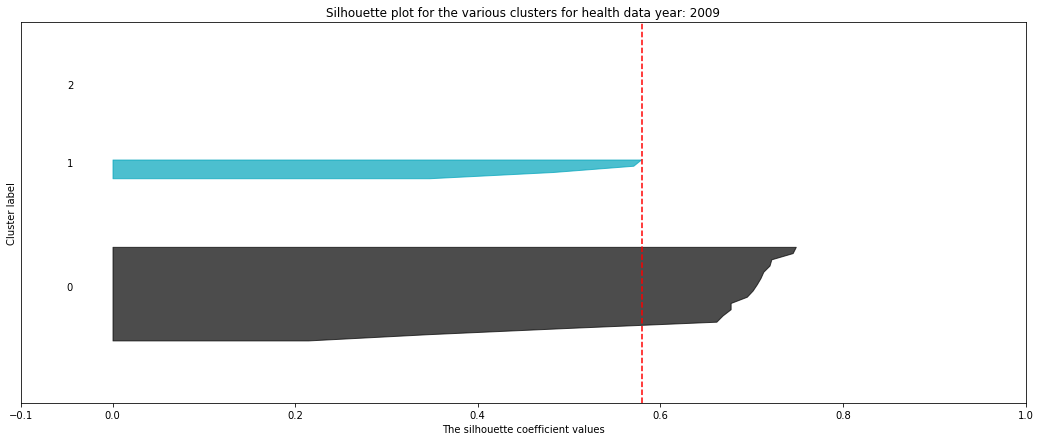

For n_clusters = 4 The average silhouette_score is : 0.375040367164


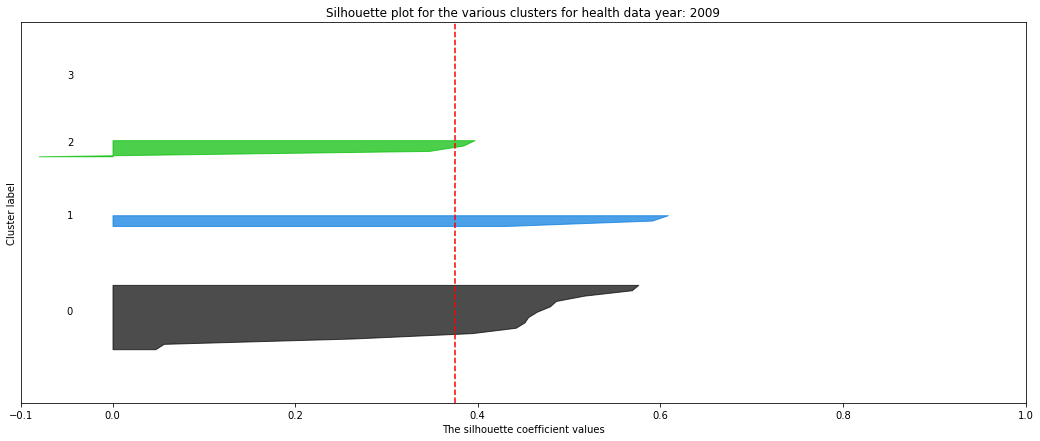

For n_clusters = 5 The average silhouette_score is : 0.341096210263


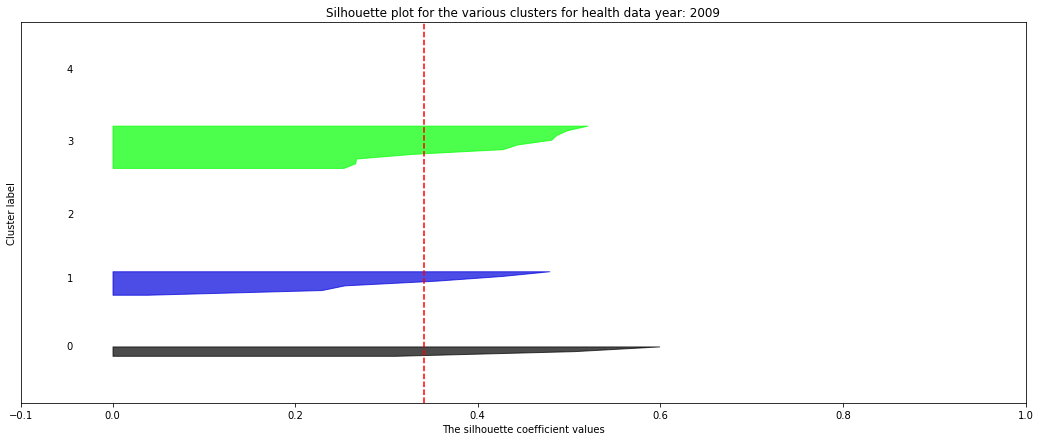

For n_clusters = 6 The average silhouette_score is : 0.351446512512


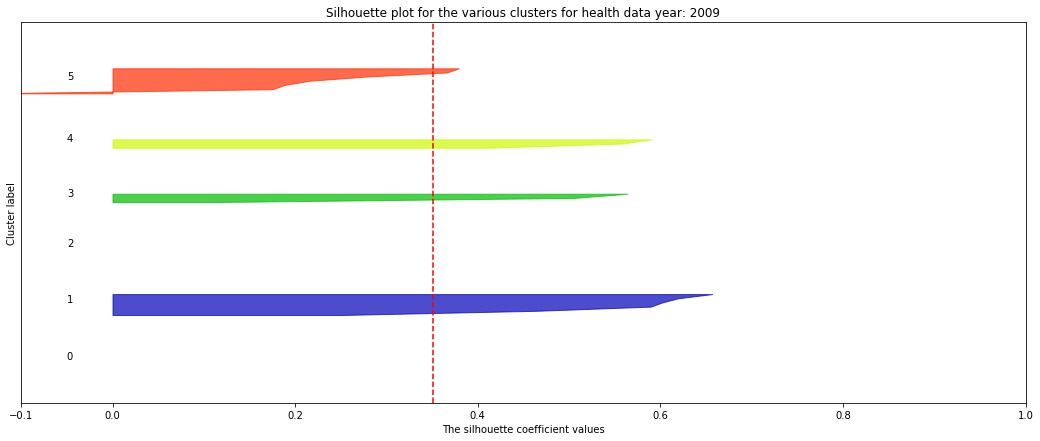

For n_clusters = 7 The average silhouette_score is : 0.354398057686


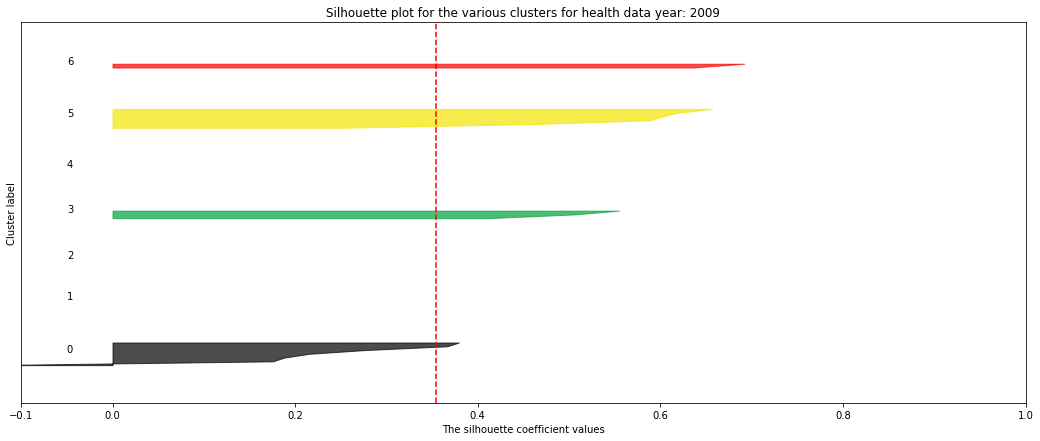

For n_clusters = 2 The average silhouette_score is : 0.374841508802


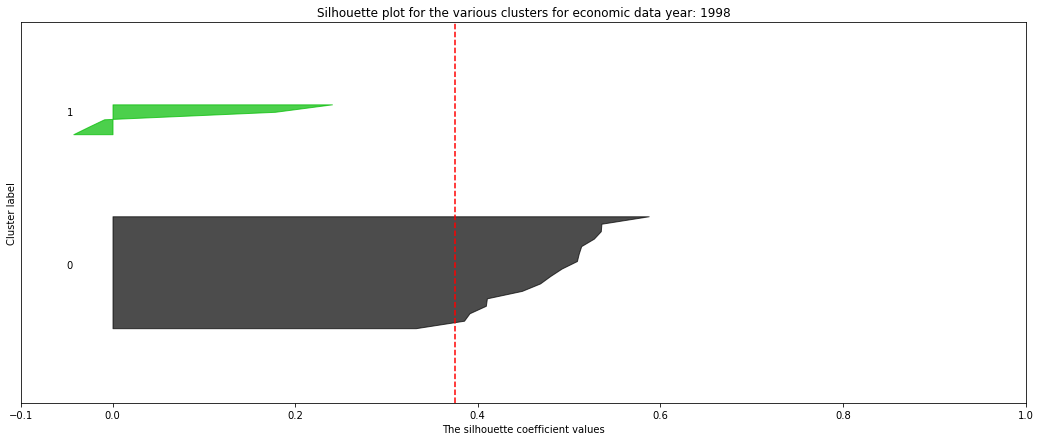

For n_clusters = 3 The average silhouette_score is : 0.381153694347


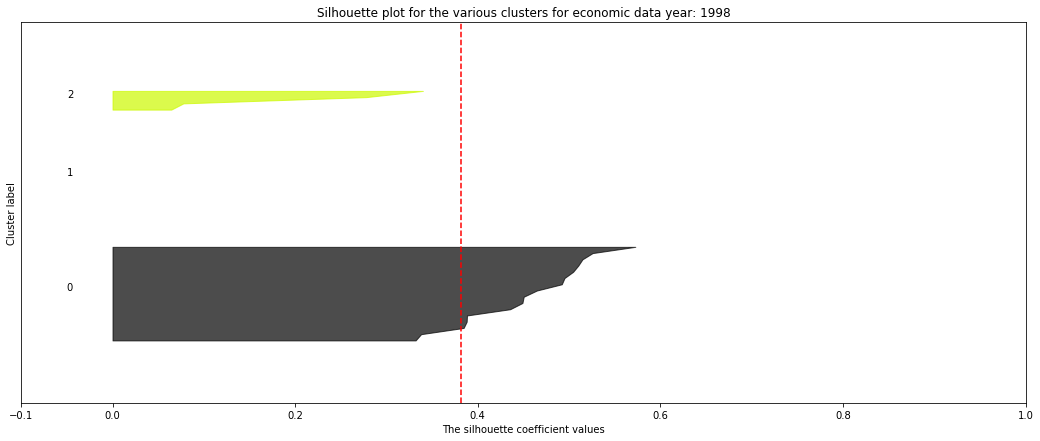

For n_clusters = 4 The average silhouette_score is : 0.323907230985


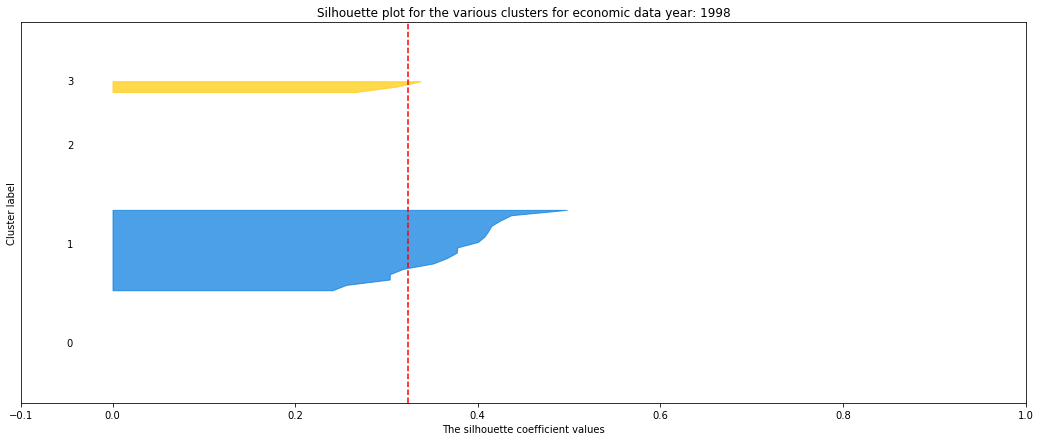

For n_clusters = 5 The average silhouette_score is : 0.183946107163


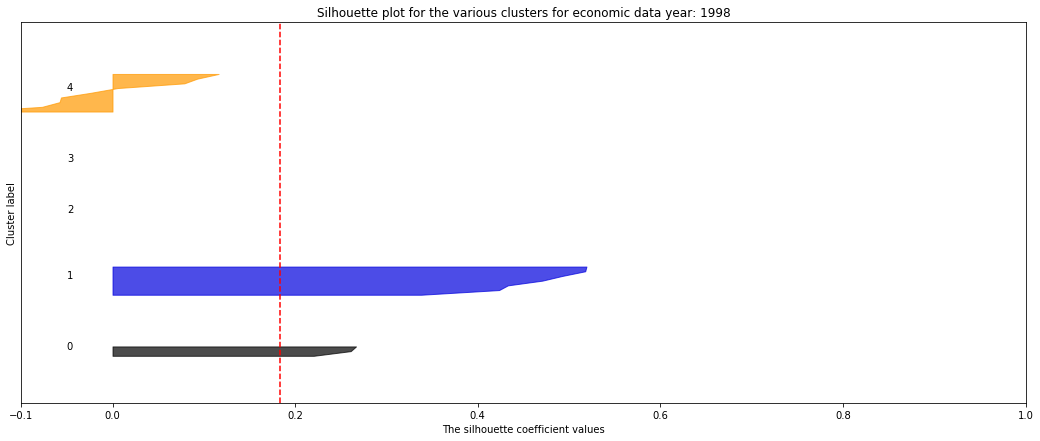

For n_clusters = 6 The average silhouette_score is : 0.212273285996


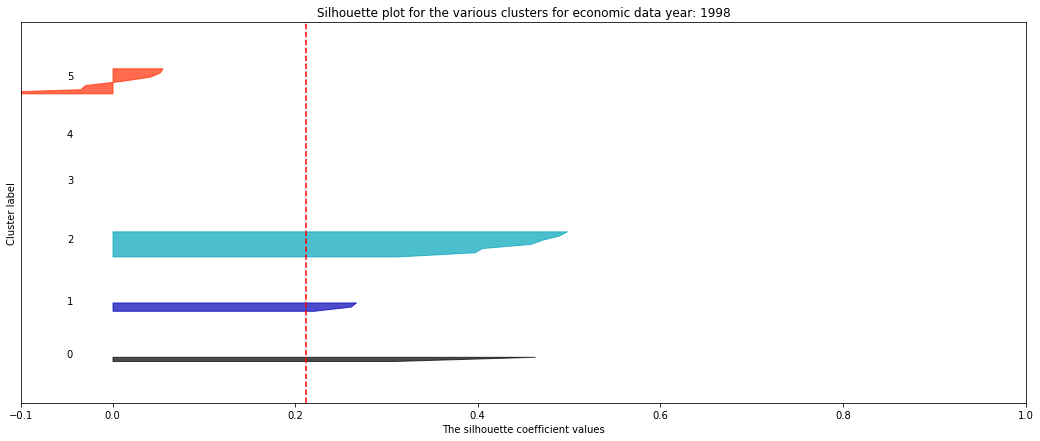

For n_clusters = 7 The average silhouette_score is : 0.201637437688


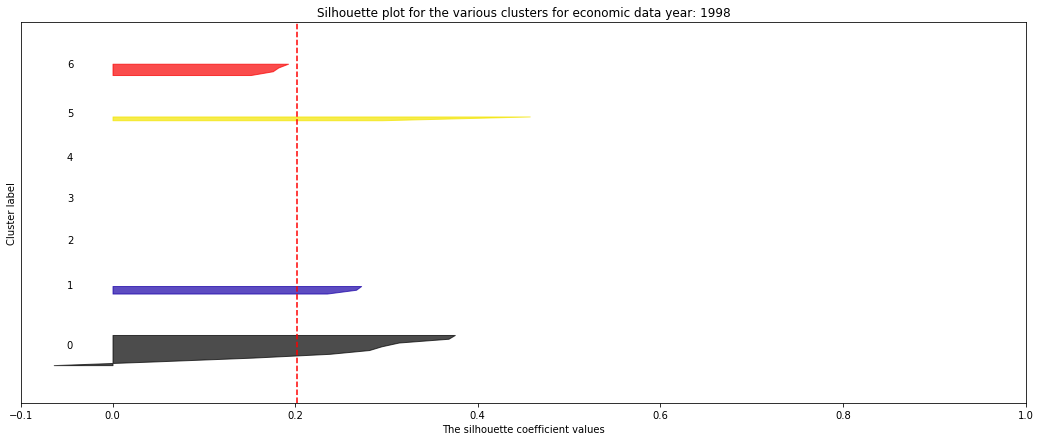

For n_clusters = 2 The average silhouette_score is : 0.446211768712


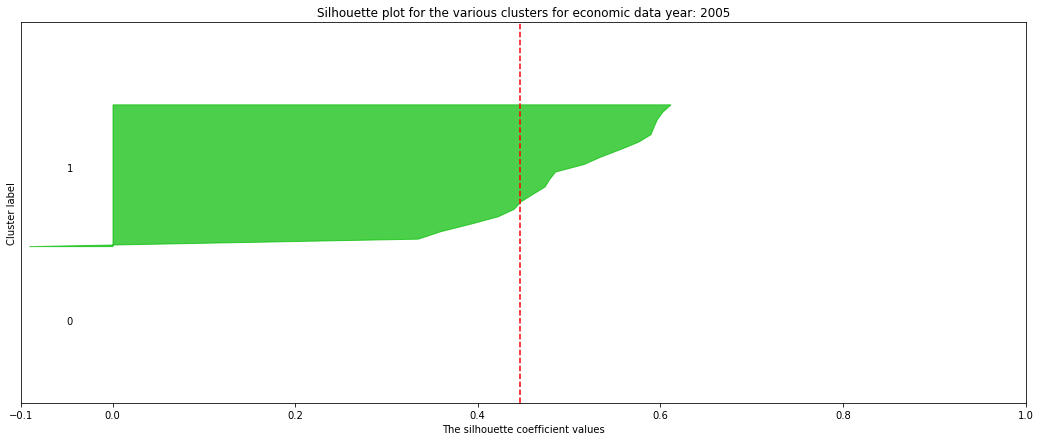

For n_clusters = 3 The average silhouette_score is : 0.238847290354


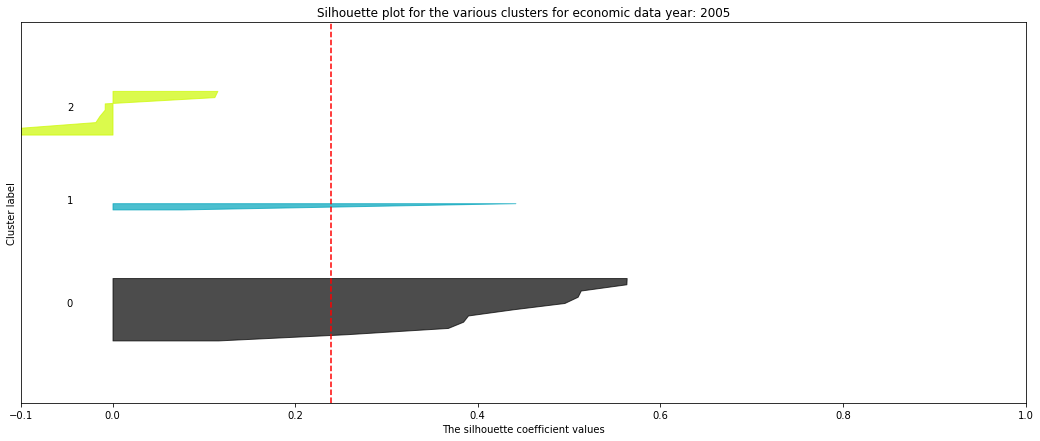

For n_clusters = 4 The average silhouette_score is : 0.226545348476


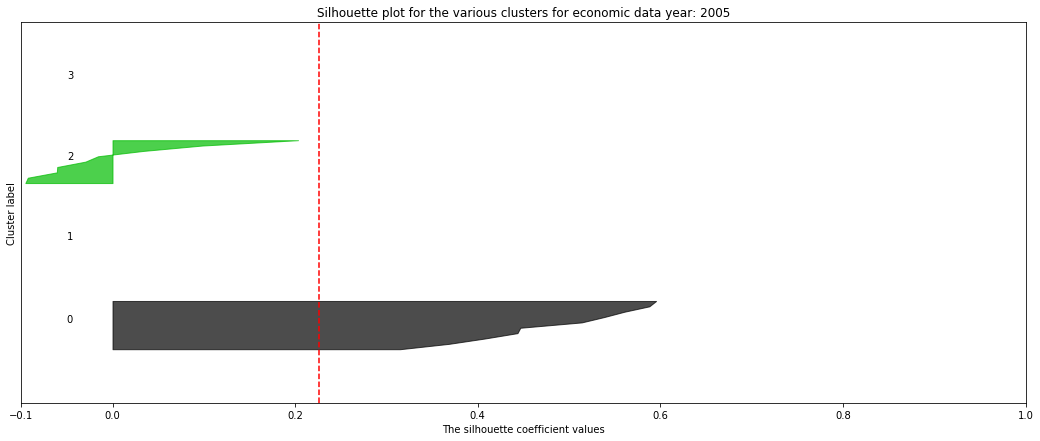

For n_clusters = 5 The average silhouette_score is : 0.245277800167


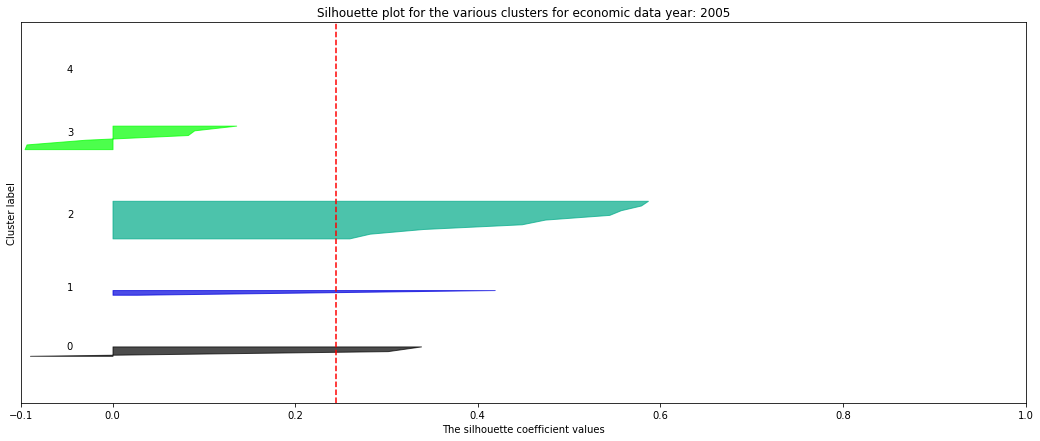

For n_clusters = 6 The average silhouette_score is : 0.235370522611


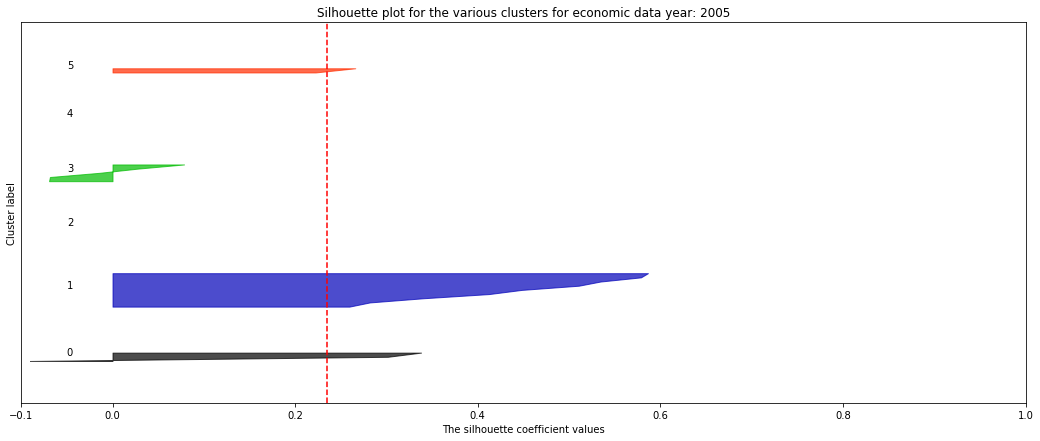

For n_clusters = 7 The average silhouette_score is : 0.250622529113


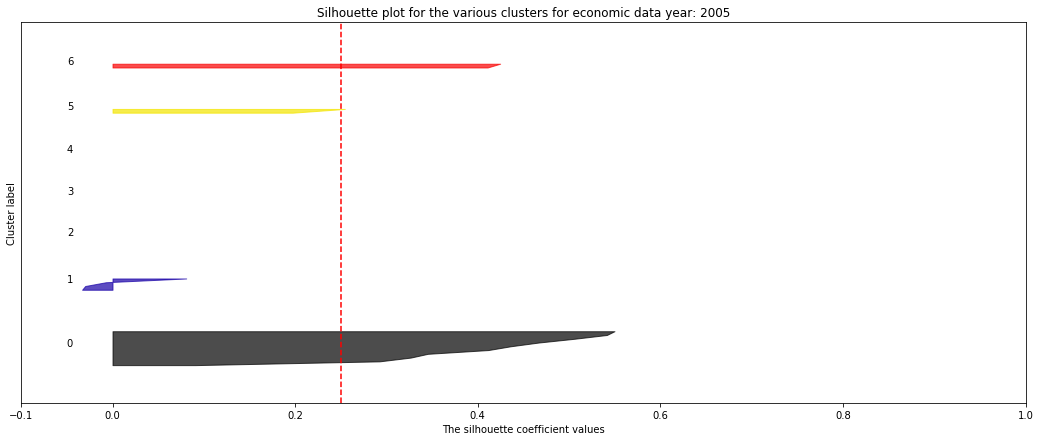

For n_clusters = 2 The average silhouette_score is : 0.188591257183


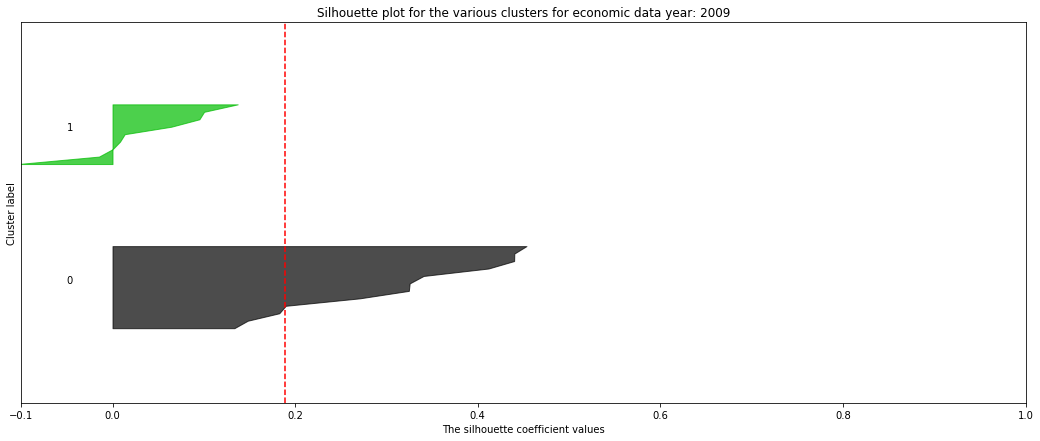

For n_clusters = 3 The average silhouette_score is : 0.204358964741


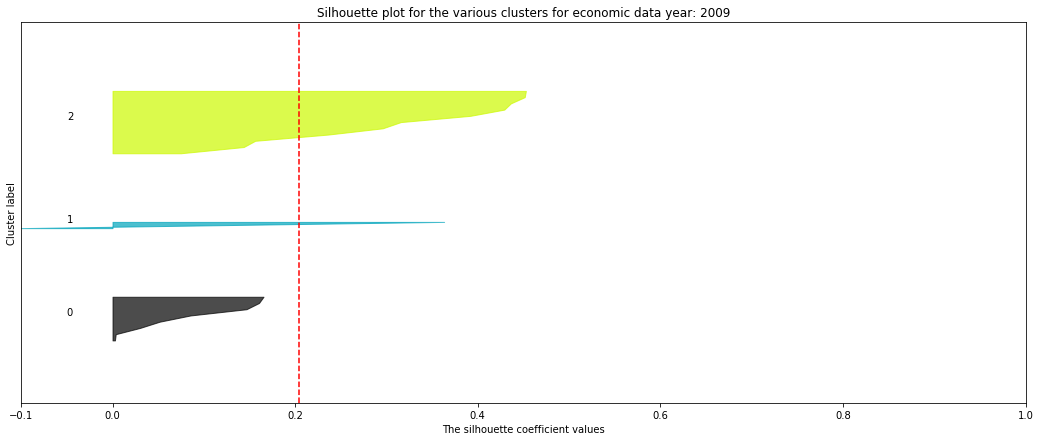

For n_clusters = 4 The average silhouette_score is : 0.186917240773


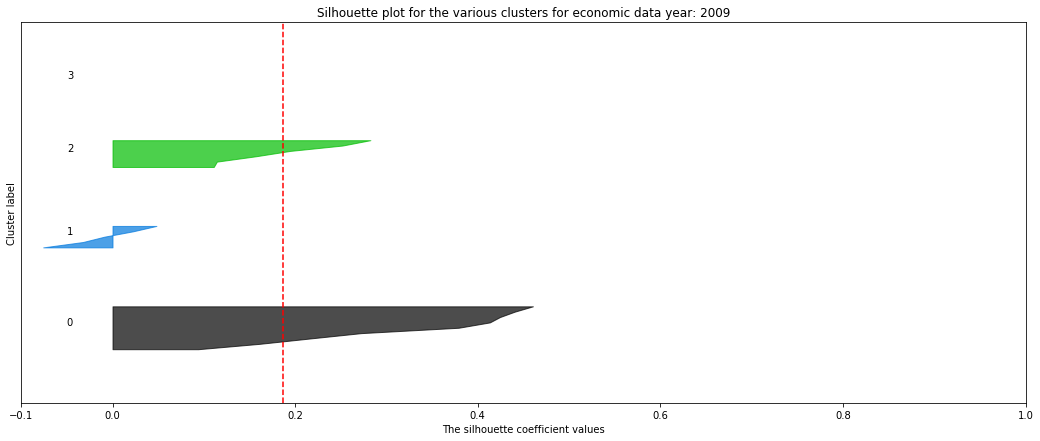

For n_clusters = 5 The average silhouette_score is : 0.164473936296


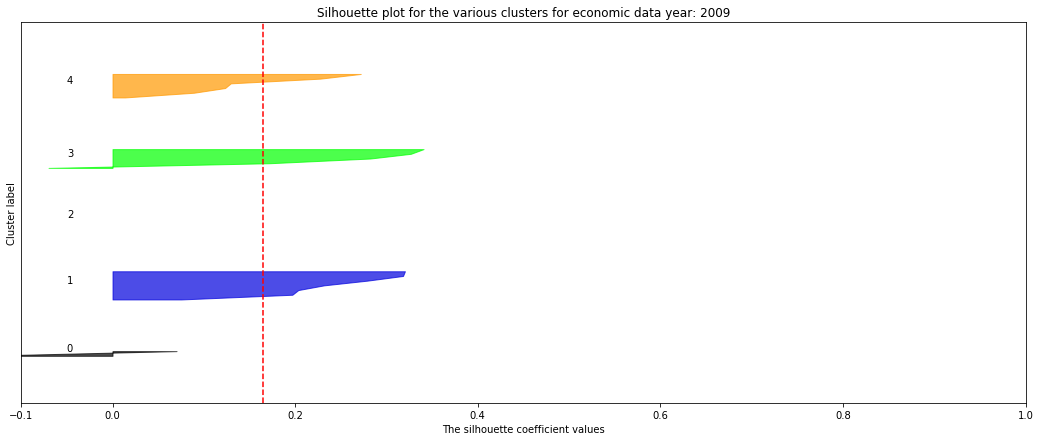

For n_clusters = 6 The average silhouette_score is : 0.198513350189


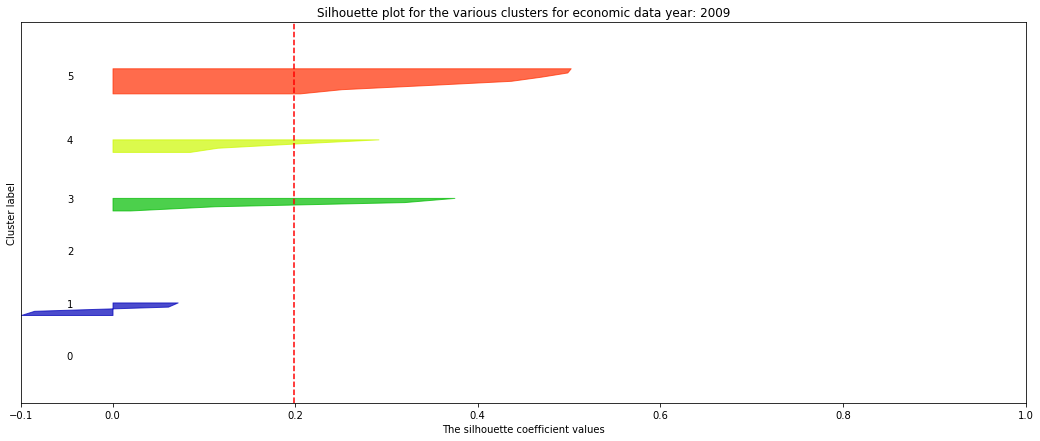

For n_clusters = 7 The average silhouette_score is : 0.211265783333


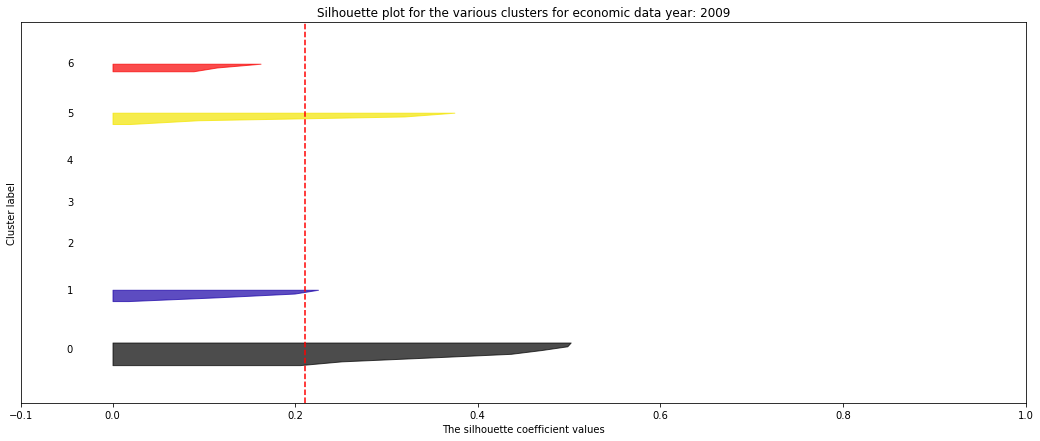

In [20]:
for X in data:
    for yr in year:
#         print("Elbow analysis for " + X[1] + " year: " + str(yr) )
        Silhouette_analysis(X[0][yr],X[1],yr)